In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.models as models
from torchvision.models._utils import IntermediateLayerGetter
import torch.nn as nn

In [2]:
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
model.transformer.encoder.layers[0]

Using cache found in C:\Users\Administrator/.cache\torch\hub\facebookresearch_detr_master


TransformerEncoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): _LinearWithBias(in_features=256, out_features=256, bias=True)
  )
  (linear1): Linear(in_features=256, out_features=2048, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=2048, out_features=256, bias=True)
  (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
)

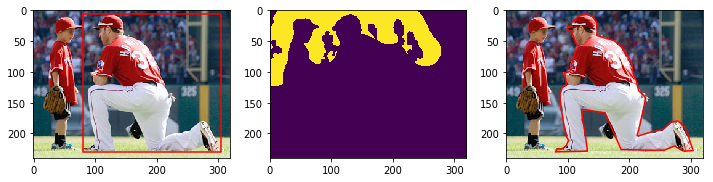

In [17]:
% matplotlib inline
a = [272,2,4,4,4,4,2,9,1,2,16,43,143,24,5,8,16,44,141,25,8,5,17,44,140,26,10,2,17,45,129,4,5,27,24,5,1,45,127,38,23,52,125,40,22,53,123,43,20,54,122,46,18,54,121,54,12,53,119,57,11,53,117,59,13,51,117,59,13,51,117,60,11,52,117,60,10,52,118,60,9,53,118,61,8,52,119,62,7,52,119,64,1,2,2,51,120,120,120,101,139,98,142,96,144,93,147,90,150,87,153,85,155,82,158,76,164,66,174,61,179,57,183,54,186,52,188,49,191,47,193,21,8,16,195,20,13,8,199,18,222,17,223,16,224,16,224,15,225,15,225,15,225,15,225,15,225,15,225,15,225,15,225,15,225,14,226,14,226,14,39,1,186,14,39,3,184,14,39,4,183,13,40,6,181,14,39,7,180,14,39,9,178,14,39,10,177,14,39,11,176,14,38,14,174,14,36,19,171,15,33,32,160,16,30,35,159,18,26,38,158,19,23,41,157,20,19,45,156,21,15,48,156,22,10,53,155,23,9,54,154,23,8,55,154,24,7,56,153,24,6,57,153,25,5,57,153,25,5,58,152,25,4,59,152,26,3,59,152,26,3,59,152,27,1,60,152,27,1,60,152,86,154,80,160,79,161,42,8,29,161,41,11,22,2,3,161,40,13,18,5,3,161,40,15,2,5,8,7,2,161,40,24,6,170,35,30,4,171,34,206,34,41,1,164,34,39,3,164,34,37,5,164,34,35,10,161,36,1,3,28,17,155,41,27,16,156,41,26,17,156,41,26,16,157,27,4,10,25,16,158,27,6,8,11,2,12,6,2,7,159,27,7,14,3,4,19,6,160,26,8,22,18,5,161,26,8,22,18,4,162,26,8,23,15,4,164,23,11,23,11,7,165,19,17,22,9,6,167,19,22,18,8,3,170,18,25,16,7,1,173,17,28,15,180,17,30,12,181,16,34,6,184,15,225,14,226,13,227,12,228,11,229,10,230,9,231,9,231,9,231,9,231,8,232,8,232,8,232,8,232,8,232,8,232,7,233,7,233,7,233,7,233,8,232,8,232,8,232,9,231,9,231,9,231,10,230,10,230,11,229,13,227,14,226,16,224,17,223,19,221,23,217,31,3,5,201,39,201,39,201,39,201,39,201,39,201,40,200,40,200,41,199,41,199,41,199,22,8,12,198,22,12,8,198,22,14,6,198,22,15,6,197,22,16,5,197,22,17,5,196,22,18,4,196,22,19,4,195,22,19,5,194,22,20,4,194,25,21,1,193,27,213,29,211,30,210,35,6,6,193,49,191,50,190,50,190,51,189,51,189,52,188,53,187,53,187,54,186,54,186,54,186,55,185,55,185,55,185,55,185,55,185,55,185,55,185,55,185,55,185,55,185,55,185,55,185,55,185,55,185,55,185,28,1,26,185,23,11,21,185,20,17,17,186,18,21,15,186,16,23,14,187,14,25,14,187,14,26,12,188,14,28,10,188,14,226,14,226,16,224,17,223,19,221,20,220,22,218,24,18,3,12,3,180,25,10,1,4,6,10,6,178,28,7,12,8,8,177,49,3,12,176,65,175,67,173,69,171,53,3,14,170,37,20,9,4,1,169,36,21,8,175,35,22,7,176,34,23,7,176,34,23,6,177,35,22,6,177,35,22,8,175,35,23,9,173,35,205,36,204,39,201,43,197,48,36,1,155,48,35,3,154,49,33,5,154,48,32,6,155,49,27,10,155,51,24,11,154,54,21,11,155,56,19,11,155,56,18,11,156,56,17,11,157,56,16,12,157,56,14,13,159,56,12,13,160,61,5,14,162,78,165,75,167,73,168,72,170,70,171,69,173,67,176,64,179,61,182,58,183,57,185,54,187,53,188,51,191,49,192,47,195,45,196,43,198,42,199,40,201,38,203,36,205,34,207,32,210,28,213,26,216,22,221,16,228,8,10250]
b = [ 147.11, 39.25, 148.19, 31.73, 146.58, 18.84, 140.13, 9.72, 131.01, 6.49, 118.66, 8.64, 111.68, 15.62, 106.31, 19.38, 105.77, 24.75, 105.23, 25.29, 99.33, 26.9, 100.4, 32.8, 106.85, 33.88, 107.38, 38.71, 111.14, 46.76, 112.75, 52.67, 115.44, 55.89, 118.12, 58.04, 112.75, 66.63, 110.07, 75.76, 105.77, 89.18, 105.23, 95.62, 103.62, 98.84, 98.26, 100.99, 95.03, 100.99, 96.11, 109.05, 97.18, 112.8, 97.72, 119.78, 98.26, 121.39, 91.28, 125.15, 87.52, 135.89, 88.05, 152.54, 91.28, 170.79, 93.96, 187.97, 97.72, 204.62, 101.48, 211.06, 97.72, 219.65, 90.2, 225.56, 84.3, 224.48, 80.0, 229.85, 132.08, 228.78, 129.4, 207.84, 127.25, 193.88, 124.56, 179.38, 122.95, 164.35, 122.95, 160.59, 160.54, 166.49, 186.85, 226.09, 213.15, 226.63, 230.34, 227.17, 256.64, 227.17, 273.83, 220.19, 282.95, 226.09, 289.93, 228.78, 303.89, 227.7, 299.6, 215.89, 295.3, 201.39, 289.4, 188.51, 278.66, 179.38, 267.38, 182.07, 257.18, 191.73, 251.81, 194.41, 244.3, 195.49, 230.34, 199.25, 214.77, 204.08, 212.62, 203.54, 217.99, 183.14, 221.74, 165.42, 225.5, 148.24, 226.58, 141.26, 215.3, 130.52, 211.54, 114.95, 206.71, 104.21, 204.56, 89.18, 198.66, 75.22, 187.38, 59.11, 176.11, 49.45, 157.85, 44.08, 147.11, 40.86]
bbox = [80.0, 6.49, 223.89, 223.36]
pic_path=r"F:\datasets\val2017\000000448263.jpg"
size = 240*320
val=0
x,y=[bbox[0],bbox[0]+bbox[2],bbox[0]+bbox[2],bbox[0],bbox[0]],[bbox[1],bbox[1],bbox[1]+bbox[3],bbox[1]+bbox[3],bbox[1]]
xx = b[0::2]
yy = b[1::2]
pic = np.zeros(size)
idx=0
for element in a:
    for i in range(element):
        pic[idx]=val*200
        idx+=1
    val=not val

pic = pic.reshape(([240, 320]), order='F')

p = Image.open(pic_path)
plt.figure(figsize=(12,8))
plt.subplot("131")
plt.plot(x,y,'-r')
plt.imshow(p)
plt.subplot("132")
plt.imshow(pic)
plt.subplot("133")
plt.plot(xx,yy,'-r')
plt.imshow(p)
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAskAAAC2CAYAAAAr3hDQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvXnQZflZ3/d5fstZ7vauvU73dM/0bFpm0FhoCUKJXUYsxZrYmNgONghQHMBUKnYWYsAhRRZMUkUREmNCuZzYZqkAtqhAJIEDQgJFAuTRSLNo1p7p/e13v8tZflv+OLe7ZwRCGnX3TE/rfqpUPe+r89577rnnOd/n+f2eRVJKLFiwYMGCBQsWLFiw4BrqtT6BBQsWLFiwYMGCBQtuNRZO8oIFCxYsWLBgwYIFn8PCSV6wYMGCBQsWLFiw4HNYOMkLFixYsGDBggULFnwOCyd5wYIFCxYsWLBgwYLPYeEkL1iwYMGCBQsWLFjwOdw0J1lEvl5EPisiz4jIf3Wz3mfBggXXz8JeFyx4/bCw1wULXh3kZvRJFhENPAW8BzgL/BHw11NKj9/wN1uwYMF1sbDXBQtePyzsdcGCV4+btZL8duCZlNJzKaUW+GXgW2/Sey1YsOD6WNjrggWvHxb2umDBq4S5Sa97B3DmJT+fBd7x0gNE5H3A+wCU0m8dDgakBCGCS4JSCmsMogQQQkyk5EkxkmU5mc3JihKj9fwFIZEgQYypOz6C844YArPZPtE7rFFYpRCEQEShEFEkrYjz92W+uB5CQBEhJYgRkQQC3QGK6CPaKASNKEsdHJAwRCCRkiIRQQSfFBFFhiZqTUiR4D2SAkhEC917iyIkwXtH9A6tQERIIoQQSEAmikwrrBEi4EIkiiIzFi1CmJ97jBGl1fwzCSlGhIRRICmRdI42BSRofUvrGlIMiESMMWiTEWIghYBJEYndtZCUus+khJQSRPApEVPCx+7qdJcpdd8JCZHue4xiKLMCawzGCM43xJBIBJQSwICyGG0xWtG6ihACTV0TAZtlGK0RpHvt6CBFJMXuXaX7nCFGnI8kpRARRv0crRUJmMya7jgS3Vcq3QmLdP8NyPwmEBJ5Zilz033XIsSYiDHStp5Z7fAxIaj5XySubM4kEkrk5ZZx9eIIkLrXSpEYw5XbuLs3m9lmSunAKzO7L5kvaK/wcpvV6Lf2GP2ZL3bfQ7ObcIoLbleeerT3Wp/CdVMzpU2NfOEjbwiv2F4XGrvQ2IXGfmkae7Oc5D/rYfGyvI6U0s8DPw8wXFpJD7/tqwlBU6PZIaPISgaZQQtEpZg0kejHSIjcd/f9HD12N0fvfIDBaIhSCmM0USLOOS6c3+bSxdPsXDpHqYZUs5bNs0/QVJcY9QvKTGOVJqZAqiO1S2z4hlYrinzAYHCI4WCN5aUVFA1Ej2k9PsxoYyAzltRqzj/7LCluILogsswlHcmyjPvX1ikLRe1mnLt8iZbIJBXsTDwHyjXy/hLKGs5fPo+PU0ycIBJYP3qUVjQXxhVu6zLN9gb3HTlAYTOIwtlZzZ6HdbPMWp4zWrZYF7k8q2h6lqXlHoXVhNmEuqpw7Yx+UZBlGfvBMpsGJESODJYY9Xvc/eDD9HtHqZrAY089ypOPfhTvavpZxdLSEssHj+Pbmnpvh97uZaStWR6O0L11WjxbYUpoKqgbticej2KjCgQxpOCQBIEGkURSmpgUqrfOOx56K0uDIWUuvHDhGaaTGqsbssyAHtAbHqfo38GRo+tsbp9hd2+Lzzz2ScbjXU6cuIs7jhxFi8Y5x2TrWdrxPu10D58ijY9439CExLgF21/C2Iz3vO0kK8MePkU+/OlniTonEtGNxyhN1NI9HKKglCCSEJUoxXPnHQd58NQhVld7ZIVmb7+iqhrOnN3kkWc22JkG2rk+JtWZfvfQjd2/MaIQRASTNHFuCi4GmrYlKJju7xFjhOCRFJk99+gLN8k2/yy+oL3Cy212JKvpHfKX/8wX++AHH7mhJ7fg9ufrjr7ltT6F6+Lj6d+8mm/3iu11obELjV1o7JemsTfLST4LHH/Jz8eA85/vYBFFGwucaLxS6OSp24pMFLnqoqdqPMWnSCad4TVNRd1MkdqgESQlYnA459g++yLbl55itvMCw8G99BrFyHtSWZIZBRFAKJtIOxsT6xrXCqlUjGc1Swfu4sDxO7nz8N20zQzf1qTa4YhEnSBZMkpys8pTT3yQ8fYupsw5cO+9LK+sc2i0TtvWhPF5zAgq31JNJhR55FJ1kWOFQrWKpUw4Nx2zYhKNNmy0LbO2walEZgSdG4bW0LMWI5qNNidTGlscRfKS1C/YmeyhBgndtphKo7xwebKJq2r6CpazHGMUe60nUqJtwfDw/Rw6eIi1Iyeom8RstsPTL55nMomkFNCAqRuKtqEfPEoUw/6IZHLICnxe4tsa8eCrBldXiAdJGhUTwUTQ0LQepQEFogSjLEsjS1kGImP2p4koJb2lIT0rkAKtc6Q0pnVTJrMRUXokU0NR0I99+v0+g8EAYhfJb41rdi9vk9pu9bJNQiKSELAZSmtEpItmE0jsViyQSBK66DRB8BFtEiFElDLzqDyhVLdKIC+JVkXk6s8xdqLR+O5npTWiFQK0votcNQIxklLCkkhq/reAMRkhBXSWQ+s6055HvK8ir8he/zw+eH7hIC945Vy5b17vzvKrxCu214XGLjR2obFfmsbeLCf5j4B7ReQu4BzwHwJ/4/Md3C3HWwSDImFw+ODJVE5pFSEETGipI2gVaduW2WxG0zQgE4gJCR58Z8BhsoVup9gUqWf7hNYiJlFkFmOFECKCkIVIiC02BVRSVFNPUEI5HNJfWqbo91CppQkGJ54YhYRGl32sKsj7I0iGFIU/+tQvw6fgieMPkClDjIG2qWlC6LZIgkeIhBjIdAYJkiRa36IkddsJ1s63ESK0DkWivGjRqksdb4LGI1idoRGUhpQiMXZbYCKJGANB5ltmSnUPLKCJiZg0ShnKz/bIrMXmBd47Wuf4mzu7RO+AgJKI1oJ5KsMAKQZ0mm8DaY2giDHigyfGQKLbdkuAR+FTt/2TYkK0zLeEAFEUOxnl2X873wgRIp1xKBFSDN2WiBKUKjAmI6aIj55ZNYYQyM9+ijzPAQjeU9VTXNtCitduqDRfVhFBlEaA1cuPY7QikfjeSUUS1e0cdTt1xNQ9ZBRcM1YBLYkiy+iXFmM0oiCESAyRunGMZ223FffSLbArxp3S1Y2lKycmSfhXa0f5l+vHSdIZfFQgyhDFzY981TszviJ7XbBgwWvKK7bX20Fje+UySyvrjFbXKMsBqYJ2W9GmEo8lphYjCaQhRkcbEkp7LBEXPbtVTZ6V+BSJsaXe3aVPghhQc+0s9IBWG/p5QY7G+JZ7mj2ObV/idLHKOT1ie3dKoz0pJQqbkSlBQsLGSKYhL3J6vYKizBAss3qHyXSPyWSCR5OSpo2J2gemTU2WIs63+Bg6TTIG7SpiM8NPOn0Lc31LIpgsowqOmAI+RazVpBTwwaOVocgNMc4IUXDRUvZGqMxSiuDaLrUiphaLI/qWFAURjTGGoDVKKbTW88wKISiFR0DmuiQKiZ2W6qQ7p/il+ju/34gJ9FwBpfMDYoydQ/vSY+cO8Usd4yuklEjzv/O+8yNUjEhURAHnI5K6NBpJCWKXinHFSb4RGntTnOSUkheRHwQ+CGjgn6aUHvt8xwvQz4YEUxJoyUIXDSznBcuF4JxjJpH9GGk9nD9/lu3dMXXQ6BRJ0UPrMCERgsPvnaPxE6wxTCYThJxgA1anLpeocRAczBpyAuSaXspopolyaZljd97FcG0FH1t2Ni/imxarLS4EnBNU0TmbuswRnWN0ee2CWotA59yFhPPdjS1Kk3wAEj64q56ZSpFIJKGJPiApoQQybTBKkCu5V3QRFaLIlMKIYK1iUBSINly4vEkTA6LU1XwdEbp8nZRQMc1/BpLH+0hM0DQ1zju8d922RZLO8Q5CFEeIEWLEzvPWEgETGlLqco3SS77EGBOBSAS0VpT9EqWFEAN13XQ3bwo436C6pwHaWpTWpBBJKZISXe5T9KSgug+ROiPsos3OcEiJEAI+RGJKaOm2YLrPPg8amEe1nzdTsHPVr/571cu96udey6V62f197XOLXDvmmivcoUQRU5wf00XUb6z2YecC//Lgnd0DQwStLFF7BI0Pjhjc5zvhm8IrtdfPx2IV+Yvjpauli2v2cj54/pHFavIX4Eux19tBY7N8yPLaQUarK2gCTdOwu5/YHCecyTDZiDC+hMaxPbmMFkMKLdY1VKomSI/x3gQVA30VODhaYanUaFoigZGrefvFDU65Ke/Ac+90g+PjS2QveR5/urfObxx+gH+9tsaGCFoUubGI9+R1g856lFlC4h7jnRrn4cVzz7O1s83uzmWMMcSkcE1FjaMym0xmU1Ld4EuLUgo/TYwmL+K9R0UhhkjUmqQTdeuYkahTohyUnLrrHsqeYVpPef70iwQPrh2zuXWBTBswI0ZrB8gGPeK0JviGEAI6OGj3cdM+KAPekWJDWZZorfHeE31kOp2yP62pXKRnMlJKhCCoEDq/IoFqPEp1zq/immPb0TmjSgwpOkJIWHXFIaZbyBL+lHMcY+zyw9O1lWZtrjm+Ya7X1lqc63wXrRTKKvDdDX/Fub5ejb1ZK8mklH4L+K0v7lhhyeQEIi5qXG1RMkMrQTAICUkFU79PRsYLTUMKG6TLwqFshHIOP9vFWHCuYde3XURRg3MtWoFJhqQ8Jnisi/jKMdWenayPB2Jw+L5h6cQRvOqR9iDoMc1sm6YOlL0VnKup6wqDUBeWOipCr09oIp9cPUmv1+dn/9b/hAoVu1sX+OyTn2bSGpIpaIKnafbw7WVEg84srW8IBGwwzOgeLoOs4MTSIZyJLLmGgWpIOIJv+Kv33Ml9R+/k2NodLJV9dFTM7lkirWXYz2zwd3/qX/HhrW2KcshgXaDc5M3ZEXzlebLeYWX5EEZp1gtLmVnGdsTW7j67+xO29ibU7RTvHMwqjNHowuOallwbhiIUJrBkasoaUoiE2LCnNBNROCdUorigMkaH72BlOOTEYJkyE/bdjCdeeA6/UzHMc/qry+isQMUBJw/fx2h5wKx1jKcT9jbPs9LXLBcD6vU7kMYQmzFPnfkUoiJra2usra3hnGNjY4NLzz/HbDwhBkeMkRQCvjRockrJSHGXorR89dvuZWmYE5Xmw59+Fi8ZohJaDFYZZpMKYwx9k1MajVKCV5GeDpw4doAH711maVRgMst07KmqhtNnNvjjz17m8n5DneZBjguIVgQBCRFlusg8zA37/Y9/Aki0eJIkvA84pAsCjEbVCkuOv1mG+Xlt8Iu31z+LhbP35/P5HL8rv19cv2ssHOUvzCu119tBYyfDAcpnMBMmwVHvNexOz2O8QVPQhISLOaGFqKtOY1NDyBQ2jLCSUAQGxTWNLVzDSCp+6NMf42vOn756veJoGY6dQO54K83DDxAePEX80Mfp/dr7+QfPfZQffg7+aOkw//r4QV4o34qvI7uhZiWP4PfxmxUhs1zcu8R4d5/Z/oT1ZdNprDiY5Sg0fn/MxlxjU50oTMtS3Cd6kJDQsUaUpibigtAazVjZqxq7NtdYqw3FoI/fqWgb2KkTOtOoRhgNLUXMmWmFs5Hx3oQVrSlNpMpBGsix9OwAUZGkBC8Jh2cWGvIAQXJC22mshIArLZqcbK6xWWZpY0sThag10YCXhIgjFoaoBD8JmCiIsl1eMoJXdLvRKSG6JaGIyaJFYVSXxuGD4KMQ9Fxj25dobNtijUaJEATaFLriT7qlxRuhsTfNSX5FpETTVrRKUUfPVjNGUosfFkxjg/MRU2YUMyE6z9TvEiWy4xNlOSXXCh09s7qlbWv8LBK8o/Ya+jm20CwfPMb0wllM4yj398m9Y3+lhw6awubk2nFERZjskF98gTAY80I7ph1PybIeWdEjaUPjWurds3i9jWtrkkqoIiOmgHMVl889gSQYT6ZsuQkxWvCuq7RNHpSgtcIqTTEYYjONeIVuKvr9IQdGK9yzdoSBlOxnljxt8ECzxdc88ylOJk/f72HzPrSXaaqa+OLdhEuwduQgv/RL/w1V1fLTP/Gz/OLjn+Lo8E72jkRmfo/ZVk1Mu+TGUu96FImZj4QIYjQrWeJiG5EYaP2M1oXuYVNmJGMoQ8RVARdmmKSQBEYlDGBTgtRjEgLlHYdYXltnvRyyNiignVE3vlvJTolm5mhpSVaT5RnDxlBt7eCVYjyt2G89Rb9gEA3BeYJvCb6mzRSroslF8LMZ3jl0CGR5gmhpa8G7iNKW/MoqBJq6KWkxGGMwOptXRyu0NiQ8zjlQ6eoWU0PoouMkeCL9K1tAaR7pJnU1Qr0S6XbpIgpjBFDddyxd+ksSrhYZWLmWd5UZO7/1E0kiUSJRBGU0Em587/IFrz6vxNFbrC6/nIWjfIO5DTS2bidsbzxLtZfdMI0dG833f+gf887zp9k4fpzeVzxMfv8p7BvuBe9oqpp27W5CBkvf87c49SM/Rv3Ek/zxD/8odz7zKP/DZy7yv+oev3r40EJjbxGNVVdSLear2dersbeEkxxjYGf7IsEaquiZNRUDFJPNTWRQItZijGJFWca+IbYtxmh60xaptwhK0QbHOLY471HTLr0gtz16h0f0Vg6wVB6nyWpc2ORd7/0Ogqu5Z/MMb77nfjJrya1hVkWch/f/8WM88tjH2V9aYuXo/SyvHWRt7TAueopBn/OnP814/0XGm+epxw3J5ig8rvU8/8wThGjwIaJ8TS4tyU+Y+ESbYNjv0esV5KZbzRVJRBeZNjP6WrOSlawXferibu6pP8ObP/5vuPTJP+IDmSN9+KMELYQUGRU9/to3fAsrx89RnjyB7I2ZXryAOXmQH/jxv8kPF3+Hn/ix/5nfePw8ij5NM2Z/uoMxBhUaVIpYY7r83ibimhbvNcFVIBUpRVQ2olg/QD8rGdYetb9PWTts1q2ShmaGEDFiqFpBZxkhRYwobAjsXD5LVjXU9YwwrYk+4KIhY4DIgJgM5y+eYylvccYwa1qqqsEWFhOEGkfmPdHX+FBRNY7RoICoSKFF4VldXSb5xHRc07YOI3l3flpRBc+0NTRNmufpK0DNU0penkbRtZ2JiO2iXrR0/87/RkRf/V+cly1EOgNFCaHxIIKZt0dKqrtGoq+1tAnELk8LCE179b21UfOcckUyGh9f3XSL62Xh1L2chXO34FbjdtDYQsZsXBgTfbohGttkJ/j7v/EjPPTZT/FxnfG7OxukD3yA8NtfWGMf+tWfZZT1efbf/Tq+59FP8Pvte3gmhYXG3gIam/w8f/slg/KuR2NvCSc5kXC+RqJBUqRMkSxCqlqi0egkqAg9rWlQyDxZO4QpXjxBBC+Ck4BLkQwwCDoGChIFiR1b8+aDJfct3ct3v+Eh+ksD2H8eP94DHzCjHBcsdjjkP3v4Ic4l+PkPf5TTFxKIRpmMXFlCithiGWZT6vEObprQZZdDG5JiWge0suikGMWEDi21q1EIpux3Ob5zjCiEiFMJoxSZaCwJXOC8nOPbLm/yyMd/l9qCjato4xCjiBp2XeQ3/+APePe9Rzhw5hJL73gbvdIgpy+R323Z2rzAj/zQ9/Gr7/17jKsJKs9x3uODI4UGo4QqaKxvkBSxWkH0kEK35UJAaUM/H9DLCnQ7I4omJmHqalRMGOmqRwMJkdRtn0xmzLYvM81KSFOsB3EteAcIUWkC0hXhmQbjJ1SupVaGJkR8CMxmE7ZDS9t6VlLqVglme9RopvWMKAnvPY1vsSoDHSnLhDGKPMvIfSSq2H1X2sA81znGiKDRWpO0xofOUb1SZZtS6u4buq2ga2V38yT/pK4eLyIkJUShazcTu2rfrpI3zau7r6HoDPsKWq4VDsSY0KJIWsCYLvJe8EXzdUffcls56rfb5/lSWawm3zhuC401gSpk+Jhdt8ZK4/j2D/y3PPTkJ/kI8Hu6/ZI09tQv/BN2vuVb+dFn/4Bvu/sdTHxcaOxrrLFa5v//S/Kcr0djbwknGRISA3lSZCmxWo7QUejl4IND+YgtS4JqcDbQI8OQkFmL0t2XEEThVCIo0Lki84JUFe3mBhI87z16iO+4a4UP/Iuf4//61Z9ktH6Q93z/P2CYZ/i2nXc72AM3Ybc6x/p9D/AT//l/wjd970+SFyPWDymyIqOnFdnwGGo6oZ1OqbcaslGNBAdS4Owquc4p4owDU41Snv3WsdNUbFUztFa4dkBpM7LlZUrbbXnkWmNIuFnNTnWBd9SP8/hHPoFbGzGNNeu+pY4t4iFLmmCEp3Zf4PRHz7I+eoyv/MQnuONNp7BLI5bufAPFgTtp7j/AH/7MT/C7/+cv8l2/9wQuqa7Ija4adELZ5ffgkdqjUkuMFda0iEBW5IyKAaXJ0DqQlCVmOVJAcoGmcnjVdanIBxmtaykrx+T8BDsoWTm8wsjmXSSMEESoJZEbobCaw0uQ+V1mrqCtZqiUUMDezg5bEjCm5dBoiVJpDqrEVgpc3N64mrKQUuJg7zCSHErXWBXJi5a1JqMVT9HLWTtwBCRjNDJYq6irGcHPG7BLZ9Rx3msRukI/Jd15CAlR80b6XDFe3VXO6m7rqCt27LaG1DyHSsVEEMisJaZESAlR0h0/fyiYlzjJaLqHiki3HdpeW2X+cueLdZI+97jXysm8UU7dreooL9JCXq+8/jV2EIWQn8Rl16exZm+P7/i9X+dt557gD7MRHxlxHRr7IL0f+4e8+R/+KD90/rP818unFhr7GmusCVwt3LvKdWjsreEka4sMeoSqApeQFvRA00+WXaOpDdimIVPQt4kTtSeFiFihZoqOChMUPRQRDTFj6iNDlTD+LKfqKXu/+tv8XFujk4ekOXf6DP/vz/0Uo6Jg7cA6xx84Re/kPTilGPX66BefpzaaX/pH38///ssfYDNEqGZM64oQKnwUtkQxKcbgZ8wiYIQqE/o6dvk2q56y1pT5Ekw8KzOHKWE9LyisQmKF06vMQo1qQA4Ydjde4Hiecc+jj7LtJiiJGKXYVFPyNAIVyWvIknCcgp18zE5d8aHpmCM7lzl59BgPu4jdPovdepHRu/8i3/j3f4i3/P738Fi+ynS6RxkDjTLodoyYPpJydIw46SK71JWoEpIQvEZrS6onqNTiRxmD4TFCU7HVPocYjS16tFGw2pL5DJ8VNLZk1mou6IIqaEStggGdCkwSBjaxXrQMjWFjts1Oq4ipoKkDUlUoFVnrG/qFJVOGI6FPGYUnNi9A0+U3mSPr1HRt61yTCC4xHK5hhwXRVzQhMlq6Cy19+n2HhD2UjJE0nTceh7y085uwM6hCB5TppkIVolgb5vQKwRQ5Wd5DQkCFhAQBlXd5bzpBXgBXIlaNSomqJ+RJk8UuEk5KupZ4QDYs5u1qEr3G4YzGSSL4rq/j64mb5dBdj8P5ajuZN2PF81Z1lK/wahQdLlaTbxC3gcZerNfQPU12HRr7FWzwIx/7IIfrikeHa3zGeYZtuG6N5a/8FX7w136NDy8d5XcwC419DTUWupXornfy9WvsLeEki1LYwTIxCZ6GSTNlrewTQ9f6S5SglMaEll70aNW1RQux7bospDDvAQmkiA4Fk9YTlOer85L76l22Ny7R7+UEBa2rCSrxwotnyVrPwZVlhlFjkpANB+THjpF8DbOKvol81dvewj//8BnUcIgPCVQGOieqjMol0rxO0mhhaZgz0IZeUmRNjuBRQF8KMm0Y9jSjIscYQytAdKybktPVBt/4wFfxuy88TT4teKo6g7EJ1URiihzs9REHQSmmJdQIFY6BN1gUsVB4a9idzUgo8l6J9i3tC8+TmcBfffhtfOaxJyliwmLYDxFiNya029ZQSNKAIaERrUlJiG1DGxy6abApMsp7ZEWOI2JsCZlBZ0XXy9kJpS8JeoCSjCYkvFe03mKLFUKMRARrLZkxZCIkL1gydPLoFFFaU6VEkQIEuv6cujMoA1jAB4+KBu0TQTQkxcyBJEtv+SBLo1VaN0PG++RKoVUCK4hWDELG8bVVxA4I0l6NbvV89Gqpu62iK83NV/sFw35Jl9IUu2Zx8xY3XUHBvCDhysrwtQmuSOoKFK40z5N0bfvnShs7AZSxELsRnirNR5x+mfN6coxeT+d6PXy5fM7bkdtBY/sljPo5ef9L0Fhd8B88+xF+4NKznMsLfuYN72J24RMYbpDGftd/xPgDv8PPXPgUX3XwK4iy0NjXSmOjKCTOc5lvgMbeEk6yNpbVE/cz27lMtbPN9MJ5mp0tWnLiIANbkuaNvbXrJtQkiTSpZRc7780buyk2KJz32NUh+WyDt+9N8c8/TbQ9Wt/gYiBZwSWoXUtRWHZ2Njj7h7/Hg888wnBllTd9zV/Crh9C9ftsPtbyzrf8O/zWx54l5D2U9ySdk0yByYd4yQgRsiyjLAsevP8kPTHo6EhTw/6FLSQFjubrDLzBzLbJC4NLkUtVy7SeMW0Ch+67g5PHlvn6v/a1rD12ht//5DInDq7RXjhDH1gJikBNmwL7BLxSNCpRZyPMZMzyWsl20zIeb5I98QRLmxd514MPoc48x85nH+M//utfy3/3Pz7KaHnEdkqs7ARmSqh9AolorekHjVMWKUeY3KK1YstvsV8HlqWml0McFlgdiEaQ3hJ5WZAZSzlMjGeBybZG6z4paXZngUwMAljbw2iFuD2WbGTNBpaMJfqcInURb6ssU5WxqXpkkz10dMymY4LOcS7SVDNyIqUoLAqalqYXcS5Q9A5w/I47ecMbvoJRb0T0NRfOPsv+zi7RT3FRMbSKtf6QojhFVDla1X9q0k8m8rLfaTHYTNAq4X2LoptGFaIjxoDWgrWa2M6LBUxXeYsIWkORFDrO+zoqYR7okmlQaj5ERQJFgoxupblVX97dLV5PKQtfLo7jn/c5b/Z1XqwmXz+3g8bec+QId993knKw+oo19vD2Fn/30jM8/bZ38ivf9k0Mn73Mn/wfT91QjV37vvex9NM/xdtXNX/QGyw09jXS2HBlOhg3RmNvCSdZiaLsLdHOKoytQCJtOyMoRdRdZEqKaF2gtSLmkJxrAAAgAElEQVRT4HGIBJQpCQTa0FBoDUqjiwH52oi7dU168Rlaw3zG9zznJQqu8VhlmSaPUxAk8vzmFoPpjKOnz3GAHH14TG+0RP3045xazXgRTSx7ELchRpxrujngolBKo7VheTBkWPRQMdBkClxJLhERz2AWSaFGWYX3jsrX7IWaSinedddJ7n/wXt6Q34OcvMj6N38tDx47yqO/9CtcfPQznP7wR8lXT7B6/Ahf9fX/Hkt3HmV44gj1hz/Bh/7xP6GptiiLJWIbuHhxg8tbGxxUOW96+zvZ395n1UYO9UtaozhI3o0XnXbT9jSKkTX0jcUBqUxkhcVozdi3eN/1Hrxy/WLwBAJJW2zeIzMGiW0XsaFQxiBdRhs6KTTzaXoIAyJl9GTBQ8gJJLQRBlbjBYwkUpkjsaTEEVpHLYmQuuIAnSI6dNW9GmEWHClEVlfXOLh2mH6xxGDQp24U2paIGRN91x4nU0I/N2hb4JIm0+ZagcA8atVzA76CJEEbhdXdYJckV/Kn4tWcJ6UURdb93pO6vL15cYuiGw4jKV2Z1Aqp+73QjdOMumvdA4o2gajXV+HerZ4ScCuf34IFrwa3g8YWeZ9Rf0T/S9DYB9oxAHvf+16++m0PIs/fBI196EEEOE7NwcGhhca+Rhqb5MqQMG6Ixt4STjIJIhlJ5dispDQZqU1gEyqzeKuZVJ7l3gF6WSCzE+p2xtTtY7N1kgqEeh+lFZk1DB+4hx2/yzvdCn635dm1gtXKYSUHIhKFHEsbI0YsuU6UdeDFUU6/csRf/yDHjx/n7aNl+ofuQGY7fOtX3s0/f7xlpgqGZcY+EV9N0NGR2RxrMqyxHFxaY2lpBYCwfIwtc5Gxq2n2NzGhQo9meAKunrHt97hYdeMof+AvfzNHTi6hm4ado+vcPW6piXzl930H2n87g5Qx056QEkEUSbr2KedPPs8L1Zg3KUPTdJ9xd2/MsMw4e/ocb/ymdY6/8y1IyDk2hZ03rHDq8W0eXUqoEJH9GZkyHCvWGPVLvETqXsDklgxIe4noKtaTYGtPb9yyzz6YgqX1I4wGQ8TVVLM9Ml1w4MCQcvkwiKapZ8x2drrpgBGmzZS8GlO6BusFZ3u4ssRaxTAm2rZC+5phOSD1MpSrqPb2cN4jpo8h0TOWlGp08PjJlH3fUGZ9Th49xmp/iVExIrS7SIqMVldpaIjVhKF2FLrFh4ZgErWrMa2+WuV6JbJ1XCswSKkbxWoMlMWImBJZXnClrDYRQLptycx2piTzAfZKIJfURblpHuXOx28DZEaj6LpceOXQbUCSwlmPzj+nbPcW5vXggN6s3NlXY3XzCzn5n+8cXg/fyythsZp8ndwGGru6coT15YMMB6NXrLG9vV0A7nzLG2F1/eZo7F73bD+Vwd5uvdDY10hjncjcUeaGaOwt4SSH4JjtXCB5h1IKpzOykKgLS5FnZNqgyy6fpFIlM6sItSabBOLQoqIiSA+MJhuNWMGQFwdY2n+WrXLGyiSnMAoRhShN4x1Kw8BkiI8QBW0zlrcrDg1HqKLi9NmnOXXhedYvHEGNBgyC4gcPHcDbjPMHDzC+X3P+8DdQ7e5w0U8ZvP/XCSKockjKFeJB6oqNScvupGJ7a5c8TTAhctxmDLWwJwOmtEzSmP/7V36Sc9/5G+xc3KevNKMYKXODVYKOkItl+e33M02RJz/2CP2oyG2GkZqTKOrUtfZxVJiyIGDZufAcn/xnv8yJUw9x6L/8Hma65eD5yJnVEdZVHMgj2XIFMRBLhx0uY1IgNy25zSlMiagpXrf0N3fJlUbVgfXlI5jeCnLwfirlmU4vs7G3izGWAwfvZrB8jITCTzbZbQOh2Wc82SJzLabepWcium4R7eiVA7wURFfBbEw1nrB06BiYhCktdVWirMKanEoLQ9+w29S0VQtj4aAd0V8/Qm5KCoGLlx6ldoqyGJJnPVYGawyLASnbpQr71K3n3PYWUefEuu3GXia6fC/gShB7daRloRkNS4ZB6FlLjH4+xDRhfMIGhYmBKnT3rkaR+XkvZN3Szqtx9bx5uqT5bPngiCKI1pA0req2kEILfQq2XytjvI35curM8FoVLi7SLm5NbgeNPT2dMdXqi9dYBaNZ4I5L5/jOi88RRfjxb/kGLl8a3xyN/S/eS6U1d29MeP8D9y409jXSWJWEMJ/idyM09pZwkmMMTOopWgSJDiOKhMIFT9Gto9NFFolIoBFPlIDk86bTAvmwj+2X5IM+2mZdBBJASULPE0FjjFentwBE6XJW0nyyS36oz7nZHnfFnBAgvLjH9hsmLJU5eb0PymNtjxPrkXQ0557jb8Y+u8POuS2yss+OEmwJ0QbirGVrd4eNzctc3p8w293i6IrhDr2CLx3T4Emx4eGUczQbsPToM6yVy5ztORj0WJ5GxqHF64TSiugSb3nPOwhRoXZmnPnMMxT0ITm0Ap0cQtfWpJgGYuaYaOHs0WMsv/vdHOmvYqNmr5oy7ueEBCtFCUSapsGLmufMakRptChsnpGFFm0ztDUoFGIterBKPlhDLy3T1LuE1EVlWmvysqAo+13yfNgnLwy1S4R6gnhPWWhspjBpXq1qS5BA0S8QGbE/aQm1J+WgxM5bwCjyLEeJp41gVDd+MgWHMRaVIq7ax2eKrZ2LRDPAR4jKoLMeUWmU2se5wN5exWdOXyLpDO0TMYRuUs/c0GRedXvFgA8sabTiZfeNeCB0k5TqFJimAF6IkogqXTs2gkuxq/JVuusjmQASPnZtHFNXcdBNZUrd+FhRltcDr2dH83qcyIWjtuD1xu2gsc+3fX6nZ0lfhMYeHz/P+377lzkw2QfgUjHg906c5I0SONvzN0djB2tsZCXL033GxIXGvkYa28Z4dSbBjdDYW8JJTtGzv30Bm5UYF/ApEmyf/ZmnndZgNEFFvE8kaahbj0RPYQXfVJg849DRwwxWlxGjMTNBXEOMsZuJnhQphasGfCUfRhBC8ORFjqsbxvue5bU7+dof+E8p7z6G6Q/AVbjxmO0zL/CxP/xjnnzscf7Zmc9wyVdc1jDyBcNymY+UGZgctaeYTh0bW3s8/9QTPPbMC9St48jIMFB9st4Z3vfgwxyoGp6YXOL/e/E0K5cD460LVGGb1ldkg4IX7x5wzzvfxSPPPc/2xiXeev99PPLU43g8b/v293C+hPc/+RxLMScDVlLigM2wRlO6Bu0Dg0a471u+jXN3nuKBw4fwvSGx6DFSilUzgr4lq0ou7+wybQLOe3KjGWAw8yh6mBX4IhJMQYhCPlqF4R3IaJVo+zDbRLmagbXkWUaRW6LyXYVyZtCFQapI6yZdE/V+QX5gRK4Fnwy7kxnDHlRRiPkSemCpPdg8dZ0fjUEpRVSeXKAJAWUysKCLIS544v4W063TxD3FCzvnmcwSSytrnLz3TayuHsNkA4KHNgiXJp4nzu+R7AAbfVcZK1e6F0NRZOR5Ps+jUhRSM+wPIWm6qUAJIxqdND5F9nzLdtuQ13n3AiIk0z0ArHdX7zdlDSkl/LzR/bjx3e9VQrzHpwgonH/9pFp8OfLl6CB/OX7m243bQWPf++9/NyydoPdFaOx3iuPAZJ/n3/QV/D95iUwyxlsvEG+yxl7sDTjU1IxMudDY10hjXzpx+kZo7C3hJJuYaM+fox0sIyrh2imTWNKGlq3tKSbThOSZeIFkyEVTECljpE5ThjKgZzIOFUNSSmxGR6SLjowSsjSvMKW7aGk++cUmoVHQJsexB+/lXW96M2cvXuYX/ref5rIbU2Uz9t5kGWVLKHOCX/jNR+jl67z7L3wHJ8rETm8Kl7fxjWd6+hmMc1w6d5babbCxu8v27gah3aOnDWu5YKtN9q3w937jF3nhzFNcfOE8us2xvma/0Lz9ZI+ve/jt3HXwAIePH0bUOn/y2x/j2KjHux96kP7KEpfOPkfb7POmh+/nwzsXuNTk1G3DuKqJRPDwxnLEW+68m9nTf8Le3/kuDhZHOfML/4jZ8gopFIyY4VJDnlmk7hLbpYmkqu0aeEePsRZdeqxSaGNpTEbbBqIYrC7IxBJmM3S9x4AppBl5NFDt0kZFmxLJW1ov1EHY8g0heVS2yp7SmNgQZ3u0M0WNguVjeNtnt+ijlHA4n2GtxvlACIGqqegZg8766NEAm4OPPQY9TxUqplsvEgvD8pJl9+Jppn6LyUqP5f4yIUAsCqKyRO+wkrpQVQUkMe/nKPPhmBEtiZQiKSaEDK3y+bhMAQnE1DWqUUnQDkwbCH4+QlN3LdKjgA4GtMID3iVgPqoTcFHN064iJoFgSQI+XCveWHDjeT2vfr9SblQKxK2U5nArncvridtBYz+9t8fS5mVWZPoFNfa/f/bT/Bzw409/ivfH4lXT2HOjVR468zRGKRwLjX0tNPalnTRuhMbeEk6yQtBt9yWhhKqpqUJOFI33Ea+ExjkqnUOISBJUjKS2oclaBgKZNpgIwYWX9NeT+fbSn37PlBJ7JVyqG8qlEfvNFn94/ndQyiJvLhCGpDxxghEq5sjqSd79LW+hKI9QlHdQNbtsPfkHnFQHUXlCp6dxbcOFrTNYtYs0U3xToyRgtEYTMKklbva5Z+1BTh18A5+94zwfeeRJ+jufpTEFO3WDyjMODIZcSmP6DPEWegeWqLNAXVU03jOaNZjdff7C4RM8/vQZZiFR9Ae0vZKoNN/4N/42b374zZw987uYD32M+4qjjPbHtDGRIngrhDIjzB9kCsFIV0gmPpKcg9RNtUF3349SiiQRF7qoLISA84HkWvAtKkYIntBUVGEfh0Ac4T24kHAInsjOpGbQi+TSEqZjqt2avl0h5i2TWrPVJtbXV9G6QWvbRbjz1QnnIxiLySxWKYLPyXNHigGjE9YoklGM+hnKCqGdEL3Huxm9niaJno/FDKQUgG4bEgR9ZSsoejTxSuPF+ZhM9bIK3ZDmfY5jwiRBJ01Quss3VgqU7voxKrpemEKXIyVcG5U5nzLUXX+F6O591Jd5+7ebxevZOV506FhwvdwOGtt3ns2Nc9Sm+IIaa+98O+Hjn+TrjpziX0z1q6axZ8sBfe8ooyMs5QuN5bXQWP2n7sPr0dhbwkmOSihGA3bGU5okTL2mVQ2iFGiDSoqUDyCBxEDbVjTBEwlYD20E7xzTZq/Lc5lBbnLGoyXM8wEhMmkqWFvi6F13URH4t49+mgurOYfuvo9iecQBbVmNXUQ13t8n+sDmWUd5bATrmq3hfSyFSDu7wO7+OWbTKVkck5aX0Upoood6zPTCJ+kVJSYmVrIJblBjMqjdlMuTMT15Hm2PIrbHof46f+nBNyJ7x0lZn+UTIzYLofGwoo8To+fUXcdYXl6GRjMdb9HseqY6Y8c1fONffJjNzU22ZlPyIqMaVwB86Jf+KZ/67QN813f/bb7qf3kfe+MxSwfW+eZL2/zmRx+nNzpET9VE12KUwSz1yW3ETCtsG+j3MuhlTJuaZBTeedCKqvn/2XvzIMvSs7zz9y1nvVvmzaysras3em9ttPYNLTYSSB7ANsYIjDEwMAYCBwRmiYkJGM+Mh2DMODBjG7CHmEEO48EwgGCEZITYtLWWFlKr97WWri0r17uc5Vvnj5NV3Wq3Wr1kd2e38om4UZVZdc+999zznuf93u99n6fBbK+TZ6eI7Xly0UK7Dc2c+XRCknX9Wmk+QiGYm8D5C2fZrmY0lQOvmMmKrVNb9EJDaSN93aPyJSIk6DJnQXv6wRK1IBEeFbqbRdNGNqUjS1eIyRAfavLM0FeecdYnLVKyvCSTBabf4kyFamvMdA2VDol1QLqaPBM4r4kiR8aKJGqEkhjZBVrUErmz8k2ERMiA1hBiC+TEkCCwgNtZsXaiPE6GbgvTWXJnyTxEpYi26+eTSuz4zu9UW0I38RulIBpPFBpDoFUOLdV/HSRfQ9jtauFuJpj7lcx9vBjxUuDYR9ptxMOfQfT7T4ljTw8XeN+J+/nmJOVEscCJ3gKfuPYm1vLl54xjX/m7vwd3QVIukcmwz7EvBMcK35mJ7MjHPVuO3RNJshCSrNdDtQHXGlrvu94aAV2BvnMFiq778MDOSgJQCZ4U6zzOBWL0+CgJjeeR3gK3WM1GWjMaD7jqHa/HlgnrF85w5HXXkCrP4njI0uICQyEwc0sIgenWBOs8g6Uxrshxqk86upzSbJCJObmwKCxtk6AJqEj3/mLENTWqyLvmdCFIgURGNFBVFbqIGOeRwhMAISN5UhBkybh3ANoZUyNZURobPEcOH+6cakJkeTymXD7AI/fcTVYUpGnKy2+4huNnznDfmXOUOmHQH2G94+zpk/zRH/y/HLxshetvup5t6XjT33w9d13YZnu9wgRPpjVoh8xyUB4ZBEI5YiK7bRMLvm7wbYNvDd5bJvMJanoG6woSLUh2NBS1hRgMMm8RfgYBRBvxbU1wjrzXWUqKELFtg8URlEagiHlK0UshF/SkRtkZMUra1qB1ilSQB43KFpDlMpPG0URPSosVEb0jLeOJnUd87DQnvTOYaoJ0jpAJCDVa6K4PS6WI2BA8EAJBSYIQXf9U3NEq3+mleiJcrKRcuoZjt6UWhUDs2HH6ELoABQiP2wZSXU+VCBGTSjIlyYLopqDZrya/0HgyJYzH/vx8JMxPluS/GJL23a6Evxg+817DS4JjjcU6h9PqKXHsr9zyDbz8/BkObJ3nqsmEb149wZX3CH7zsm98zjj2hlyyWfaZJlDsc+wLwrFdcXrHg28XOHZvJMlS0BstoGtDtJaoJDo6grUgNDLRJDpFB4O3Hu8kQifoYkSeDQlKMamhyD1KBtqmopkrbi0OccPwEKfjg/RvupLPT45z4dQ6K4cOcPj6Q1y3MEJrTaIkOkDjLVVTk8mUzWqGKHo0UlCuvBm/8ioWms+jM89cXiBLAqYuCI2hMa4bnSQi2gblLVEKsiA4PCzJ8gThLTVjZGiJaYlKS4w1OxOuLW3cIq4Zjlx5iIPXHkZ5y7SaIYJHSkGqFZkQCBm5/b57eN3rX4MQcPO1R7j84IhXXHs1J86vMp3MOXlunRy4YnHImTu/iFs/xxXXfz1+PkErS2/cQ3uDtJasGDLqZ9TGk/Ujum7ZmmzQmgYznZLOG1y0VK5m7lrqACuZI4t9+r0RiZB4JDobduLeQoI0eOERKSz2C7J+H19keDyszfAbBiUcURdYPaBYWGBpqUCpiMCzvT5lc9rnwHhIr5fghWD58mWS8XWkw0UeeuQhzpx7iBMPn6QnMwIJOIOfz9n0kWptg0wprJ8S9UmkSjhQjiC0BBuIzhJ1i6CTJroIKTu9xU5KBpTg0hbQRcTY2V1GAT6GLkgBXPc9SSUJAYISOGJnGnIxcHesqKMQOAnSg/ABV2hyDzoKZJC0cX94b7fwTJKzxydge73dYS8njRff127L7+3lz7wX8ZLgWGMQ3iPS5Clx7Gq/5P8bLjGbH6M0NT99x+c4sr3OkUHynHFsfuIE5xdG+xz7AnJsdIGQKIISu8KxeyJJhkimPUUSSLVHW4NwHik63TuF7FaKSdeKUAuFTHLS3iJSjfGhpW5hNq/QCoKZsR0cqyf7/OkbXsYNwyswuWfZBg4tHGDuZyz2BqgiA+PBAiolH2ja6FlYGCNkztwElrKEhfF1fGayjW5qXKMIQoJIOl/1kOGcgRC6BKhuMFWFShO0kIxKTZYLQhAQeggxQMiCIDUxWpIkoVUJa6un+NbX3sjVhxaQoiU4z2R7EyUFiVbU8xmt6SRv3vKOt3Zi2sFT9EvyNGNQeIpen6zs0RuWZEJxYDTk6OVHyfKcQ1d/Hf/sA7/BvL+MX1+H+Sa1SnAyoZk7irRPnbdkUlA3tutdm9c0M0MUgZmbEogMVUYec1KfIq1HJQGhA6VOQAqqxtFGSRBgE8t45RAjPUSkOc7XnJ+foJWCeYi0IbIwXmaQZYwzDTIwqQwyG3HgyM1cfdlB2mbOZFohewuMhz3IMlaWl0mkZb55Euc3EUFRpikGcPOKWUyoDWzMtxirgEoVx2xGkWgKKRnn4GRFY0F7AVJgXSBYjyhSVOhWuZJHA/ix4udBdMLlLnZajoFIKhRRSWSqECHurJC7XjQRIdkZFJAIvAC0QkroBUXpBF6ClxGRanp+v5K8l7CXE+SLeK6Txmdy/Oc6id1PlJ8OXvwcK+aTbtgrfWYce0pKXmlaXnXZweeMY7ePn+T0192A8XafY18gjk2cp9ISlNgVjt0TSbIApAgoKbqpx+C63igpL7m0xBhR8qKkh0SKTrZE6hwZBEp52GmSzwtNkSuy9ZRTw5IblnMyP+fwIGM8GnBm+zwi1Qip0FqjULgIiEBW5PSMwDlJUaYkcUo0ge1mi3w+Jc49aEvTWoyLqCiJURB3ViYhOJQSZFnCeLyCFjVSOqxzaO0JUeJDJNJpBEopsS4HWXBs5Rg5LZ5AEIGqqlCq++KNMaz0B7josN6RaIVzDus8wncalC54+nlGogTBGIKzbK+tsTBepE4ltz/yCHLhGKOmJWlb0nGf8dJBzk23CbXFS4haIFONigqZKpoYiOKixWMgFQIREvAS5wJaCRDsNNALgg141wWwSyJZkiFUQgjdv0UpkGmCDAIXJVYIUikJ1hKioW5aVDok7w1Iy0F3s6w9xkfqakqmMlLdSeEQIsF50KHzmRcCKSKtDwgXMLWhNI5EBELc0fD0gX6m8TLBGdsNnSBwLhAIiMfEjnhcHInH2F0+Hs45BAqvutfRUSBSDaILYBEfvQkIBELJzg1IQS41tQxddTlC6ncvtvbx4sfjE8GvlLQ/H4nyE72fp4u9Xpl/KeKlwLHBWRDxGXPsw8WIfO0cyyfPs33zgd3n2LZiNJ9zsuhh9zn2BeNYKTtJuKDErnDsnkiSkZIQIkVRspwNGVy+QOOmrD18gjhrEFlE+M7OUCJpEkWWKlZ8Tr/XonUAWREJSKmIWnHARrZG26zff56z45fx2sVVpk3NZPs8JRFZWXSegffE6EhRuMrQ0ymxhCLppiEXc8GhQ+f4Lx99mI1MQL1BFrbxQZAnOS56bKzxUSClQBUly1dez2DpEOloiGynBNOwPa0YjSTSCur5BKLFBYOpI7P2Agfblrx5mDvuuo1bXvt2HpmvdzcoJKF1zP2cVefRiSB4t3NBpoh2hneCmKT00pTWOwqnufm6V3Lj3/hvcFstsjK4e9b4s5//n8j6Iz7867/Jp+79IvcHy/ve/Wa+cOeX+OAH/5L+eAHlLDo3DLWmHpTkLhAbg5UZNu18423W4rG0VhPzAQBeKby3BAGbm5t4mZDJPlmWkMmURjgili17Gt2PWCtwRjPKCzZDS5xZYmhp65aklMgww7RDqskG507dw9qFkyR5j8uvfwNpf4z2jqyt8KGlcZpKdBWDXqyJ1lA7T1Apm5uGxYUBRE3UiqRMOTpYRooMbc5y3NTU3jPIh2QiI0R/qWHKExHSo0RERgVBIaJDeoEKsgtSB7gIWResWRCI2E34Zk4gpMQT8SJ2oS9AAQu2+71RkTYYFArlIfqAV1/bg3svVHXwK73ukyWpL0Q186v1S79Q5++FSHz3q8lPES8Bjp1ESZ6qZ8yxt/XH2Dxj8Pv/CXPFD+8+x37+BADf9+m/4r1bG9y6sMCHE8Xf/a6/s8+xzyPHKgG9IBFW7ArH7okkWaoEnY4YSCiSktHRq5mZBhrN6YfuJfhA08442C/QQtMYTyosi7mgXwQsBikCQqmu50VonLckSuCCR3hHmkiq2uFxtFpSlmWnuRcDSkgEAi0ThJSUqUZ7h9QKGSpsNSG2kTpCWfQxGxvopCBLe+SJRHrRCVwDMcnJB2P6C8v0lkf4eYZvG0JaIxuPtQlWSXw7R9UJdtoSmoYYHQ+vnuHBc6d4pdvENQ1FklBXTbdq0pq2bQlRkCYSebFpR2R4FbERhJbIGBnnOQvbNeZjt+GPHgUlSW64BrcwIkjFN33v3+MbT7+DT/3VJ7CfvZPBiROMJhNMvY3pFwyyRYyW5CWsr05IVUp0Fuc8dsc/PcaIFRGXdcMd3kacCPjgu20SEelHhYoBvCFGi3ct2ioSIfBYbDD40NAGSyUFMliapmLeGvRolakIzKbbNNsb1NvrtKGhbVv6w4ygamKsyWjwJtDaFC+hChC0RCgNAbyKeMQlDcZEKvI0Q+uMUmWktLgdNyiAJNU4Ilp0QwJPhMe6Sl2sDssdBz0ldpyDYgTdaTmyI2fT9UwBOwMQxlpUorvrJkY8Ow5B8YlX0vt4eng6SduLNdF6Ii3kF6L1Yr8yvLfxUuDYdX0ByzPn2ErCXTdfzctvu5vJ2Ydwaba7HPuaV2E+/CGSD36QlT/4AN9y7x18y6c/zuRjf8HC4cs4YwP3VluYQbnPsc8hx7rgkTIhxN3h2D2RJOusZHDoRsZZD5GW9A9cBkmPLBlzdvUsdbPBuJ+xMsjJRNL1kyQJ/bxFhG0Qmu0mIEygUJKFfoEMkVGZsqB6LGYKVzWkqUYUmiAjtXBIA9pGlFQoJMoJattiQ8VAZJzdbrnyvd/D//P7HyNJrySPm2yfX2exd4BitEg+WKKX5jR1Rfb5P8Zag8h7qF6fdLjAaGGRJu/jnCNMZ9i1C7RKEFqNMRG0wlrLvEpJxIj//UN3cOzAEt/oNGa6SbABjSIKST03SGVJUoEelHgJUkh8EHgl6GcZ1Ymz1BvbXDZRDG6IpO+6mqA9UkjMbSeQr7mWtp+R9zXTYzlvfM1NhCh48+tfzQ/9xD/GH1/nrjvv4/1//FHO1hWzMidfWKSIktmqR0hBKEpCEhFSkg5KxGiAD57pdAvrWqJtiVqS5Tk5Gj/dxLGFoUUEy+G0z9bWGnhDv+ixuX2OVCe0tSAJgaIQpKmjOn0vZy+c6rbLzDb9xLPpthE4ZAiIYDm2PMDPa5yNO/1LgplMWFgZ4qKialtSHKooECoFHNEHoqlRQdBDc1imVEoSCC8KI8oAACAASURBVFjbghh1N24hib4TJ/+vIASBiPUOH0M3ZOAvDgKES8+Ym6abmgYIXcBHATF4GmtQaYILgegcDpA7NwQX3HMec/vYPeyFauZuGYc8X9jNlou9cP73Ol4KHBtzxdra6rPi2B+7sMZHhODAX36RO99w7e5y7O1n4HVvpnnnO8n/2c8z/cJn6f/WB+h/6pPc8rlbeXWMxPESm9e9jD9qp3ysXOT0cLDPsbvMsWjBvKm7xdwucOyzSpKFEMeBKeABF2N8jRBiDPw2cCVwHPiOGOPmkx5IalauuIa2NkQUidQIAuPFAQvjEZurU0qZsJj2GegMER1TETjvtzAz2GoDRT7immOHGOcJLkxxwFKWMl45wsGFEjdRXU8TAWtqgnWAYSEpESolVYLcK4KOnL2wyX0n1jn61m/jVz90lqT/Cmg2MZsbHLvsSkS5RG+0yGDxcBf4VUWaJsToEFiCq3G+ApeCShAiJYqACDVi4zxhe5vYtPiqRVKw1LecOXGa+eJV3H7mAhunDVccWuKBh08QZIEPAhsE7XSLLFP08xSpBDoRKB3JgkOfWOXA509QNIErbnkT2eIBrPeotRnRaeySIr/3QZTtxMsHweFrT7p4CJb6tGsXqMd9rnnrLfyLd7+B+sKcX3z/7/LprTuZrG2x1C9Zdy2tD7RKkucZ/eGIQqW0rr3kwx69BxsI0TBPPLae4NuGJDjSKLB+wkAFKudobCDvDZBpRiFydIBB4ZBpTWwjjZnTuoC1hmk1x2QFp888BCGSuJphOmRSG6IKBK+IVjLqj7AiIwhJnpboaMkTjfMR7SM4i6lmyDSgZcuKcAThSRNJGwJrViJEIKputfxE8MQvGyqIAtzFOBXiklwOsbvRddI1OwMKUkKMyDTBi06qJsuz7kaFQO0Iuz9X2LWY3eN4sSSLu43HJsvPZ+L4Qifpu9Uvvdewz7GPcuxBt4o1k2fJsdfyn8ptvuev7+bat72cu2ZrzxnH9pJl3N9+H+n3/wSIFvvhDxA/9QkWP/lJvnc25R8mCQ+tXMZHkj4fiz1cf7zPsTt4VhxbJJ0RDuwKx+6G/+07YoyvijG+ZufnnwU+GmO8Fvjozs9PCh8COsux1lJVFdPplGq6RQiexcURo9GIPMnBeQiCxhiqpmbSVMxsRGZ9Lr/yWlaWVhiUPZIkIU1TemXJeGHIoFfS1AZvA9hIbALSQbU9xVYNtm4IrUX6iDMtBw8e5MqrruWyK2+k119iOBojpKc/HnN+a04+HJKVBVEpglQIrVFKIpUiyxOUFki6Y3nvcc7hnSN4izJzhKkQriU6jxKaiZph+rCmLPN+Rp1JRPRoqch00l0MPmCMwVr7ZVsRzhlE8DRrm1y7sMI3vPw1xMsOwGhIfWYD5hZhI726xYaWKg14JYi9DHFkhXjNUWJRYnTCwsuvJbviAM1kg2Sg+B9+6qe47uuuJpGd+1IvL4jBXbpotdaoAMoFnLUE6x6dOvUBEyLOGbwzYCzCOVIJmoCMgRjAO0GIAqkz0qQgTUq0SsnznBACbdvSus6nvq5b1jdWqastWlPhjCdE3Q1qOEEIgUwnJFJ1Au5CIkLEO4eUO3qRMeLtjvQRjlJLBomiDIHMGdIgEC50kn5fQb/xibaCTPDY4DHR44j4uCME+ZjnBO8vBWcIAeccUj4uBL/Ca+4ynnXMPld4sSY5ey0pf7Gex308IfY5VmsGZUmvVzxrjv2Vg8dQIbB810PPH8cePUbzLX+H9I//kPjg3Zhf+zfE7/ours5T/vHxL/EfT9zKrz/wl/zkxsO8drqK2HGP2+fYp8+xTdNcWlDsBsc+F+0W3wq8fefvvwn8BfAzT/aE6D3BK/p5wXZ1lvN3fY7+4CgmVSwtjtHC4aarWCGYihlZrBjUEaEWuer6G1laOsbRo1/HILcI37I2WaVpt5G+5FXLc7ZP3kY2swgREErShICNgUnTsn3uTq4cX84gnzJfWqavU9r+Am/+zm/n+/7Vx7nq8MuobY0UAZqcpYUxkTEhlIg2IdopodmG0Ml7FWlBtTkhlz0mUiEKRSBSEpAuEpXuLvIQSRJNXmak8yEhEyxVNYlr+L2/vo/v+/qrMFoxn1WY1jGbPozUBWR9NN20qrYVCwEWWujbPsNhySy29IsCb7YZygLv5sSljFh5MuVItcaMBuTXXk67sYk4s858OWNw49U0n30AfXSJ/LobcWfXMZun+F9//sfoLS9x/q4LfPFzd/Hj//7XuOrGdyHQZLoGd4KN9S1aWkwIaJviggVhyN0U8ohMNW5rRhogQZE3A1KpmQtFzzoGoWDJzkgwpMFCTyMR5DrSJgprNGkYUYiGYmuN9sEamSdkZUKv3cIaj1IZ2iaoJmEtzWmkpvZdQGutsDhyYRkSOahLCj0gZn3ifA1na1onSNQAGysupH2slGgbSEVnhSmEwIeAUJo0JhhvCQaIGgGMkuTRoNLdVHggkgsNMeK1I+qdyXEh6Kc50gWSKJlm0IuSVKgusJPnvSf5acfsRezF3tS98B72Ep5PNYmn81rPRfX5a6T14muSY0UbSUSCSpNnxbFbXnAmLyjuPYc5tvyCcGz6vn+Ae/s3YyZzmG5Qfu7TrPzeH/Htn/sU37H2EPOzBe9/y3fyhdHX7XPs0+RYpTSpVN1s4C5w7LNNkiPwJ0KICPx6jPHfAQdjjGcBYoxnhRArT/REIcQPAT8EMFxYIW5v4DbPw3QNs7HG6c2T9FaOMNJQ9HLapqDXzkiMYdF5Gic4duwoK9fdwMLSIXrDZRLRgvcMyiXi9gbJX/427u7PISZTgvWsuxkzHPKyEemoT+/ggPngIHF0kKUkw2rJULTUowX++pGGSezx0OZmt7XTeqyLCFtTiDXKNOGg0vRDRWzqbtXkPH5ziya9wMx0WwajpQNorXGNYVZXOFPRtHMa47ABJk3NREYoSlxtyWXOyfvO8tnEcdUVOaNeQUXLdK5IVUqelcxMi05TtI3kt58kiwlDpxkeGiHKjGZjjVhoCiR2fZ08TYg2ML/iENlN15HHAb4JJIsjqmNjiq2G6qGzlK+7kbi6iXlkA339EZKHz5OcOY09t8rBt9zCO285yhf+u7/F//yrH2G+2TJKEm7/7L1Ek1JHgYsRgqfQEiEdaYyELCFEjUsSfBBIl5IVfVCaRe8oassBu0ovnSFjg+iXpPoyqiww6JVE0SCdRReCodMcKBUFNYnsNmSKtCBIj20MoW27lXYyJOgUl2h87ggqBydAJ2TlEgevWGFQLjJTKXF6ntnmeeaPPIgi4GTSrVglJFI/9npl55qmxdKKQBs9LbbbBhIBIQRaa+LO1G4vKVAxIH3ExECU3bBBpJNgigJsDBAgREkQO8MIz2G7xW7FbE75kkpGdiO52ssJ2gvdDvFk2Hfke1Lsc+wOx7bbazCd4bV41hz7MVnwbSdPE82NjHrlC8ux9RT7preR/fRP4NYn+L/4OGs/9d/zw3/2f/Fn4h/yb8p0n2OfBsda7wixa63YDY59tknym2OMZ3aC9CNCiHue6hN3gv3fARy+7Ppoqhm029j5NsHUyNQQXU0MoIwlDZFSSHKlofGICCvjMaPegEGRI1VERIFUmiKDdLqFf/B+YtMQ0wybRAYmoLxh+8I21fqE9nzCVW99E6JY4Q+/9ADX3HQDo8Rx6pTnY3fcSu3HXDh1hlTDsEywIdLOW2bNWUZ5zjhPcWZG5y3pIQRi3WCnFUZMkInGiwSdJIh6hrIt0VlwtnM9EhIlQcSI0gKlup4urRLaoHAh4uspTesQUpPmJSGRtCIispSmmTHcbhgOCkb9AY6IqSt6vQypJXiHdB5f16jFRarP3E11+0nG3/Fe1hc1g/WWMg6pFvuUtcOvbRMPjUkfPE+87QS87kqYbCETxenjxzl02WXE7W3+9rd+Ax/7i9tYPX4eqTKqdhMpJUmSUCLpqe7OnghBEJogodYp0kWgW/1571HBUjhLL1iStibSImKJTgpkKlAAyiCEQAmJ9hJpDEkhCaZFDnoM+otEH5hubtBUNc56bNPis0jQEDykwSGIKAQ6LSkHPcr+Ml4mGBFIfMCpkzSmwsYMf0mnMdB1On15AMfYWbNGOmtOKdUlaceL20Pddo9DRdEFd+x0JLvDCJTaEVAPkUQJ0ig7LcsQiLvSBfUVsSsxOxTjXS9370Zi82ySraeSXO3FJPPpYDcS0ic7R3vl/LyEEuV9jt3h2FBViKYlKJ41x34mH/H3qw0uO3Gehw8v7ymO9W9/Gxt//Emq7/8O3vnR9yMvv4FfOHbTPsc+RY5NtOwMRsTucOyzSpJjjGd2/lwVQvw+8DrgvBDi8M4K9zCw+tWOI7WibbfYOnUvbTMjywSF6hHagDUtqq4Zp4pBukQPT2W2KIdDeoePMMpLlIi0ZoKkE+gWD30a9+d/QE81TBaWabc3MThUhKW0x7HBGB8j2+trnP/9PyE7ejP3coBP/vnDFItHOLdQsik959ZOc8NVV7GyNObKo4eZVXPOrV1gcs+9oAJRtfhQdSoxIaKAvgcxnTKd1rC5yvzMKo0Q+NBQtVs0pkLULUn0yDQnLQsSHJsEKtPDC0s7c9x78hzHjhwmdy2J0Og0xSoQNnC5z+k/uEl+/AKvuOxKGmsIw4zW1iRJQlABmUgIDhUdylvc5pSVgyOwnvD+36Foa7Lv/i5mztAXKdViQekE9vaTVG++kaJqCV96BG66CWMbjmzU2DvOkN14JdcPzvH13/cG/vW/+m1u3T6JF4EyKUi0ZNQKSt8go0cFwbxxOAkxJqjgqYPDhIbaGZQwLLoAtHgviWqALg/TFj281szbmsoIGgfWR3pqEd9O8EnE6pTFg1eTHrqKRCkmDz3AbPU8ldqmnk4wQhFFwDQVCgd+RoiKlgxDJPqAoWXdR+ZCs6k0c2cxzuPZkZURDiHSL3MEiiGSIkljJBOCXpIhJJd845Xs9LKFkBB8J3BOJE9SvIzIHalAIQEBNnhC7I4bgRgC8Wn4yj9d7FbM7jaeaULzfCdlLwUjjGdiEf0SSThfdNjn2Ec5NtWKfogExLPm2L+wJQ+mOW//+JfYeucrWRuM9hTHXjc4R/mJD3Lre76Tt3/4dxltX+DnXvZmmrK3z7FfhWOF6Hqnu+M/e459xiUrIURPCDG4+HfgXcAdwB8C37vz374X+MBXO1aMXe+QEJ4kkSBBkkAQnZg0gSJNUEIBEp1l5P0+sihIdWdNKeKjTkHi4eMkqyfoL4xoJ45e5UmiQPmInddgPblO6OuElQg3joZkTcshXRNm65j5hPbCSVbySJrm5HlJkfdZGI1ZWjrAQp5SSomyDTpaVLTdlCWQSoVGEJxn8+xZpqvnqNYuIOqKUoKKglGvx3i4wKg/oEwzelqzUJYkWqKUIC1yNrYm3XBFVeGcQeqUxjo2Nzbw57dQ57Z5Vb6CNQYTPU30KKWwTcusrmis6cS6vYcQ0QFcPWMuGuSRgv7hPrNP30OVJpzRljLLINMkN11OfucpQqbZHGlq4wiDPiJq0onHa0EvtdTTM/zgD7yPJI2oDLRQaCHRCFQMqNhd6N2K3iFDRES5s0r0xOhR0aGjwwWDQxFlQdQlDZHWRVoT8BEiEiE1zkuE0PioiCLFiQRf9KE3wuUlNi2wSU6QgqgEAQjOE6wjREOIBucMjWmp2obW1FRtw7RtaETEInAXg4tHV7aPhxLdilkJSSJ3VuBSoUS3glVCooQkTVO01mitSRJNlmWXepLTNCVJElSiu0GI5MsfzwV2M2Zh71QNdxMvxc/0ZHj3kVc9pceLES/273KfYx/HsdajkbvCsZQlP1mOsUryzR+7g9HG5t7j2NlZXvU7v8MvvuLruXmyyb/9/J9zrJnvc+xX4dg8zUjTdNc49tlUkg8Cv7/zITXwWzHGDwshPgv8ZyHEDwAngb/31Q4kpSQfL5MuLdNO15HtDOkNiQ+YaIhacqG2jGTKugu4vM94NMaKDOM1sXK4tMFWGRO3zqG7v8Cwf4y1c2cIzZRWamozQWqBx1Gtzlgej3nnj/4gf/ZL/57x2pwf/u5v4X/80KcIhWTkV3FBUosJy3GVcZQUDEjSlCL1+EMDNk+fZu4D0QSSLCUSCEDlINopOMPifIb3EZZWkIevIT90hMQFggoE0VJP1qjWV8Ek1DKgyxxXl9DCZPlK/nR1haWDS7ie4loreF3pee1VIw7cfw+TeoPpoJNHEUoz25wyHo9Js5Je7wjIFIqWuctZt2MOf/+3wfopeme28avbXJBTDmwfJ/zqvSQ3XoV76xtoTpwiz3OMNIi7H2RFCMTWw51sGRAXAvKe+9gsBiweOkhFxYd/73dZveNufuS//SG2l5Zxm4HpYoQthyzVTheKB9edH+E0dWgAh/AtsyJjRB+jD1Mni2zLg1Qxo20jQhU0ZY9WO+ZlwLWCY60lS2e0Ycag2iQznc2lNZLQBsJsm+A9sraMgqJVgUwGoodoI67dYvuBByiSHrMypZbJjt2pQBQlQXn6QSF8SvCei+vIiAGhAEFLipEeoSSEGhUjjevsT3OVokUXVooEkXTkQgwoLyEGIKJ8vbMV5FA7Iuwhii6BfhZB+VWwazG7V7Dbld2nkhB+pUrsizWZ3A080XfwRL97MlfDF3tS+xxgn2Mfw7GIhjZK/C5x7AMHr+HH0xv5xfs/xbf/1R38329+D4tXHdlzHPszt97K5n/4j4x+5If4l5//CP/i0Ndz79GFfY7liTk2CIcI4VFJuGfJsc84SY4xPgS88gl+vw78jadzrBDAt3RTjlIhnYepx+lAJiLOBerZnAtujRZHvrRE2k7ZXD9H3VhSnRCKDFbXyC48xNHUsr26RjNtQWY0UWClgNqQJymXHz3Gxto6A1vw3Wfvo1rdQp+6i1++/UHeHx2fkCscm2xwoZjgpg9wwZxmOj1N0VuhbSL3rV+gaSY0fsqhLNJLHUZEQoycDRXUDdJb0rylXFwiLg9Ijh1DH7mCRHhscPjQMj8jcSZS2JTDWUHML3BWnOKcPc5oUNC/5g1cd8NRLl87x+InPg53f5zPxIZekZKXfTamD1L2E5RSlIM+X7r3Prz39IcDBv0R17/25dzTVFx7/U1UPvKFu2ZUSvGKt7yBg4UiPHKW/u13IFdX2fqtP2T8qquJm+uUCwN89EgvCInq3ASl6AxLpWRQWmarD9ArF5gFwcotr+CXf/Hn+A//x/v58NKcslbEpT7FfL7zXEnY2QIxKuKSbhrZWk2TZphszKR3mK2QE5IRIzFgOGwYaEWQgi3vOD6vcBY2NqdEA20b0acD+cIZyrIk1w1FD6q5ZNY6jPc4G5GpIqiI912PFraiWj+NyPrIYoGF8iAmZJhJjnYRKy0+RCIGrR+Vn3nsildET3S2O55IcDEgbNjRQO4sW6UQWOVIUATBJW/5bpNHEIUmxEgUGhPipduE4iuvrp8tdjNmL+LxvZ/PZCv/2eKFTLC+lhPjFwNezL3J+xz75Rw7EYHaxG7mapc49ux138iHb7qZ7/7tX+H1Dz3MfZ//9J7k2MUf+EecU5b0n/wkP/fIZ/nZ4k3cfeDgPsc+AccK1E4/I7vCsXvCcQ/vMdsbUDVIY1HeIYwkuIgUEekcomqwoYFc4oWjbSsm25vMraNMc4JfIN04z3j1NO1ki6qaIWWCiB4Tusb0qCQuBm5+5Su45557qO74AqqqEAtD0vx6rrn/Lr7pphu4NTQUy0OO+IREGKxrWFs/QzYxRCdo62lXOU4lLom0MnaN8jFSmRYdPYkAMewjRz1ELyfkGUaB1gnG2K5HRmiyYoDojVB5j8p75tWMeb3B4tIySwdXWFo7yeWf/SwP3f+XLBcCHxXnXEPcboghodqc470nn0xpTIsQgvX1NfJswGRznfs3Ig8dP8/NR0puedsbmT5S8fBHbmN1sc+1b7oOld3A/JEzmNvuw1xYI4bQ2YBKBWlOjBenQAVyx+dGTBv6aUqYzJBJQaxbLnvXW/gn24IP/MI/Z7R4NVVVXbJ+7LZ/doTQFaA6zUYyBXmJz4e0aY4JCYmCTEYOpAl5CBjnCSEyjIpx8GgH0wCOBOs0tpqBjBQy0GpQSnS6iCHinEN5sJad7ScJUuGjxEVJolQ3Fe06TcYQPTHuBJDohgHgywMqxoik6y0G8FISBCjdDR/YEMB5pJR4Hy85A3USNxBC96c1j2omRy0ffV0Ez2FL8vOK/erg1w52ayBw/3p5jvAS4NjWOWrr8T7uGsceWlrgPb/5C8zzPp+cnmGxkHuWYw99399nHoes/+g/4qdPfoEfHLxzn2OfgGOjc5eOtxscuyeS5FDNEA/dw8DPiSEybQTazInBYp1BeE/RWkhAp5pysUckcPb0CaapYSEfEMvLuGr9Ea6bneah1XPo/hC7VSN0SxAtshV4Kegvj7niTa/GjEsmn72TlbXjbMucYnCIVXueK+6c8fa3vo07SOmvCWYIaluz1k5Qbs4wKbkyFySDkqLooZzHNRbhQyeqXbfY4AhaUA0OUi6Mod8j72mi6lZfpq2RdPqCB5YOMe+tkESBsRXCzlnoWYxf4bAyHPnt3yCsH2dxuELbtEiZoEOCsQ1KeCwRnefMrSXEbkAjJaEVKQ+fOcXh4gDnb/80D7zjz/jQlUe4+fu/h/f8zE+gIpy+5wT3f+k+Xvc330x/Ysk2LxCVpjldo/s9WFpEi7zbDQnsCHcLnFqErMBkDUUvZ15tk+QHSd77DfzbEyf4p3/0p5Rphjf1TmBETIj4EAm5RJQZea+k6PcoVELT9EnbyEomGfQbxlmFImJ9S9M4hJcco0dSr6FVZFV5KiUYxUjYWMdUW8g4J21bUmCkMkoEtZA0xhBbS7QtMi9oRUGVr2BFzjDk+CBoQyAkEYqI9jn24nUZ3JeJmV+6Xr0jRo+PgqZ11C5CTLsblQ8o4REioL1E604/O4ZuYjfsWGdaJwCFlJLGuJ0bQrfa/Up+9nsRX61K91Skx3aj0rdbCdaLufL4QmM/Ud67eClwrNpaRdiA92HXOPZ9n/kDFrfW+WSqGeYLe59jv/NvMb3tR7n21/4lP/bInfzrw9ftc+zjOFYR0VrvHPPZc+xzqjX1VBHmU/rtFi60RKBHSmomqGBIq5bUODYTg9eaVqUkYUYp50x0YFnmuCaytRZx7izi+J0MekPqjU1IArNJTd+XIDxvf9Obect738Xk4TNc8fbX0xMCbvsigxjg9BoHfvCfctvDJ3h32mdcKVb1Fo2c46TBTyrcfBNv1znSFxxbKDi6fICF/ohhVqARJMARL6CpmTvD+mRGbT1BKowLzOZztjbnzCZbzLY3qW3DpnUwj8zm28h2m4PRE3VKOLjC1bf/Fwabm6yNlvChJQSDMRWtn4MKhASsDLTe4PFI1Ym/NNmUOp4iTTUn1Dk8D3F+QXHk/GnS/+1X+N3LruU3brwRJQKv/I5v5OxkzsBYjN2kXT9F3k7QsUW3EKct1J28HQqa2BKCg35KPLCAKAeUBw6SzSvSScvL3/MGjobzNIcUcdynGA3I0gKBwiGwuaSfDxlmixxYOIQqS9I+DLJNxukFEnuc7clxts6vcf+FC9y1fpaTGydJ58cpxBwlpgi/TV82DOst0kfOEE6cJqxPkVVNoRuW0oSjEq5yjl6rEW1KHeYYApUomPQW2B4tsa16TKKnjo4Dy0dYHh5j3CuoTEsdAjYkl5x/gEdX6lJiCTgClbHMW0Pbtp1bk3e03tE4i42SynhmxjB33cMDPkbq1lO5wPm6xhqBtRLjBXUITP1T95V/IbHXksm99n6+FvFE38HTHf7b/x53Hy8Fjl0QKQf97nHsZdrxjls/yCmVcc/4wIuGY6/+0X/AB48e5d3nH+S1frLPsY/j2FmIzFu3axy7J5JkBPgYKNKMUqe4piZEgfN+5+RJpEwwQeKCAJGAUMgIKu2R5wuYPGUwdcy86Ty6pUQhyLKM2rR801vfwXC8yMHFJT5+9xdIywKtNebCJr414D3qwCJVdOjNCem8pbUB03R2mlmM5C6QOw+EnW2CgBKgtITY9cQoIUlUioiStp4zn02p5lNcO6eabmG2J5jJFDub4a3DR0fja6w31NYzdWCBUbOFOH0Wk0HpBJUzly4kgCi4ZNsI3WBGFN20aZQFMe3R1AnDzUUOri1zrFIkItC7+RCvfu+reeMbb+Sj//x/QWyvcfUVByBP8FsbyGlFXLeEStEsLdL2c2bRUzcGfLchRIidw43s7E6tsZgihSQlSMUbb3o5K7VjuLRIubhINughsgySjEz3UEohRAAcUkSiNTvTuuCDpjKKR6zn9KylDZoYM0wLrXd4AVIFpLAoWrCW0Fp83RJbi7aQ+UASPCoGEhlIRLxkmSmFIs9ziqIgSTK0TsnSgqIoyMuCPM+7cxlC1w/1FSB3vu+L21zWWqzteqhCCF1vmDE45y49/MXrOXLJSvWidaa1trsBGIMx5jkMtn18NexXMncPX6lffR/PM14KHLvjorcbHOti5Cf/5P1YqfjCoP+i49jT73oPDw8X+fF7b+Nwke1z7GM49rGP3eDYPdFu4RVM6imjUBK8Y7q5hXOWWeLRUoPQGKeZJosgSpzMSZWgyBWtHCDEIl4bXrZaMc8181mF9540SWi9Y+nAMsNyyGC0xEd++f2855d+lrO/9zHOr69jv3gPR970Rsy0Jn3lNdz47rdy+PgJXnfoJj543nBFLyWPgsUUYjWniB5naloZcHiC8URruzaX2DWuCzTWGja3pwwHW2ghiVKwYVvkpsSIBpkpeuNlVNajURVVtY6ZRipvyWZzbvnchxgcv4MqBlSIpJkkyvCoNqDopFQSIQkxIqTEx4APnu1pw6FBj79WCd/yVx/l/tWztA8+SDyzRn7lMQ5bycrE8L6Dio1f+s/IQ4eZv3qZcjXlz++4k6t+/JtZuPEaRoMMSzuwUwAAIABJREFUGSOIQDSO2DTotW2UDTCboweLkEgyL2FmsUsD2nmfH/nWv8vLPvRX/J+zKSGJVM7SmAHEiKak8S3eWrJ2TjAWUQe0teBhs005Pc84X/Zxuk9qKubGkKaaYTphocjIgkfYFhUqTAVEj5wrohIkGnrWEYOlloHCha553x0keEWRFiyPc5K0JMgZIklREkrdLXCsb9BK4f5/9t483LK7rPP9/Ka11h7PVKfmqqRSSaoqJCEhhCSCDAmDQHCC1qtiq+TR2033tfGqfWnbtvX27avdPG03txWuwoOCimJ7UdRWBASCTBmAYBIyVZKaxzPuYU2/6f6xdhUBmRIOWKk63/PUc/bZdYa9f2v91vd91/u+328IKPFVcsjwhKzXeVztSEIKgIwCGSflIxHRRgOCEGMjnSQEgkbUPhJIkxTjGmF0KSBKgflyr/nzGGsdOH2ryvVfTcVivT3jH+LMMfhm1mW97WJtcT5wrFTgnCMK9U1z7LMf38++Ewe4M22x7CyqFk8rjv1n3/8D3FUotv2Pt/G6ez/OL13zwnWOPcOxUmFEY0u9Fhx7TgTJUUBelYhx08PqjMCplFpWOOsRIiXqDJv0kbKDRyOkxxhBFSCKyFy9hBqcZqhLyrpAK0GiJO1ui85UlyxrMR7mbJyfZ3x6CYqaFVvSXViGomxKFd6x96YbKd73SW66dDvlkZMEkaEUdDNBSMfoyeIGHxtHH9tYHgrZWCD6CNYHUIas1aHT6SOlYnVpkdzXJCOFVRbhDUm3jRcaVGA0PE0ou4ywbFhYYMuxg0RVY3JN0dZ0nGMsm4b56F2Tzcb4xWb1GPExYL1HJw4VSjLdYWa6zzM3zHHlnmdzcrnGEji4cBxbF8wsHGHq8jnaQaGC4+NDz2jvVYRLLqLqp9h6hNMtpACdGIxWhGGFshW+qMiipAoB4SKxGGB6c6gdO1i5/Q6ec/le3vn5O8mtwxFxRKRQ1C4SjCJKjRMpwdZ468BZnPN4a/AxwdBGCQ+h8asfxYpucIAhRk8IlroukcJM9CFFIzZuA8FbBJ4YLMJ5ZAwoIVASslZCp4ygJYVTGJWipABKomiyUy0k6mu0LMUYm00c4hcHJiYZcQyBMLnzoI0h0AwneG+JcqJhCU1GLCKOgKibPQABqQXhnNiV6ziDrxasrQdx63i64HzgWJ1M7IjDN8+xz3v8QTxwIANT8LTk2Ktu/E7+x+MP8CN33M5LZx/k3f2d6xwrJehGZ5kQ14Rjzwk6dkSWRivUDlQno3X5VoJLKewS4+PLKNFGdbdSuzlEkmGx2JCDL1gaLbMiR/yvR7/Akj8AVjCuc7oqwZYFtYk8euRxHnr4AX7uZ36Om/63H6M6eIrpF1zPu9/zB3TTGVgaINod4rKnt+dZ/OHn3sQPvvRFmHKWodME4ZnNDGYepNZomSKQFIVHe4WKAqEkMmpkt4UvJNl0nx2X7GZ2aoq6yhksHaeoCywSW1fY0uMk9HqCjpdQniZfHTJ2I5534BFabpVhqGh1ZkhNynB0CpPOAlAXDqlV408uFEpKSgJ18HgRSVVGaQXGS/7f625hug78RZGz/fW3cePrfoB3/8Gb2Dszx9Uv+yH86QU+/O/+L15/x1vZv3M73/W9r2KwskwYDUl3bUIhCdZjtMQH0NvmqU+tEPMKd+AE6a7NTZZdLVCfKJEbttL53hdx7NOfR39ihcHyMqWNuMKSqRZVXzG77Upm57awsZexcuDzrIiT6NwR6godaozsI+sKU5XMxIosVsy7mm5X0skMY9vGBoVNFE6N0K6xnBRC4oWm1gIfKvK6RgXoRIHSAWM8WlsCY+oSSifJOvMoISjLIXlV4qxtSomRJ0wdfyliCBAiMjYlIQnI2FzYBQI5yY6VnMwqRzBKf8lwglIKIcFGz5mpZiGaElSwT4+e5CfiK91pfToGkV9+9/PrvYf1u8hfGWtxN3kda4fzgWNVPyMLUJTum+bY7zhxiNNaMwg1rc7s05Zj/27HRex9ZJ7bvnAXH91jONXZcMFzrJ/w7Fpx7DkRJHvvCHVNlCmq04ZN80QzRXJKYeniSIjR0Km7JBoImrH12HqBpLWHSzoe/eFPUrUMp51lWqdoZRBCo/OSvjbURvKW33oLP/3Gf819d3yCZ42vZJcQCGGpKZHtPr4co3qGFM0jH/0gW9WlrOZ9RKIYtTKyTuMn7kOBiRJGOVIohNFEIRFaIjdsJCmHpP0ueqYLUx2qpYphaREh4ExgeThgPC6QXtJ1kSNpwcblmpNjw6gu2LxymhWVY0gRskQKR0VGVwgGZY5s6UlbRwQhqEWkEFAGUErTEZraK/wNV/Cvf/+dOCtxq4sMa48Lmqu338TKiUX+8g2/Sh5Oct3pQ/jjp9h6xTbm5jO2zG1hWHvuv/txph69h83acLgV2fGCmyllj2x6htAtKe68j3R1iNQJmD55ougNhvi5TVz0wpfwlhOe17zvrVCk+FFCLYb02pu54vJ9tDrzbOx2eHxlmRALgslx1hFOr6BRBNslkyVbqwFdarJZw1S3h+5OMVd2KHVBTEsYJNiqpqwdhECv3aMy4INlvBzBgBAREyOuLhiUAx5dWKK0kinVozvtUWnKoE4p6i6LYRWvNcG5JttVpim/TS4QgoAMAR8Do+ipa4esROMbT8TFiDAKlCS3Oak2TQkoNBI1MUaCgFx4VBTIEFnNPC0vMAGCgEr9Y+/IJ4cvDySfjsHxN4r1oO8bx/panTs4HzjWZwlipoW04pvi2JnhArOu4lMthZFPb479zROenxwd47/97cf4Dwfv4yf3XXfBc6yPAa81UsQ14dhzIkhuDLU9ycQ+UBIBh1ISpQUxChIhmUkhNQopS6RStNON9LobaGWNjEhkMoQwuWF3JiBRQJYkFL6iHo0ZDYYcPXyYIkbGSUAtDVHzGxGHTlDunKfE8dBjD/LMvVfzwZElkZqoFXWQgEDaihgtYjiidB7TbhFiACRBBqRs/MV1cISywJc5sS7Ae0JlUc6hvMdbS4iWRDS9PlJFugacqxtpFK0xSmEnQxKBZvJTTNxmpJRn9f6cc2ffc2VrdMxIFxb51FvfTsu0Sfdexuzey5ia38RN//T76CQZq0eO8Vd/+HaWf+dxxKpjs0xwBsyopNdJWRovs33Vo3uKqhzw2Y98lCtfcSvBCKI2ZFvmQEScqxBopjdthsI2pRAtUHu3E9+2Sre3FdtpkcmUtN0lTVqkaUpUYGlet9IaMCgT8JVFaxDWE2wN2tNtzdCd6pN0prFxSAge72pUr4NMDMUoJwSoZIRWCxlTtLWUZdM7Z4xBCEFZliwvrVAFQzqVYV2JDzWVq0BGkrRDR6dUtsbX1Vc8XaVSjROQlKAV0guklzQKMxGhmg0slEBPsluJmJTtJlkujXg8QqJpLDilFE2p8WkWJJ+vOJ+D/XVcYDgPOFbIFkFkBCm/KY59+fAUAAdEcz1+unPs0rDibc94Nj97zyf55wsneM/uay9ojpWyeSzXiGPPiSBZI5A+Eo3CE2FYIFoRFQOoxqu7raHfWgCjKLwh621mZmY3rX6bLLG44HF1ROCbtgfVuM8gBTYGROkwEu69+7NIYOvsPFZpZqXGl0PieIyVKdlRz85t+3jkxAO87qqLeGj/frIksGm6i/RdhnlBvSqpRwO6qytIwI4qXHAgFIWosL5G5kPq08dZRVAOx4jhqClLEMiCYEaldDNNoj26ioRUsUkH5kuFDQVRRDKTIISgGI1ptTJKZ6m8O2vJmGgDQRIJVLZG6oQAWAKhWmX2sYdY+PX/TBYlqnI80FL41LA4HJKmLep915Imlo60yCOnWJ5NaY8CtFOqesSNz342pq6pV05wqU0ZHBjiS4duGYJU6J1bKY8+hihWMDN9xr6mk5nmegyMr9jOm7//dbzt45/k4d3PoCUTkmjRSUpUgqOnD3Fs6RAzWYI0PXypQNbIUKDKQKYChkAiJf1uj6QzRbs/zeJghIyQlzmhZVC9jJBqlFIEqamSlKqqGLsWLtVYaymdJahIhaJ0ApN1KGLN6upxlBI4F3DB091wERunNpJXOUsnHyOEJaARIT87ZTspu1V4ghI4CSYIEJPyj1JEKVCmGR44O6w3mQaPohlg8FIQJHS9aATaaSwzzdNIJ/l8wjdy53PdhvrphfVj1OB84NjVtIYkEqT+pjj21vtPsSoEAwEz5xHHfrS0/NBDd/Pgc1+FuIA5tiV1Mx8mWBOOPSeCZJCUrR6njEG5yFQl8PkC42A4nTti8GStpnm/ioLNu57Nlh176c3twlZDUlUgpSb4HKMliVAkSmODBa1wwdOWhlBX3HPPPbz4xudy4JFHGSnH9IY53KmC9hXbOfFdz2FT7JOonPInf47Wrc+l9d8eZjptsaHfI89ztOlAfwexstSnTrJ67BC2zgm1x0s4vjRk5BztEJntVUShQUqMbqOCJJURORyRacV02qWoLVpIRNZiNl9l88lj1Lqi3+lhpGY0zPG1pd3rsVKWBCXOSolJIZryQ/CgZCNZQ8R5TcwU0QQIltxZin6PLEYy75hNW8TawYN3kQaLbUO+eIgDr/uPvONVL+MV7/0NBqtD8r+9nWtUYGW8gtl1ESuXTbM1NUjvkGgKB5KEVGc89J73s+cNP0IuKzLZIpY13WyW7q038m/27ObnP3YfsrOBfpqCVLiyZunA47TGA4LT9Gen0CLB+GWyYsimWKM0qGCJIsGmmnbWReoM7yPD4ZDByiKx7iKlRCYpRml0kkDwEDwxeMpiTFVVWGYheCwST4qRLbwvoFgieE8QBqE1/d4G2u15jMwZi8fPrrWYCJGHENBRYITEIJvHEbRuNmYUAlTjEBRiMyl9ZgNDoxdPZNKTJZpeKzm56AqQPmLc08ty73xRIjjzHs4EVufL+7pQsR4gPxFPf44tT+aMskhlkqfMsVtXF7hieYH7NfS75xfH/vL7L+O5++/hlY/dw1/d8MoLlmOr6JvHkTXh2HMkSBbQ6lMYTUCgnEA6RxENoxpC8ARliV5R+4QtqodKOiSZoqokZ96vEM1C4pk0aQuQjZ93tB4tFVVR0u/2uP3zHyYJzcKN8wo1s5HNG7dRVp5WbelpQ6fdY277NcxMdejNthDjAWhDJrsomWB3Wrj3TganDiGONwdsNK4ZxkiUkdw5zOSgOxRSG+rgUdKghEbaiEAQg0Mnnk6R015aRLUVWqnGQWZivyiEwBMRSjblIECEiPOB2jelMO8b2RofBDJNcLaiKi0SmEpSsDVYR9QSaTRVEujUBl9Hlk8MuWKT4MOf+jBH7nmExXvv4soTy3DFZciTnuzyS5nbtgPjPFEHBAFhFLGVYX3F6t/vxz5yiOSqixvToAAMHCFaOvu2seXP72QlDKm0wVcW4SzV0gpZXTdlEwc6SnpJxjAsN7apWqG1Aq3Io6MTIqV11M5STDZmVViQgnZ/ihAgSTKS4FFSEJQE1UzcSik5IwsuhSagURFM9EjhkEo308w+EGwA6zExnM1snwgVQQbQAXAe4QRBhbMbOLhwdgPLswN7TZYcaGw0fQyYIFABrIk4CZ5mQ8qnkS/1hRpErgdga4cvT04u1HPqW4vzgGOXj1F6y9jwlDn2WUcOomLkcFefdxzb/3PJPXuu59rPfoS/fvnrqUz3guTYSoGmqdquBceeE0FyVIrB1DwrQoCr8bVDx4xaSMYSKqkY6DZhaAkYugNFsuTRYsipwYhOVTDQsFNJsriBjhzRarXIRzVuIiGilcCkKa2VnLipiygtShpWXvdfCddfjN+6gVO3P8gzbtnL3valHLj8+9l47G6+45ZX0G0nGF0QQiQEQ7vdRiYZJxdXUF3Jyf1TcP8H8REWRhV6agaZ9hiXCVprfPD4VsJSXdN2iimpSDU45RkJx/y4YBgy9t3/STpLQ2QA05qjtWGVKo9slNMcKVcIsWluJ0QMkhTDaixYxaODwoWIN4KWUXgRGOQ5/TRBIfAub+RlJNTeQYCOz3Ax4G3NyiP7Oa4qrjKWk69+OVsv2cXcS1/EuOvoXH0J9/zGe3n2z/wEoaWRHSikQxJJtm+mHvS4fl/Goze8ht0nPwO9k9SnjjHWKW0Jqau5uFfw3kfuYtOWa6inNiFKTzz8MLE+iNyym3JUEyWkqqCblKjRCpEefqaP6xhiMWLMAmN1iuPLxynGI8QY8jiiioLTo4J2K2Obr+nPtDFGIDsJ/c4GQgh00im0lqyUFuIYgWEYckayTS9roVyOt0MGxx4m759gXIw4sXCYPZsVQgaaJjyBkIGx9o2UTVlTiIiVilrWiAidpI3LK5TRjGNAWY+m6a2yqtHHFwKUk0QJdXSIUtGOTRmoMoKR+cfekd8YztVg5sneAf5aAe9X+l3rAfK3Bmt5Pq0foy/F+cCxyx8+xrD2LKnwlDn2+v0PkAOLA0ffnX8c+0cbOlx/f8mej72bv73y5guSY42VTWuFXBuOPTdcC4Sgjh7rHHXwjcxKCHjiWYOOum42o/WBldVFFhaPc/rkIRZPn+Dxk4foycbXu50khEm7iT9jcSggBoG1ligabb0oYGpqlk03X03ic9Kjxzl1x52sRk/r5mtJXnEFxYP7mZ+fY2p2ila3S6vbo9XvYtIEYwydrIU2CiEiceI/nqVtZmZmmJ2ZY2punt7MHJ2pGXTWxkZBUVcEKSDVSN30yByOGuMsuZph260/yrX/5TfRNz+HauwY6MBxXYMw/yDbOvN1k81PdJqJuMlkqJxoPsozupNPsH880/9z5vGxI0cw3RbPfdELGAwGfP5z93DqwEE6XzhIevIkWU/yZ//zT1G9LoQuyreRSYeAJOu1qZ91FQc7nrwvqYMh2XoR7UqiS0Fwkeufcx07hoHTC0OWj51kfPIkfpxTFCWDfMwoLynKChcjQQqiUaA1AUmwgWKQs7qyQjkco6MgUfqs5ItENG4/E1mYM037SkhSk5AlKcYYlBbIScN+CAFlQdQRUQeEBVHD6njE6cVTnF5aIC+KL5FtO7NeZ9bxzNoKCUZItJS4yZ0IJSTpRPFEaIHQ4ktmBSLNFDeAVAIhGy1SiM1E9Tq+KXyrgqT14GsdT0ucDxyrNMrop8yxnapgZ+1ZuORyrv3185NjrZrmodltvOCuD5KfOH6BcmwjK7dWHHtu3EnWijpViBgJXrNiI2nwmFZCmrbAexzgVEoMcODg37N86n4eiiMK2+aYW+bmkCF1ibQVOkkajcMQCDKipEKGiA8RlRjac9OMg2WTLXn4t9/M/JGT7HjTr1C9+3dZuHUfYdFzzQ7Dg7/yB6Q3/zyBQKUaIfPoaESqixxXFoyGy4zKFYIQRESzsdOUNFFEnU5ErxUiieR2mWK8SmdDm6wtSfDUK6tsHmZceut3sviK1/OLf3+UW8I8t73pZXzq2X/HJbNdRi5w+nQOiWt6d2hOJuccDkEQEhElgYAPkQJP8B6ZJEipwQWiiPiJlaOW6uwGDiGgteax/Y8ydgX7jx2hJxMSrenXlkMfu5uNN1/Hta2E+//z7/Cp9nbmyiHu5CobXvMSNl2ynYhg+KpbueTdhtU/+59Mfd8rGYqaOe2oZIEzgr3P3Md/edO/55b//W1s3CgJoyF1OaI1v5lago+KaCWlSCBLKaLExaZ3yHtLsTqkP6XI+l1msh55G1aWcxLTRWuD6HTRWhLTFrGOCClo6RadTgeAJNGE6JBS4oPF25IMwXBU4GqNxOF84ER5DCtUI5ZPgRD95hz9Em95iFEgRGx6ulykHSS1jBTK024lpF6QSkltRGPzSdNXJWVzQUhT01z48YigwDeEJRW0hWT5278Nv+34Vgeca91TvB4gry2+VZWI9eP0D3E+cGyZNAHdU+XYl142SxIjv7b7NfTD5ectx/7aj/ws/+7Bv+EZj36Wu8v8wuNYFHLS/rEWHHtu3EmWGhs8rhrjrMVGRY5kVDvqum4sKeualqzpm8imtqAnc7J6Ea8X2GCXMZdezNZsiuhL0ixDGt1IiCiJmGxm5xwuRnSvh+62eUY1Rr39d7hizywrIWUu1Hzw1T/O7ptvZOMll/PJ7kYSOybkq6wOC5ZXR+R5zvJ4yOLyMqePHmE8XCLKCmkUaaK5aOMUG9qCnizIyDF+SBrHzLQiW2cztmzeiGhpcuUoxiPiqWWOHf8U42wX49Fmuq7DjZdMcTpqbvqTP2Tc3YA7NeRw/4ui20I02WsIARvBRiaudgKHoIqBMkZCjNTVZA2f0Pdz5ue99xOP96bXypYBGSU+OMbliOkt03z0fe/gwXe/jfH+T3HjTM3c7X/EnnI/z9jiePyd7yI4j0CxwSl6L3oxJ177c3QWlpiWGnbOkG7bitmyGXZvIXYzbr5mK8un97NaLWA39sinWwhlMGYKY2aQsktAokybKkhyDwUK3+pQEymKkuFwxOp4zClX4JKE0OpCf4oyy1iMgSpGgtbILGNU1ywOh+TFCGsrnLN4bwnBMfarjEXBKFaUGdhOgjaCGEpSGZhK07NZ7hM3sJh0NTUe8jUISxVqAh4ZPJKA9TVEi/A10td4LF464uTDhQpPTRQBLQMxiZCCMYKuXFe3WCu8bOs133TQtBa/Yx3fHqwfp6+C84Bjs9kWWzdNP2WO3bV/P+PWNA/PXXdecyy3PJ9lk3LLgbsuSI4NWHys14xjz40gGVCSRvjZR7wTeCGpfLPpom8sDxPhMVh6maFvEvrakPYk23TCzhuuRVlQSaOvF2Oc2BDSTKc6R6vToaqag7hpy1YWjKQYrRDGS5z82F2kL7yGucOnWTAee9luLv2nP4EfD/FFgYyCaCPRemrv8DEQQ2j6sBLd6O8pyUwnpS09mgpZDUh8ThZLusoxkwnaJqW0FaN8RFWMEUXJ9iuewcGlJV60r8czZ0fM9hXBOrp7r6ScmUd2O8hyfPZkEpPWDphkuzFMyj/xrPRJPFseaT5/+c+dQZhkvjFGOmmGRuOquln36DmRCb7wuce472hBfvHVqJe/giXnqYRkNp2itI4xUPmC6SRhnATCoccQVcBqh1OQJAlRp4isxY997/Mx5ZA2gqqoEZPBCSMzUt1BixRbNh7zSmhUmpF0u7Q3zNLuTyGUoawdlQ+QpqhWC9IErzW1lJQAaUpMEqyUDKqK5TyfaFwGQnCNbBEw10rZ1Osy287oKkNHG7SEREpaRmOesFRfXoY7s55MMlUrGrtpYT3RB1wM1NESnUVYC8Hh8JwR3fR4PAE/KQlFGREKpOJL/u461gZfLXhaD6r+8bDWa79+LL82nu4cm7YMU93sKXHsRXv3cdkDd7DwnJdy5YbyvObY177mZv564w5uWDjK7MryBcexQTRDfWvFsedEuwUEtvX61O2M1TLn2GiVvlOUUmGMomskO2c6+Foh6oArS4QOFFnKhtBhN6fY8vxXs/8vfg8pApg2ihqfDzDZDL6CF3zn87n0lc9lsLKK9TVbXnANq+86iokj7v27T7HTXkz5i7/E+/7wA9z4gT8nqfvsO3Ivww0Xc2TPpWyKhiGBkTKUwxHCg/cWpQRGGoRSSCmY6mgSGVFCU+tICBYRIjLUuHyRKg+MB8toKZhCYMY1+677Dj4UhnzksQfhzz/Hjh/by+lsijwM4DN38nh3xA67keW4hGSieQk4EYm1IyYwCpZUadJEs5pXdBRkwiOVRCcpuAolGjtHhQQfCWd00oUgikgloahLZrI2tipxheCEfx7yZTeS/uwPcum2nWzszuLu+DhjkTC7a4a21aAjwRgscOkbb6P+f/476X94I2ZuN4O2ogW4CGbzFub+4nZOypJ5I6mnWhxfPc6c6pJl00TZxYhFtF2gjttY7gi2Tk0xOzXL1KaNhPESeZ6TGtC+xxSbGNgaoTMGpSWRhm7aom8UmISh9+QenMwwuoUUEkHJfOroT0XmWx3SNEMIQVVZyrJkoxHY4EjTFG8jiUhRodFijH6y2TxUAUop0FFjY0AHicfjMihoBM5dFKRSN3cUhJhoOypUhBnVRclAFSokiiRIRIwoJREXwJ3kf4yAZj2IOvewFooW68f1G8HTn2Nlt0871SRaPWmOffH8Vtr1J3j/RVfjLwCOfefmTfzgsUd55eoR/mvfXlAcG3RGx0VaiDXh2HMiSJbAVCvFe02MkdWixjYtJHSMYn66z5Zej3GRk9c5uJrgLIIab9u4ccFwvEKS9ajHFVm0nMhHzGXTjKgp2pEHTzzK5e2XMDs1g42SnVv38QH5HqarFkc//wjX/Og0q8cP8h3fdS2zf/yX9F/9SuZefSt///EDZBv7hH6f1fGA1XrM0pGDCKGohgOWFhcp8jEuRvCRw8vLRN9IwtQIgvNNxug8dVXhV2sIjsQoZIAESRINh+58mMPt0/xw8iA+bGTn4QU+96e/xyk5ousFS24Zac4oAT4BWhCJIAWVVNTWURNoKYXUClkJsBEj5WTwQOCkaFySXJg4BUKYDB8q0ZSYlFJUeQHVfTx2/5ibsn9OJtqMh0eZuel6hJQk3ax5DTaCs4REsmXHLt7zi/8nF1WK6//gHXR8RBUW1VY4Hcn2bOXHbvsR3vIb76RXSebyMeriLbTaM0jVYaTb1LXGupxaKZJU0+u0abdSTDJDlmW0Wi28942+Yl4wykvSWNNONLMZ1BiKcUFOJGv3Jx7uBUEqjFT0On26aQ8XBavDklFVMK4tgchqmZOEQMtGEiHYUBV47yYDBE2flJnoNiYBUhcIHgoZkQISGwkyYAmkCGIIiAipNgQPMjbZ8FA4UgkqamoEUjRDCkEKpDq/g+T1oGYdX44nnhPfSMC8fg49OZwPHDu0FUNbQfRPmmO3Hz2OR/A7h0tefQFw7Mtffxsf+5kHuOnkYd6huhcUxybRY0XACbEmHHtOBMnESDoRhzZIhI8EFRq5Fds811YKrwVWNlqzHoFB4qTBWMtw6VRzHz0qdJqww85zejBbY94MAAAgAElEQVSg056iHg6xrQ6xtQEnBbLytLZsxxhJh5SidDCnUY88CseO8ZkHj3DTDXtwO/eQFQPCyiIrYQNLS0ssjhcYLZ5CSkld16wUIypbEyb9SMvjgroum8ypbqaGvXUE25wESYh0lCGVCuMsBonZMMVq9Tg3XLGPx05GHr7tZ5EvvZHxp++GlkZUNSpLIET48pLEJCMSKKoIeQzoiR6hC2CUahrZCTgiITbrGmKkjXpCeekJvzNEtJScPHmS59iCRx47yOjBI+x8/i7y2EyjdtsZEkfwIIxG2ZSABBtIfM2xD34A+9mHEK0EEIxEs0EyFbly50W84Dtv4jMf/jSpTCAapNBIbRBC42zjrBNjYyUJjSWoFJEoBUI3d+3jZLK43W6jQkUqPNo5BrbRz9StLs5HrHN4Iip6CBEZIq6uGRcli0XO2FaMCUSg9JYkRJyPZEJMSkdu0m/WbGBJo6EpvUf5iA6RRGh0gMyDVwIrRLO7XOM3z2QqmtDYuJauIgRFK0iqaCcXCI8WEnnudEGtYx3fdqwHwN8CnAccW/gmGHbWPmmO7QTHsk64ePcOHlv43AXBscVll7P1M3fQEoZwAXFsIgNWQ5BxTTj2nAiSQ3DE0Ihy56MBKysDlIHSeUIILKpI2U8xStJKM0QmkVqT+IJQOC4mcvwzH2eTbATFq+172PWqF7N5zz6OPX6CTVEwHq5w4OKd7Nx9MXK6xdGDh0kKDRRkMqPQHtVzbK0dXzh4gEf+/W+y6z1voZe0WF1cYjg8yKiylGOLiwl4sM4xKiuKcoz3AR8CJ5cGjPOSKBRKaUSYSJp4aGcpyWyHtlK0g0MsnsbHQC8f8Ef/7CU8/vEjPHgospr/MVt++EUcuvcziLagignaNxaLQoCYfEQiTgVqZ/GkLFpHqSUXCUUq5SSbCoTgaUWLVqqRbQk0PubqiyeLkqBDhOiRsbFNvvuuu5if77A8zPmL//hG7vu7F3Pd930f112zj07S9GQZ3Tjb5EdOMh4N6OzaxGBGsaM6Tf2+PyF97lXQn6K9fTsqCORMF/uhO3jtq17OB97/N4Sg2WgFhR0jiXgcymRUpYWgmrsGweHqGhsKqqrxepeyEaFxzrE6HFMVBZmRVGXJyeGQvLbMblB0EtGUwOigFXTbkdlpCaEEPLOpYlZPNZn/JIhVMaK1RPjA3IZpOt0UHxwiaOKk5OOjwweL8B7hA+1SokRsSpEiIAkMU0dyRnTfKpSAOBGlZ1hQGUMwaVNmihBCxEWPlOsScOtYxzrWDucDx47yinGRU5b1k+fYwTLtjRv4Xnv6guHY3S98PuYzn8bXOfUFxLE+FAgjQcg14dhzIkgGcMGSlznDfExZVyS1x0VwrmZ1nFF5RyIV2iQoo0jTFFsJEjlmTguKowcJ0RK14upbv4dlVfP+1/wkG3LJaZszt2mGLT/3BsxqRdi7i23bdvNA0kWrCu0iJvfEEBlrQZJ2OHr8CFcdXoBN2zBG0BaaIBOE7mC7M0QfKEbLLC8fxtvR2YZ9KTRCJZOOpsmGE4JGrk+ST6ZjkQqdJJjMIBeOc/i9f8VqaxPbqkNYm9G+bCerbkyrErikRcdFxsIxcW482+Te6FQ2ZZzKB1yiMV4iQ6TC4WnckqSM6Il1oxECMTlHvjhRSpNFTxBCYDgcUnfapFnCpY/cx6nHH+SdD3yc8FM/z55nX0O6ezOtYY4/coLy83ehTo+od29k6/Z9uIOP8+AH/5JrtrUpvCZrd6Hbp2gpdFHx2AP3c8P1z+HBT95Dno8YjpaRpqSsx8TJmqmJJmOMHhGbbNVae3ZaWEqJdzVVVTEsKiqrkdExrhx1CORVTTvtkmRttEnJUkHSkWhpIQSCSprMXIqmXUYIEg+egDKN5epcr0ev1/6SYQxPxBHxRDy+WTvdXDC9FhAFIjaWSEpKVAQRA0LKxmceyILAeolPJEmMk+cbEfsYvzhlvY51rGMda4GnO8capdDSIEV40hybrS4wGuSs3vvJC4ZjH7WWPcB2V3PfBcSxxEDmFV6uDcd+3SBZCPEO4FbgVIzxyslzs8B7gIuBA8APxBiXRfMu3wy8AsiBH48xfvbr/Q2jNMIphrlnMK7x0SFthVUdKtPhWG1ZSCxbhUC3wbiIw1GHSEweRa9YNvziazn0L36BK3/pV/nMu/+Qw3d/nns2jDGMyZTho4Ml7vn5f8EPkbDzu1/K9p95HbJewXc6eDy6DAQJ7UISUJhWm9t/6808+5d/m+2HKpZ6G5gqVxmVgiI4aitwegrax6kGK/gQ8T5QVDVaSLyPBLVKJlNy55DtDno0ZmV4jPSSK0iSKdrbtiOpGd5/P/LUKi/8s9/EqTHLpWX70LKhs5FhOEESx1RakpHiZaSKvtGojBFZSVw0LBiF8J4ZoXnAFfS8YrNQZFrSzgyZdUg4O5EslKRlQTZXGFxo/NONUsioztqOtmKCNhKbjNkSKjZ99i4e/1e3cc+pFfQ1e/mJ176adiuiji6RpT3UsM3zbvtfeN8v/yru/s+RzP8E+t23I0VFftke9J6ruGXvVfzL3/xPvPAXXs8n/vZDBKmIxw+RdqYYLy1BEOSZQKGohWAkJXmRI6NjVJR0u12k0ljnQKXEdk07RkQdGQqw0aN1QlmW6C1zyLSDSiBrO+amI73eFqTMcL5AKgh4al8jpSSVCc45lGokjVKTkaaGqB2OGqgxURFswCYtVk1B6WG226fXn6LTmWI4XmFUDNGjhDyRTfZcO0wQRKGaQQ7dQcRAKyi8gpbWCBoiE6n6mvvlXNizTxXrpfR1rONLsc6x3xjHjqoBo6KmepIc269WmfrQe3jMdHnhm3/pguHYX/j1P+UVwFy+yMrw1AXDsS2V4YTAaLMmHPuN3En+XeA3gHc94bk3An8bY/w1IcQbJ1//H8DLgcsm/24A3jr5/DUhBOT5mNFogKsLZAigNCYK+kmHjpT4xZqik6KDwOhOs8kShbi3YvPN383ui29i55veQHnoMT5w94d4bDYw3+th2hkoReuRioFMeX9b0f7zv2TmI7ez3QX6QBCBmI9x0x1Wxqu44HHOM/rswyR1AWXJUBdE6yks+HKExJDEmjR6WkI3bUtC0E0SQoDaW1aYYiqZxWCpcJRihJPT6Jkt1MCzXvwCrr1qNytRMvff/28+c9s/oX14iY1v+Lfcv3oY8oJ21kfUgYgiGosSEiUFMYqmT6uoiUqT1xXGaIbVmC1ZSlso2rWlryXR1gihsN5CaETAJZFcNFO8EYEVEQhn+4IAQoDK1gCkaYr0nspb4niE6ml+fN9NyNYMcVjR2TkNIsFKRbJrJy/5oR/mjj/5Le79V7/B5e/6Jdy/fTudS+6lvq0D2/p8/65n8tjpijwmzEaw+RDvHGU+bHqhLGTtBBMFylokgboc4vOcKBUiRMzkRYpwJksMRB9IhMI6i1IGGTwEx8lTA8bDkk7axiQtBqtjxuMS5z0helwIjY2lHeGcQ2uNc46pfkp/qkPWnmr+PwhCCE3WGyI6CqY6HfZeejmzs3NMz27kxKmjnFo8wYmDx7A0bThBSLQUTV8ysJgPUUaTWlCJIRjZ+MlHif3mW5J/l2/xnl3HOtaxZvhd1jn263JsKgReKcyT4Ngbnnc93/uR96KB4nk38oULiGNfvOd67OfuYofziAuIY4vQVCycLdeEY79ukBxj/JgQ4uIve/p7gBdOHr8T+CjNBv4e4F2xqS98WggxLYTYEmM8/nX+BqMip67rxto5STAIQtB0k4xERIqRI3RSpEmbk8xDr98mmFnaV16N7bTQKyP2/8lfsdT3xE1tZtMu42pEEiQkmiWvkMHzPKPZ7gyVbAS+kQIRHc7VyEmNRGhBuw6YckQ1GHF8HHDVgLwIJNEhZEJZBWwxajYITfkiTXSjYoBgU7tNdXKVdruFiTW6WEB3ZwjFMldf9yy+51W3sGNzn3j6JPe94GZa2y5m6a1vp3fPhzm4eIx+O7AsAwGPN5C5xrEtxMhEPhAvJEFKbF02PU9S0UaSxogRERMCUkQc8uzU7hnNxiAEQiiQTXlDPuF4fIlVpBQooZrSSwy0EFR5zv2PPcRN//IHqB44TMw8QmiUMlgVmLvqCsy7AqeKE2z4vQ+z5dIdDP7+s/Tv3U918zXs3rGTE0mXjm+fNZEUwQOBGtA6IVEJwjt8WeNjRMSICJFgHUG55r04S/C2aUjzAREDMTiEDyRCNJIy1rMyHJCPCrqtkqmpKcrac/LEMoPhEBcD1jVrkmmDcw5jJubuMcMkmhjEZIBDEvhiCS0xhkSnJNqgtSZRmkQbjNLE4NBCoIUA2ZR51GRd21KhpMYgkQ4yFdFK4YnUwX+9bfk18e3Ys+tYxzrWBusc+41xrJJgtETJr86xO0fHmW512HfsQX44jLnhV96JzMfE1/4o6rqbaO2/+sLh2J0XMdy8lcuOLV5QHGtUE9bWjjXh2Kfak7zpzKaMMR4XQmycPL8NOPyE7zsyee4fbGAhxE8BPwVg0hYPHz1J7QQWiTeGED1CSmTH4FEMW1O05ncjXGCmMwVCELRkSdT0dmzls2/4aco7biffO8P1r30ZG2WLYnnA8cUF9GrBvWqFjmkx6yQXZW2UtdS9LlVVYiXE0RDZTZnJWjyOZ5QENtkUDt6HOhH45P4TlNUQ4RtdSaSiDoHx4glcmRNiQEhBt99BCEHw0CVH7ZomSMHLnvMMfvo7rmH6ebdw9PQi07OzHH7gbj7+ocd49Kd+hq2v/E7mL9pLcuk8C5+4k46xdGKbkXckMTK2A6LsEmKciKwLfAwshMDQWpIkI7GO6SzFFRUiUXTaKcVo3AhnG4nWqplk9Q4fAnLScySEwPhAVDRDECI0Hu0iYglIJGYilt5NBAfCiO0u4dNf+BStt/8+1/z0TxAGgdpV6GFJGSrSq65gz2t+mP1/9jc88ru/x+wDf0zno7t46Fd/jT2X/Aq7rt3GX+YjLupswm6cIoRA7WpotxHtDDMsqKxnaWmJqpWTSEVdl5RliS0LsizDGEM1HlFXY0QV0E4gZED5iJEK6R3l6ioxdRw/cQxXDVBhnm3bJdJo0qzN8f0HGY0LQBFF4/PjvceYZkO2W1N0u31AQZQQm8G7EAIqQkclCE+jvxiaC6hGEGtHN0vxRYWYTN9GKdAREIIZlRBCRNSOVAg6eBItQEnqJ+Er/4+1ZzPaT/oFrLdarGMd3zDWOfbLONarGpMajGl9RY595bWX82/e+gnEqocTXyBmGasveD4Hrn0mn/+1N7N1+fgFx7GP/M08lx09SWfjRRcMx6a+WW+nxJpw7FoP7n0l8bmv+GpijL8N/DZA2p2Og9ojSAhSYb1CBYvUgpJAkIKs3cbSZA4xSQlALQKd6XnqpKb38OfJlad73aV0Wz3EqELP9pkuaoJpM58dpJ97ut6RJxCjpXYKKRUu1PjKImSkKAqciNiJnIhbOMq02siJw48zrgZ0dYuh901vqQBs0VgiBo/WGpU2dooScAXobrs5MYPFHTuGszkh1Bw4cIBea5odm3ax6xf+E5/7/36f+iN/w9AvcUi2QeekFmLSpVUVSG1wSVPGCbHRYKyjJ5mewg6GaK3pCUESGrtIC4ycZ8oYQmymdDXNcKHQChlks5lDoz0oA0TdzPM2iX4E4tkmfi2bLFchmCFjIAouUikP/fUHmN+9ky3f/f2ovJg4N0ly59j5mn/C/X/6XpKeYHDnw8xfey1yo6L8sw+QfddLyVot6l6Kzvq4KsfHCpmkBBExdaAcD3CjIc7VZFISRKSoCqJsGv+NN9i6cS5K48QByvsm4wVsBUSPUZKs3WFUjTh9aonZuS6pgE6/w8zcND5AWXu0MshwRq9xMtAQJmuGOpv9n/kshMDXFqLE1Za6qqjLEmstwXu8t+gYUVKAUgQBQUAkUolA7R1Ka4RwlEz634Sm/vYO7j2lPdsXs+sSHOtYx7cfFy7Hasd0Nv1VOdaLiR7xS25h8VWvYuHyvXS608wsLvPiX9h2QXLseNtWdt15F0nSJbflBcGxNeCjJxLXhGOfapB88kyJRwixBTg1ef4IsOMJ37cdOPb1f51EJC0socmsXI6NJUp3UEogTMKxwRKj2QHZ/8/em8dbdtZlvt93Wmvt8cx1Ts2VSlUqRUKAJAbIAASEMIkDYlRsFUFpG3G416Ed+3Y7tF5sUBrlXtvZdsBuRFBAE2QMQxgzV1JJJZVU1akz7nPOntb0Dv3H2lVJaMEoZRvK/Xw+9Tm7Tu06Z++91rue97d+z+95tGBl8xF0FKOiJjO7a+x3KdnEAe7unOSS5jRlElMIBWmBimJK67niiivofOxuihA4WqbUpGNKNFhXChFq0BsgaYE2xFKSuBgXPP2jp3j6C57G4ru7uDIj1xnNUuCNYU0EsJa6FFTrUyBiQ6w0PisQtQWs6yOaEbccO8W/vWgPp//8L1HPejr79x2mtnOKP2vNICd3cMHzroPXXsJEo8GB7TuRUxFJMomOZtjcGvLAsZNs/Zf/h+GJ40wJTzfLSKXm0q/9GpJP3crxgUSqBJVvITVE3mOHjpOqjk5aHFaDatDBW2ysEFoz1SsIAQrvyY1i0gpAVLGbVO+nKDK0VMRCIJUmkqqKtIwjTgx7TISMD/z8f+LbrrqGaNssK7bJtmQaVIw1J7jhv/wWH/+FX+ahn/xFJn/4+zn44htZfMsvkq/fzfe+8ff54QXPnliTCM+aitlWTFOoFfrTDbrdVeLNkqxWo0hiEhzOWgYho2YDQmRsKokzTQojcXmGTauK1bsCZTSmOU0wTRoLu8ik4LYHb8fGhgP7L2CiXnBw/05azZjPHzmOMopaHtBxhNewHgr2mwivolEbyuMoCWVBpCQ+BLYi8FrTL4boIsKkHQqb4UNgZZAx02gjvWNqso0nIGNDcB7dSgjOEozCB00ea1IBLpTor3Bw70vgHK/ZMcYY458RY479Io5NSpBKf0mO/dhDp3Gz0xTLq5SXX8K+Mcfy9EPfBPwlO9wG9yfxvwqOVZGkHKTYojwnHPtP3SS/B/gu4JdHX9/9mO//gBDiz6iGCbaemLYxUNOBmvXIUJ1EwhkiDMVGD1Nz9LOUuztdGrGmXU/QUY0SzeXXXMSpfbtwr38tg//wGY4/cJLdVx3ElxajFCjJzNwsT3vZ8/j/b76VFgIRSYILZMGhNGAdy6dX2HGFQajKF7D0CiEUpx+4lwMvfDF1GSgCJFITa4mViroQmJohApRSSCHQLiCDRyHZDAOirKQsPJ2a5lc//Dmu3lXnqZ9Y4dRfvwt32SXs++ZvZLX/EEdPfpLND/9PWkEz5TXFIKPwgfVBhg1Qb0+w/ZtfTXz599C+9CnYh0/zzjf8JDcpxUWHr2Li7s+x1F1DGsG+0ETjmEgEW1j6+RofieCpusWcjIkGA2w+JKsrEi9IMNSExvr8fzsyBR60pmtzhM2ZmZwiDCAUjkkRMStqIEr+/IUvYNehg1z2La+kfOYVmMlpwo5dECZ59p/+LusfeA8ffe/Hef6bfpLuu/4C+cG7Ye/v8dJOxKenoZk0mNeCmVaNvm9hV9YwxiBGKTmRVDCy/5mcnaVer1MUBXaY4gL4ILDKkXuJDg438mE0sUVHGUUGuQvEzSmOPrTI6fUtrrl0L/Oz0+zZPkfpPA+fOEVUS/AEvIfYmLPV7OMgqzZcCIFIKCyCTtqnZ3OWtqpYz+FwiElihJLEsUFHBoRAS4mQkp3zs1VaU2SgrFpyYZQ2D3D0n7QsvyzO8ZodY4wx/hkx5tgv4ti6qf7ty3HsA0KzsHSK9BM3jTn2g3fDwjNJpebbjt3BLz3jef8qOLaWSGQcIQLnhGOfiAXcn1INEMwKIU4C/4Fq4f65EOK1wCPAq0ZPfx+VNc0DVPY0r3kiLyIEj3Al2lYpK8pDLqg0U0HgyxRf5gxdQUgF5AlRUsOKGIY5tYXd7H/FQT780z9AurhGpA+T+oDzlW/exPQUQ+8QBOIkQgDOe0pZCdjxjs31DjtHB8uLR21cButrGF8Q8hStFObMIAICjURLjTzjWRCohO2iuu2fU2DTnKTeRpo6f3vfMT76SI8/vPEVTExY7l45wY4rLkaY/fheh40HjtAPcLLXx/d71IpArZOjNwd0Ftex/+M3GPxuYP7a5zN17fN59h/9Abf/9tt4xKUcnpiil3eYH8YMTUBLRSgt04mhpQRbueehdIui1eJAvY6RhqG3hOCxeLwrzgQLPQ5RUuWuW+ewecGOfXu49KWXsL62xkf+5mY6gwHtOGZnU7B14igfePvb2PH+w+y+7Kls++aXEA5fhR7Wmb/xlUxcfDn9VbjwJd9E59abOHHT/+R1z38dH/rA5+HCBWReYEVKt98jRqCjCHyV5IPz+CBJkjo+iMoEH1FV3V4SACkMZQATAiJUAwXDdIvI5QxTT1EUaBMzzGCQlqx1NpmdaCClZG6yQShnWFvuE6iM9Ac2P7t4qyGCR7uaYZSwqITA+kAvGyILiVKKsixxZyyERDWUUZQlvuImCKCkqCaMRUBrg1QgpUYSCHxlcov/E2t2jDHGODcYc+wT41jnK2eFL8ext5WBl25u4HQ05thbb+LER/4ad+mVvPyOW/nt9EpOR/F5z7HNeoKi8qk+Fxz7RNwtvu1L/NML/p7nBuANT/i3j+Cco9/vEyuNEpJgHRtRREQgqSmss2TKooaVv53KPWmesdHPqHUPs7s+y9FTS+y3hocfeIhYXk9sDLYocRLas9PEusZUPaEmBFZIRJxgycmkRwnBI0cf5DBVZLBQEoLE2UDeWYXBgP7GKo25OdLg0UogpcIVJYXNCMHhRuJ77z39PCUrC5aH6+yr70YLgfU5q+1tDOU+up2YqbplqixZxaJ6mvn6FDsuuwopHJ3FE/SLhK1BxpZ1OKEZFiV33LvI8u338cy7j1L/wmdo/defYXDd11HPJO+o1/ix2iFWB6c4RUpaBrxO2OWgYQXX+gb3JEOOD7us+B5NFbFPN6oBAulIKajLv+d0KB2OQFZWHoe33PpJ/ubWTxArzQ1XX8vXXH01R+47wgPvfh8hzZkFVu+6g6Xbv0D5u7/DvqkDbHvelVz4f72GeN+FJBOTuKsOMnf0Ou58xY3csP5pfuUZh3nLQ/cxNbudTu80UWdIMbrgBlVZxkdBECmFKwtKq/HCM8xSdDAoYwhBEJQDJKkKECKMSOh31vDCU+YSlw/B5mitEUJw74lVavWY6WaDyXabxp5dqHCa5ZUNhK8y4c8MXVQLtqpsnQBf5WfiC0sIEq8igveU1p6dbBZSsdXv0QseJapzK88rJ5Sl1XVMHCMSQxTHJEajhcQIcXb6+5+K/xNrdowxxjg3GHPsE+PYqK4xePSX4dh72rN86/oSDz2c05yPxhz7iht52rMT/J3wyns/xe9d/oLznmNr/YQYhVHqnHDskyNxL0BqwScRUiuyooAQ00gmwHm0iuj1+2zlQ6w31QeEZFCWfPbInbztP/8SsYQ9pmBoPK60xGaUwy4E2hjaIiF2gcgICiEY5AXTsSQEhwmwvrRW5UaOpip9CICgHDqKNKu0U8UQgDiKUAR8kAxtTlAOGzwyVCbkZfAMsGgVYYWgUY+IzBDnLGLlCDunL+ZEd5GNIuDqLabi2coixQm89US1SZLaMkORIzKBlDFCwkYx4ITdIFIbRAUcmN5FXi6SDQJltpNfmznKjTPbuPDkIp1I8UhR0k9LpiLDTKPHVcM6uahxZ+JYVZ6tfocLTMKkMEx6RSr+9+rKOJBAXUf4ENCRZlIkSB+4/9N38IlbPsmBp1/K1/3FOwlrmyx+/FN89mM3MVhaYssP6LLK8D1/RvMv/wyzfY7ves13osoWfO93cOmHP8XxZx3mtd91CT/30WOcWFpjSMoFtsVaPcKRE3yB8hLyQEj7OAkbG8sEJbEi0Gpup6HiajiE6uI8EBIlIuJS0j21QmmHxEoiJUgN0uXkWc6wNsFt9zzI3h2zHNirUEqxa/cCvX5GL83R8lHdUuXbGM5Wt0FWi9oVJT4InIIoirBFidaaAHTTISaAcBYvq0VvR36Ty5tDpM7xRiHjkmatTiQlyjmM/GfRJI8xxhj/WnEecKxyjrorkUF/SY69pTUFwN7lYxydao45dsSx+/Yf4pUP3s/P3nEbK7I4rzm2zAPKFtXA5Dng2CfFJjkEi/Q9bN+hVUzT1MkjRZpICh+IHMTBoLUj8ilxKSiCwvmY2Yfu5aqNI/RPPsyJWNEcQtO0WdY9RJ5SqzXwE22YitF5yboMtEuF0ZLMCWIkuhaRugFSp5RaUPdNYusQxrAlGpQP3087TdmcmqNVbiLqTVSARAn80OOkADfy+CsjFI6o8HTTksKkpNZSp0XNrrHmSprD0xTFEsR7mcgtNsrwBlxRoLwH64h1G+N7NHSERYL0BBHRnjrMsJuST0o+d/ACan3Blh6g/SJZv8U7TMRr5oZMrzsSv8pDMoZ0jth26DQMiRRcZi2hDHxOK+4NGU0sh0KdZiKgDEQ2ImhJT+Z4kSOEPGvyLYXCSk9sJLlzqOA5dd/93Pyff4Gde/fxlGuuZf7qK7HS4KYnaAw63PTrb+fYZ27Fr20xjAcc+dXf57K9c6hv/nb2vfldZHfcyqvmd/Hbyw/Tbs/SMQN8Wk0DEzTgyUPOIEQIMoK0UEpcHiGaGiEMHo3FMUQT12porckHfbzwaK3xoQQkIgiUjJFRhJOazTLgV1OmpzOaiSFpN9g5P8Hy2ibLawNMENWfKjQJvCPyDlGWWKHIVMAJR5yryuFEaMphibWVa6YMguAkhXMIo6vqF0HwDuEF5A5QFKGaMNdSk/uv7E7yGGOMMcZjcT5wrPMakgjUl+bYB6OMRaWZu/tOiv0XjDl2xLH5ze9i4th9vLp7nN/ZfvC85lhfFmih8OeIY58Um2QRBBIFRuMk5NqjIkekLGDtdXIAACAASURBVD6UeG/Jyi41AaVWZEFgg8R6jwdc8NiixCiNApZPn6a2f4G8V8UsGheY37UbjEGpgPJVcg+hiom0zkFwuDTHKEXuLME7Yi/BOpbufYCnTG/j1tKjozotqagnNSZaExxfPU03zQiiahXkdogQAR9yrMsZDEsi1UQVAh8ypgRk0QyJ65FnPdJmzEQo8C4ghAMNxkiQhiRukA49QmicLegAqzMNjjKgHkuaRc4O08TWa4h0wLCwDMqSL5gaz53ImWUb7XJAr3GS5UKzNRySIJjUikgortHzrJPSsxmbsiQMJUoIZOQRwhGXowoTRrohifeO1Tr0NjdpRTEqMZQu58SnPoH75CfI3/EnWKNIS8dMOcklF+3m2254MctH72NleY3b/+oWTNTnrp/4KZ5+/dV0bjhM/fpD/Nr3fi+7fvUt/MytN7OjW2dFFVW6D1WmPHiCy6uIohDAgyRQuJzYFiijEApMrFHBI1zVliu9R3gLWhNEoPQO5xwh+MoCSUm6nR73HekxPztJrCVKa5qTbUxa0Msc690hyZIE4chD4MRGysZWRj8XGBKUHfky+UAgoIREKE2MIgaCVLjgEFojpIAASb02ugOjIMsxQSADWO/5e4VrY4wxxhj/RJwPHFsGi3UpuQ1fmmPJuS+KmdtKSeL5Mcc+hmN58Ag/fd+9/IZbYz5tnLccO9ABQhWYcy449smxSRYCqQ1eSYRWiEiDChAs0lu8L6uSRyuCkHitq+EnB0FUbRvnHEoYRIC0l9LWGqsMsVZoqWlMTWBHIm6obvyGAOGxovHSEWmDG90YDlSpPr6XslBvEpUOpwKJ0dQjQxQZlNZIXT3ZB09RZCADhasuPEXB2e+VtiC3JZ9b6dJot4hcB68TBALvHUF6gvUEZylLj3MBpSoPxm63T2SauMiR1mqoWDFba2JUhLYBrypvRkLg0yXo2PB1wlNElgkLLWK6wWMJLAmLEJbC95iIE6ZlHeEsw1G8Y7ccIvEoDy4qRpqhyiNRCs2MMEy1akRBYr0FIzBmGqsVixqOuIK1kHNfucnBe7v83b0P8tqXvphTH/wgJx/e5JpSMadjso0lpqMLSXPBYCbw7278Rt78gXfjaxMEFao4zFH7RQaqKVwhEdUaQCNQSlYe5MERQpUmpIWBkbYJ7wnWVZ8PAiEkQlY/QGJROkLrOtaXrHc2WZgZ4gQMioKiLOmkKaofEdWqydhhUbLU6dPZStnoBpwVKCGxroQv0jmJAAFZWduIgMDDaGClDJbgA8pERCPr0yCoDNG/eNJ3jDHGGOMrwPnAsaFw5DZHFXxZjl2VkqLbJxVjjn0sx2av+XYm3vgjPLdT456JyfOWY4MW2Lys3tc54NgnxSYZpRC1RpWZrhRKBgocWa+Hd1UlauoReEkhBF4qZAAdOTAWGwq890gCJsDi5+9hdv9ORByDd3hjMNOTdG2JlpLgJZnwRASEUqMSRUBa0ErqWAX4UMVIRjGus8VT53bxd2sdujLQBpQQKB8wUR3tA3KkcSnK6mBZJHHUQGMpy2rx2lJAvcG3//Hf8OrnXsFL9sY05AwbeUbuA3E9roYAvUMKTZZmeBmTF45Bv8CXhpBrpuN5YiwiT+hoSx4k0jSJ/EjvJOb4QOHQ+1Z57j1rOF9HJ5L5pIUKIGz1vHVRkPYGlX2dFkSmiS1zrBT0S1g2DRa+7pVMTEywZ/c+tI6o1Wpc3NrFvUeO8NZf+VWscMjIcLfrkKUWWvM0dh6iEDE7nODBfMDd0vLHd36epzzzMv7izf8f0e//Nsvv+igLb/o7Bm+9gMbJTuUh3F/jqiziptk62nkIDnxAiCo73pLjnUYEDdIjpSVIR8BSOEc58j/Mi6KafpYBnRgUglxUxycEh3OjalTGlESoJCJqGawtue90F2cCuXUEkXCyM2Cll/HAyVNApevb2lijnxUQT6HjBlKBEAahq+V0xtLGetBSV3dTcAStELJKWQrRyC/TCLpSoqVHjiJP5VhtMcYYY5xLnAccG8tAQP2DHNuJEsrNdf78ns0xxz6WYy+9EIBXDR1v2HH+cqyJJEJLgq80718pxz4pNskOsJEm9gLpA2KQU9YVwgekB+8DDnk2itIGgZaglMQ6R+mqGEOFpBZHnH5wkTDIYCJm2/5dHLz8MoLWZN7SJKq0P5LK8kSADR6bF9gsRytFGTw+OKyvTs6TDx/nwNNehO90KOs1louSDdtDrnYRQuKEICAIAdIMAlUWvBUKow2DLAcpsEEz5SKWtx/mLz73INdfcgXCNDHB4FyOUQbrc1xZkhYDlIzZGmYsrW4yHGasmjr12WmmpCHRsKEl650VhllBv+tQRSDSMcMkZ6FR5+buHBdd3uTQ3beRl5ZhkDgRsFoBkrY3iMQgvUOXjnWV04wNnc1Nmvsv5I1vfjuNXQdGQvqq8jImZhjX2H7plfz2a36AzOVYAp2hYr2zxkc++H4+dcvfYV3J3oOHsEmdR7ZWOHHbp1m870G+5Q1v4pZbfofmWy2mn9G/5/PID32Umg2sxZof/7n/xIff9t9wSYLEE0SVHx9wyJrC25jgosp2T2VILfA4+mmGcxYXCqK4gReCPLdo6apBEVd5QWpj0KNkn9IJouYkKkkYUqKiGrmKUJHH1DUTNmbo+pTBIYREa01hPcJJdFAEIzEtRVyLKAtxdqL3DAa2RCiJCBKPJOjKRkdJSVKvIbUm95a+9ojSEQuYVAZZPvFc+THGGGOMfwjnA8d6EVEWHhu+PMcOiZkMnnd/9hjXX3LlmGMfw7F2ZpavX9jDjww5fznWOuqNOsL5c8KxT4pNMgIa0tDQhlwG1mWJC56WiOhmQ7RWTA482WSCV1XbxCjFdFRnpd6h3Eyp64jNog9Nh848g84WZmYX/ZUTrN/1WbY1L8A1ND61rCrFTGhTik2QAk1E8AXx0gqLdh3poJCKkoAaBLrNBntnNINGk1oMGkdmS8x0jSwdEAlF1auQ2KZAqRglBEU2gCihFBKaCVs2YyC3EQ8HZE7y2dMzXKZm6fseJuREQqA0dIolkJqBKzm1usX65pCnX3ktz97+NExco9luoXWEkJIss+RZwerqOkeOHGFzs8utjzzAUtmFdsGHzTR3PevlvPDzNxNtZPggWHMWVa+RO4+xEmUS0ixlX8PSG+bse8k3ceXrXoe84BIGgxwpFcroatpUawQKEyUMgycEhUCy0ErYM9Pm4I5/w8u+9jqOP/wAwivm5uY4dux+PulzhsMhD931IJGHvMhxScTUlc/BX3UNG7/3TtTnj3HBthb1psK3FEJoICKEgPeemtQ4UUWlWgQ21EEoSpeRGEfQEFRCoqHEIadjYA7nHC2lkGUgjmo8YnsQGWqlw0iNkAGtakRaExKBoMQ4w6QquMC0ENLhQ4oQgjIObEQJ3kbEpkHenKIfBGvKIbQhWEdK1XqKYwNa4fwoglopYlVN5TbqLVJviXXMdsBqhzTV1LZN5L/sevxnwA07nv4v/RLGGONfL84HjvUWGhHWuS/LscfzKdg4yeHhcMyxX8Sx9fl9TD50L40Lr8K1z0+O3WUivKzU1ueCY58Um2SlNcVUDWEiSmdJiDBBkASJnagBoNtQU1WcYxxHTDTqTNdb7PJ16ovrdGRORJPtts0jesDSRsZkP2Kw1YfakMPfOEFmDYmzNKMM6Us0Gm8DqctI6jGbK+sMBimFdQQl8UqxK4k43lthZscOdm3r0Z5u0x1ukNkSr6FNGyMV0ckjCGB29/zIykTQKFrEcUwIgVZco7eyzs7Z7fzoD/0g+3fuxJQFFCVJNMXG2iKnTxylv7lGWm8xNzvPTKPF5S/aRdKYABHhRAlCVaLzUEWYhFA9PnjxIa569lV4Dz+RB9JQsJb2WDx5ElsUtLbt4O73vxeTD6jrjDwfYMwUUitS79gSgdXBdlYiyU/9wv9LL/Ucu+UuWnsWiOOY9tQkRhlAoZVCaImSASmrC2qsNtFSccHuJhcfvAx9/WWUPvCBmz/C3r3zHDzw3YQg+KHX/yguBJJaRPACa0v6RpB890s5cvUR3vOhzzFx2UU0nTxrBXMG1juEVjhRPS6tpSYlkVAE77HOkXsLztNAsCA1sdJIKVkvetSEJvGamXiBtMwJzlKPYozSJNpglCYLGaVPiYJhVxI4MJlijAZZWdR4J3HiQoINWGc4ndfYKAWyX6VPiUC1QCWEsjI7F6JKD/LeY0edx7KhqKkYIQQ1LwkCpJSU3iGkZOtfZCWeW4w3xmOM8eTA+cCxMlQOEN77v5djL/CB13z+k9y4/DA2qfMbv/mbuIueMubYx3Ds6ZV72PfvP8sVe2Y53Z47Lzm263MklY75XHDsk2KTHMcxpt1gaEu0MVwwM89c3EQjuH3lEVJfsmvnDrZNTqMQbG5tUPqyih7MYkpdQ6QxX5iOyBbqTM8/lZPtNu98z/sQwaMbMb3tB/jWd/45F7anefOrvpVsaZ1G3dH0EOmY1Be8/29vYtDpIXVEQVVJLYUNGu06F73uBq5WgVs+czvb5+ex3tMrh0RKogJoXelxJieblXZLSpTQ1YErSi6cnOdHf+zn2LOwjU5vi7zXQ01Mk6qCkhwx22b75FMBzyVGYfOCYVbgpQJjKJ0j9jGeUQUkFVoIyrKs2g9BoKMqucdNeKIiYmejzY7ZPYQQqD33BcxffyOT9TqqzLnrjju55iUvYb2/RWtqEivBZY5jK0t0+03C8ha1iQl279sLPJqDI7Qi0gofLCJY6o2YWlJDywFJkqC1rCaI8YjgeMH11+I9lcdiCb/65jehTSXwRwiUUbQzQMUc2nGYS3Ztspd7cM3GWcNwqDRIqSvP+iee+Z4JJXhPnud4PEJDK2kzU2vyjH0XEUIgyzLuXDxGLBRP3X8xdVMjKwuWOits27aNyclJgnXkec7J0ye59+QDUAZmGp79sxvEsUEZi3MlgghvKx1e7gWqYzF9xemiWrxR1cDCOo/WisJWbUqhJB4wowGCKSRJkEgXKKgq4OAssQ8ovjoG98ab4DHG+OrA+cCxiMd76p7hWGlLXnvbZ/jOo3cThcDwO1/Pie9+A8OJaepxY8yxj+HYbS97Ffz7/8gNK8v85Y795yXHJkqDq2LLzwXHPjk2ydowW2uxtL5KI0rYPTvPbK2F9IGTw00cgYM79zDVbCMRJELSS3tsZUOGWUoSEh6YnaYza9i2c4bNfs7qAw+RnV7lgj3bSRo1fNpH7d7FqbLPq37qx7n7rz7IiY/9NQ0kvqx8/pZWV9BOIlVCCJXtTRlAxTGcOM1PvPZbaSnB7fc+TKQkkXUo75EuVBYqAfRoCEICeTFE+kBTR3zvq7+D/Xt2s76+ThzVMFGg290kaTXwNquGuWTA+0B3mBLrKotcx1WVpjz4tLJlCaM0GgFEUXUIQxAEDxAYSo+OJEYKfFkZvw+9pL5vP04ZpDTsmthJmJ0gLQd0+1ss7NyBnIh4xp7d9B5YZH2jw0XXHMbikFJWWeoEwJLlBSEE2s2YJNaYSKJk9XqHg4xGo4b3CiGq11ct4Gpy9sqrvqZ6vXhAgRCEGgQraDSaPOPQxajaXyN8lapzFgESEfDB462vYieFwIcSccZM3JVYX9KYmGZ+aoq5dpugJcMiZ3u6AWVgbmaWKAicDXhfMFmvM9VoYK0lU5JGnCCQICxGlhhtMVqglEVJh8DhwpCAJ8iAkpXNjB1NByM03lZRpFKOlrMPIKvP40yTJ/IBMbJHEmqUVR08kfxq2SKPMcYYXy04LzhWj1wYpHwcx772njv4vntu4/QLXor5+V9npTWJjiIajDn2izm2fvgplNt38NT1Rf76POXY2FUDe/IcceyTYpOcmIhnLOzjkUIyNTXFsw5fRrvWIN3o0s9SoiTmsrk96FYdYT0L9RZr3Q6fOnIHy37IxxcMa+YCdjQN3d4jvOPTdxPHMdcfOIAs14lkzp++5Sd43Tf/Gy6+/Bns+f5v4NlveDU/NbcL4xJ0UeJLi69rhJDkucUqgZCStqpj1wdwx10sKMlv/tQbePbLX0+cJMSuRAnAOqTzhACml1V540pRhsA3PO+F3Pjyb8BnBesbG+S6hgseLSUzjRplNqCfetbWNyhLV7lkBIlWlrm5GbQX1KOILBuSawuVnB5ClVoUZDgbzyhGCTVzPqq8MOsWQ8BaT+xy2ttrDIZDQjlgcsbTzwomWlMYqVADT7p5nHe/92Ze+wPfT21vjbuPfJq9Bw5VC1hVQx1Ka2RQDAZ9vB0wHHrqiWF6xxwFgq20ZL2XI6Vk51wboLKDwaE0lGUOol5Vr8JTGQABIpALx96Du/mZ73sNv/jW30I/RqDvnMMVBbpaXtWi9YFMCpxzlHkKIhBHioX2FPPNSdpJHd9KcMM+T91zIWme0WrUKl9KH0ii7dSaDZRSLG9uMcxShpubBOcq6xufISMDRhAUEBTeQ1yz1esJEm8ceRD08wwdBCaqUdoCIQR5meO9r46XrQYFQvAgBKm05HikUdS8BGfBeyIT490Tz5UfY4wxxviHcD5wrNIRzrmzm2SlFKX33Li2xPCKZ7P5lj8gKEku4zHHfimOlR7z/Ot51t/8LSrvo+Wj2tzzhWOld6AVXoRzwrFPik2ylJJanDA9OcXC/ALNeoNanFDUcyajGo1aA9WuU8aSkIHQNZSuIX1g6BXr8QR1lkBIpA/o3GNMk+EgZVciiMvA8dDiI3fdxqYK5HHM1zz7WvJhwNoBrqHw3RRjIkoFIoqIrCV3GevRdkRjC7Im0Wc+zsqu/bz0Gft538c+h5zajSq7SKEBUXkMBgABrvLEvfrqZxF0wCeOUpVEucREMavLp7n9fX/H8Y9/nnJpnTxPUbqyKPHBMhQJ8cwU85cdYm7vLub276O5aw+1Wo0oigBQSmH8qNUgFN4xyj2vKsCa8JQ2RSmBFILFR5YoCkd7YhuNRoOu3KQt2iQ6xtmUlq5x6TOv4DQppRBML1xInqdorYllDAFcbjG6Sas1QQiOsizYKmH1zhO02g0u3L9A8CUhOKSoLjgC8F4ikOzc1aC7OaDRaCBkqPw7JaAMZ5ppz77y6bzsuuv46K1fwCnDysoSzZom8QZUpS0KIeAVyCwDHF4KsgA9qwjAsMhY720RK195KWqDz6tCZXJykiADOokYZCmtVotOp0Ov12NxuAGxxGUlzku8y5HUCFZVeiZX4FA4LbGZJc4cvoRydDyEC0gHVgY2GmD6liRImlFShTJ6QZACFTRGBIxXRA5CpCnKkp73GDWOpR5jjDHOHc4HjhUIpFQjeUDFsQd7G2xbXmTpDf/3mGOfKMc+5zlEf/zHfPuhg/zV8aXzjmOjXo4VilJyTjj2SbFJBqjHCRfs2cv09DSRqmw+siwbmWxX1ZvdGmBUjKzFJKEGJmBDwsJSl7X5HvnpDbJYcfnFe7jr2Bq33rfFp2RgWAam6hGXXH2YdbGdxWyKO0+UXPmql3H8Pe+jPxxycHKC1KYj9/OqzRIEDHyPmQKyYgN/zxG2XXY/P/MTbyQLb+OWI4uoSJPZkZpo9EXKasBgdq3L/pkFBnlB4RSzU/PcffP7ueldf8WLX/IiXvoNLyb9jq9jYC2IM6beHh8suZI0haGeg7aBfHNAdv+9pGnK0vIyWZaR5zlFp2qZOBeoblIKdu3ZhXOe4w+dZHFxBe89e562m1d+93fSmJ7hyMPHWd04zaGdh/i9//Y2fLBcf8MN/Nmf/hEXX3Ypuy8/jIk0U9MTBFtW70mos8dCCAl4vA+jvweazUmctdx5xzGSSDA51WZmukUUVRe16hh6klqEiRQBR5Hn1Go1HjM3cBav/Z5v470330wRItqtBio4nHI4Z5FGVylQRVFNto6GCVLvyQIcWXyYjeYkFJZDE4dI4honVtbo9/sopYiiiLIsyWxJvVnHSpiYm6E+2ebhrSWyXkbiK7uZMzjjyyhlFbv5xV7kTWkwyOpyFWms8JAWJFGE8YKiKPAChKwGDEprkbFhOBxiawnYAiGrOxfjVOoxxhjjXOOrnWMNnNXPnuHYbzx2P0EpOi94KVkx5tgnxLHXXYcAblx9hD/Z2qIgPq84NokMWZHhtTwnHPuk2CRLIWg2GtTrdVqtFoyE4FJK8jwnTVOazSZ1E1Nr1bHCoXKoy0AvG7Kn3ua9R+7iqskp1ntbPG16gW1B8dS9exnajONL60zETcLpI9zy+Y/zrIN7eeRTN/HBd7yH3UXB1GSdflm1ddxoASMAIaj7jEjW2eqtsHTX3XT+4r+z/9rnce1zruP2R95LZ30LnTTOevedudh475mYnyZzBYmJEFs5P/761/OKr38ub3zrf+TU5hqn44J6YZFpjtbmbBvJOUkrZATjSJUkJJLBjEJOX4gAdptnVMMDzlEfLSoQZ30WXSgJAQ6pJoQI78HXB6zbwJpfo7GrSUu2+Z7v/Hf81m/9Cl551tKUH/rpH0NqRXfYZyKepPQWJaPKlcEGtK4uTGWZIc7MNoy8NCcmWlhrEXiEd2xtpnTWNti3bw+NRlzJDKg0U9XggcCY+uMmax8L71K+9vrr+Pin70AgKVOLURIRPIKAdSWRUZQBZJDVgIJSaKXp5ykbQRKmF0iiGDlatBMTE8zPzzMYDNja2mJ9a4Pt27dX591EG2stCwsLnOwsA+Lxeq0RhDiTKsTZYx5CQNjRxVeAjyQOmJYJRVFQAEZWnqSegJASZTTeOhIT0ROO2EEiqpSrMozlFmOMMca5w/nAsVppnHNnh82Cc7ygs0j/mudh5nfg18YcC0+AYw8dInzf96He+uv8/PVfyy/tuQQh1HnDsRkWlUQIwTnh2CeFIWsIgSiKiOOYKIrOTq6esXbJ85x+v09aWlJb4AloAnWl6D68yj2PrLJ8GmS8jchNsJF50lIyHPbJ8iGFTSkEfOrO+/j4bUdZGwZe9q2vwRclGslgkFbi9pEdSgiBcKaKESVdoRgsrfO0657L7sN7WVnusLiyRW1iilqcYIucM7eRH7tJDvWI7qBLWeS8/z3vZMf8JHPPvYKltQ3mm9MwtKz5EmQgiOp3BiTWBZaSwLoJpEpgtcKYiNhHGKsRGYgMVCFJfUnmHaUQlCJQInCqepxTUIiMUqYUuUe4gHFgCk/dS37x136JQfCs9vpMzM8iYoOXgnqcnE1/lLLKmJfSP/pYidHJ63GupCxL8mJAUtNs2zaDNgKtJUrGnD69zMpK52zlb0eTqAB5nn/JcyKONF//DS9j0N1CS0GkK1+IPK+0WMIHyrKs0o0CGCFHWirBVKPFXHuyspsZ3Q2Iomg0GazpdDp0Oh02OxsMen16W11caVGiOufOVLTii0vZLwMnRzGrAqQPVUvSBlxpz+rotFT40bkxzDOstURRRG5LgvOE0kJhCW4cJjLGGGOcO5wPHHvmbukZjn3K+jJzwwHLL3zpmGP/MRwrBLz97YQf/kGe8aEP8LoPvw9DOG84trCWvCjOGcc+Ke4khxAQAbY2NkcRiYJmu4UxhmaziVLV7f6ezRHWEjvPqeMP8b4/+hO+8RUHeOjEKQ4enmNLLdI0PQbdhFgbCpvTRTLQDdzWCg+vWqb37uNbXvM9/I96nRf+2+/iC3/w3zFxFXUZSaopyVEF44FmWrBYazFc3qJ85qW899jHuOcd74f6DBMLe7GDVeTmxuj/icct4nxomW20kdYys7vNc1/53SyoBZbocXqzx3R7kunMUdRThsMM6eNKe2Ui5jOwSpBJQXCC1HmafoA8c1KNCvGaa56tsrSORtVvtbi8K/B+SAiOmpxBRFUaUBpShsEysy0m78BMbY5ifYBpx5RZjlaCYbdLY6JNnvbOXpysq9pC3kvEaIU750B4Nja7rK07Ih1x0YELiSJNZ80yHHbZ2OxT2IKpqQmajdrZn/fF6TlfjB3z27jkKRczPbWN51x9DfM75njLW97CqdOLCBmoaYPLqphU5QLSe0RZsm/PHNsaE+ye344QgkGakiRVxWmtZXNzE2stzShBuUBNGUwQ+NJhraUoCozQWDsaHnAOKR9t9VXH+PGvNRWeSEmaQhKNpoKNh3qtRukdRVGggzhLFEiB0Ya0P0AkgoaJ0bmrNH/qSVG7jjHGGOcJzgeOzcryMXIEwQtOPUwuFeIl30Ti3Zhj/zEcKwS8+U3Y5gQ3/MLPs/u2T7D5X3+XbXt2fNVzrIg0RZkjlDwnHPuk2STfefwonX4XJSQXLuxix+QMOYFOr48Ugj0Tc7QbGjfIWbEFn/z0Lfzsq6/kgWP3oeKMycjQXerRqE3T73eZX2iTxwn5xpAd9RbLhUHJDi+64gB/+NBx3vQbv8sn/vCX+dDv/D7brGagCiabU2RZhvMlEgUldI2hUfbp5j3UoWeSRIeYb85Vov0o5ujwAlZU41FLEVdN1Vpn6RUDrIEsOJJSIJtNVtNVdCJpeUVpC0JsKNKA0QkIh3ODajo1ngM8kgyjPKEcEESCp/JHhKqtklOgtAI8pa8mPqWIK02TMCArUX8atlC+XiX5jIYfsmEfESc4KVFEhMyiQ2XWrk1EmRV4TDXpKqo2j8QRHjMRK1VljSO9QaIp0py77robIaDZbLF9+3bm40mUkpSlJQABgbUeKRWlBa3CYxZy9d6CMwhnefmLr+Xk4ikePHkbRu5lx845Hjy5iInqlGWONwGygAkCgaKrAlpo6s0WcatRTc2Wjo2tPsYYlFLs3rmTNE0JhaXWaFBr1LHO0R8OOb20hFCSEKr4aIRBSA2qqPouTlY2QF4AEgv4IJh1GhcCfVHgRh/PRFDkwVOoUC14F5ChugOxicMWBV4GWgWkpgANGoEZ30geY4wxziHOB44tV5eqATFfceyOYZ/jrTZhqklW5GOO/cdyrI/wP/tzPLi+zlPe/puc+JHvYunNb/6q59hmIViNqtCQc8GxT4pNsnWOh1eXWOptIF1VSUR5SUgMW5vraKHwneiq9AAAIABJREFUuwsyFL28z7HjR1g6fg/tiw8TSkurXad0FqylVauxGVvSMjBY2aIsHU2pyYvKTLrengQJx47dz6DMEbNNVpeGHKg3McaQFXklDReSUFiCEDgkwyxFBMdcq8myjlFK0Gi2mZiaZpilBCGqjbKSuJEZd14W4KqqaHp6GuPAERH8yFJGeBAl9VqTbm8TYyRSaqxN8W6DdrtNWUpcAcLHnNmJn6m2QvDVohq1Wc7IPJB5NQQgNARTPd9ZvE8rXRYx3gd8kDifoTQIEryvMtylfHyV5fBoJEiPcwJ/Vvv0aKnnBTjvK+cGpSltQbfbxVqLlJJdu3YhpaQoqlZQlZpEpYVrxGd/55mvPoA2muXlVU48coqZ2SkWF5c4ef9xpmtNMm8pjcI7h9eCovQUAgrv6aVDBnlGdzhAakG/36fT2aTZbDLRap/VtG0N+1glQCuKomAwGNDpbT3aDnzMZ/CltNNnz2Hv8Upg9ShcxoNxggSJHPk7RlRDe0GCNZIstXglyL2jiar0U1FEPtYkjzHGGOcQ5wPHrq0vV3dAEbgQyJVCO0c55tiviGM/+7Uv4v6lZW541zuJ3/iDrFz+nK9qjt3yBaUEq84Nxz4pNslbgz69lVOEeoQPltBZYrG3RDCG06trBOe5Z7DM3OQcyhUM7vwA1+2rM+ytgS9p1mfY2NpkYds8xbBHZi1Lx7tEkWRiMkHbEmstwVpyK5mYatPpLDEYdnnZj/4gRz70BbKbPspKvoqKDDJ4CgKNyOB8ACkp0yF0N9jXWOCTnT5JkhAlMdvmt+O8H0VHejyBQEAoSZE5ImEohWf3hRcyPL2Bmp6p7Fjw+FCQF5Z+JpicnCTNemRpThzXMMqytbnM1OQ8gqoKTYv+yPfwUW2W8zm+LM62VQKh0r06icCgVa3S6vgY67fIsyGRmUCrBE9EUfbIi4LIVBcfeLxYXhmFc2C9RQWFFILg88e1Rc5AKkUQHhccUimUMBTWY4wizUtqtRrDYTbSxAWGgyG9Xg8hps/+nGazRlla1jvV3Ybbb7uLJNJceugwAvjJH/khbvrbD/G5u27nobVlrKpj8Qx0YBggCMXRjRVWi5Sjpx4m2JLBYIA0EY2kxtHFk/wv9t482LLsKvP7rb33me7whnwv8+VUWVlZg6pKEpKQkBgEVnfTyI1pMDQmsB3dtI1p223aNmHcDozbuA0YE20gwmG7He0wKKAFWC1ooLHM2GUIIVElNJRUqnnIysqqnPNNdzjn7Ml/7HPve1lVUNWqV1JV+n4RN/K+m3c499yz9nfWWd/6FiHivefK1lUKk1GVJa61NE3DZbtDzxiMg8DLB23a1tkimhZNrwRLYExkgEaj2DSRViKeiE/eQVgiLkRq5xmUFduuZrms0Bb6qoTaMxerLbDAAgscAG4Gjn3hwnNMp9N0skrEGk3uPbLg2NfOsV/9Ndz+1rdy+//wE/y0yfjV7/kB7n/i0Tclx46jZasNZNocCMe+IU6SbfBoBaXKsES2JhO2tU96oTSPknq0yYXNHfrK8p133cJdS8J49wLoSGs9V65ucefp44zGW5w+dYKn7bP0+0NCnGIUDKucYHf57Gc/TVNPEO8oHGyFwN1f/7V84Q8/QWPH9PIMSGMvHYL4kLxtmwaZjhlWgnehs4LRlGVJvz9EKT3v1JzpgazzKQuLUOQlanOHEC34zsJGcqIIWkd2d3cpK4NSFVvb1xn20xSgnZ0t+v0hWuddgO69fxqV6Qkh4n0yVwcQUbjus3WlUUqjtKDICcHhfYtIQFSG1lmnC2owurrhdxERRKVG5NDNrxfRiNTAbOZ71+3rfep8NabLZMFaSwgBay1bW1t471kaJDuaEAJ1XVNVfRq7l127ADvjCTu7Nc639MuK1tacue02fv3XP4K89T387e/7d/jWy3+ZH/rhv8eWUQRScuJjJEbYtA3jLUvpArlRaaxo8Gy5lri7heq6als3RStFOcnQooje4+Zlqb0AjTO7ou7955cb2Jf9iqCUkBHxAlZSQ0i6SpI8HtPuShUH7YRcaaKLKJVGbMbMoEQo5NXrpRZYYIEFXgk3A8f2ej2m0ymQ1t1WpZPkZsGxB8Kxwx/8Qf7o6cf5wC//Kn/zh3+Ub/k3/9qbkmNVzMlwB8axb4iT5KAEpQ1Z7cl1Ri0BF4XWelAFkmmc9TitoG14y0pJuPAYkyoSS4MUFU8/P+L2uzL6q0NaO8a3LafuPMYjjz7E8Y1DbF44z7f9la/hqecuceetJxku9Xnm0w+yduY0a+oQn7KB5TyntZbMKIrMIA5UXiGtx+9M8Neuk69atnZ38ET60iMveywfWiXPu2lAWuNDIMSIygztuMblMG5qshakCtRTh7WCkgqhj1JTiqJic+sKITjW1g5z7col+p0Af2vrKr1+SZ4PcL6lbe08eGLs7HCiJB/HGFHSQ+sMYyzT5jreW4b5EXI1pCxh2lxhOh1j8nXKYhmjPY3dQql+Z4+TBDtaaxwWlMKoAongfdhno+P3sl2jcSHgW9vptyKESFX1cM7hgmdntEtuhCxLRu2TyYRjx1YZTSfJjF0pnIPnz18k7x0hE813fdd3c+zoOstLFW+55zSPnH2IlWHB5bNn+aG/8Z38+G/ch5fUcauADMV1ZdEuslYUNNETc2FqHDFagvf0q7RQBa8QFxiHmpyunKa7ioDrpvh0+ItKQTFGGtumbnGjGUfLTvQULkch3ZAUwUlKYI3W9LxQtJGhytmNHpdFLvoRa1lFVS9EyQsssMDB4Wbg2CMbG+zspiY3HwKN0uQxLDj2ADn28l2nAXguTnnui3/25uTYAId6fex4eiAc+4Y4SU4K7kDtW3IxFD5SzzU7HoJHiAx0wemqh51e4XL0vPD4OVY3NtjZvMBtR0vq3V0uXrhCWfZYXc4wquGuO06wtDTkUq9kXe2yfmuPzdEOITb8nf/i7/Oh3/ooK6rgUhwx0Eu0dUOmM1zjmXjHsBoS1Ijt3cu4q5vopRdoG8tOL6esC3qrUKk+JstRTUsIEaNT9pnpwDiO0E5BYZjW0PcVRixBBWK0SayvDK0N9HqH8N6zudnQBpCmpW0nrB9apmknTNpUTsl7aQ761DoySQee9wFjNForvBsTQgpAozK0GKZuG2EXpQx5NiQvlqnbKaPxFbTOKIo+03oHpRRZngKwtZbgdpM3ZNQoZchMjxi7ACXONVZpAlBMnoK+c/nQGUSFEsNkNCVTmi0lLC+vYq3FRbhw6QohBLIsoywjm9d3IRra8Ta3nj5KWQ0B2J5OKdZu45n7HuDtb3krvTNn+A9+6L9iffkI1keyYCiCY1ikzyu1kHnhqmtwWtjwBU7BdnD4uu06iR0qQJbnGJU8OJdRqCgoo8nEohWozoBekbwibWwAQYVUpEMMRaaJRlHjqSRnKaamA+vS/pEYyY1BSbfAa8UFqRmoyIbq0WqIWQDrQS1OkhdYYIEDxE3AsRfWjlI9f5HRaAejhVYriuAXHHuAHLt0dQLA5rENeqtrb0qOjb5ht24OjGNf8ZqziPy8iFwWkYf2PfbficjzIvK57vat+/7vR0TkSRF5TEQ++Kq2IsZkj6VV8h6UVD4I+7zs5sL4yS4Xrl3n3LUxYnoYpfHWsry8zHg8xlpPPU2i+jwvGQzWmUwCZTlAG48ylhjAtrCxMeTKpfM07Qg1zJgGcEoREWyIhKpgpxnTOEszcfhO7J2Np7jJFO8cLgYkV2itUCqZbccYiUHQOqOu69TJagwhuv37de+5MXXTKgXGKIoilaNiSBnXzs4oTbBpara3N4nRUxSpscE5h3NuXgYKIcy1R2lK0MxeRXWG5S3WNVjXYDKFqIi1Dc5Zslx3f7fd6+yecXuX1VrbEoLvbo5ODUQyMo9d1h26v9NkoxAdITisTab1TdOwvb1NlmVMp1Pquqaua8bjMZPJBKUUg0GPXq/A+2QZc/XqdYqiYFRbnr90lbe9/atYW1ubj89MB7NAt61BCTamjDzLkjdl6DwWo0oLzMAUFDoN9WiCo/aW1llaUob7ckbnfx5UiCgfKZWhQmOikAOVUuRAHiNFiMg+TZpGkBiZ4hnbhrFtmEbHVL22xr0vS8wusMACB4IFx746ju33+x3v6T25RScpWHDswXDs4NyzbA6XeG5n/Obl2G6s9kFx7KsRZnwI+Ndf5vGfizG+s7t9DEBE7gW+F3hr95r/TURecUi2AARovGdiLRNS1oMIhBTESimG7YT3Hu/z/PUdHr9maS1Mt7ex0wmnbjlG6xqOnzrKeKfl6NGjuBh4/JkLfPJTjzEcLCMqsL19DecCQo7zDWs4rjz8RexWS2y26RcQ7YilUtDTXcY9oTaKv/Rd303va9/G9IjmjmlNs3UJay1j39IojzEZWZbT7w9TVojC6ILxOHW7QmA83tnb8UrNgw5Jbt0heiIBk2lWlg9RVT3yvERrw+b1bYb9krIwXLpwngvPP0tZ6LnHZV3XKcvs3ne2OMwC0DmH0hFRgWm9xe7oKnWzi9aQF0LT7hKjQyQQsbR2QogtMWiIihScHucn+DAlxJpIS4gNkfaGz5p3AEugbWvatk6LlATatp3PcI8x0rbptdZaJpMJIQQOHTpEr18QYqAqK5TKKYs+k8mEF67ucPbyDj/2Uz9LXdfYmLp9jSgyrYltyv6324YRSfPmfWTbtex6hxdFiGmBzrrDPxBRxqCLHJ8ZRhIZE/7c8NjvhZ06iAN1SN6P0ri5uXmsp2QSMdGTEQi2Icy6ekPAiMIEuO5rXGupLBxxGYdd9opB+Qr4EK9zzC6wwAIHhg+x4NhX5NjV1TXWDh2ec2yrDCZGJtu7C449II7Nn3ic88OlNzXHNrZrIj0gjn3Fk+QY4x8D11/l+30H8KsxxibG+AzwJPDeV/wMBC9JWSJRUZoybZzMBN7pwLh7OefOasrxE0fx1ZCByVAh0MszQvToTCFGOHJ4yMaRJc698BS6KMn7S6we6hNcwdZ1C+Ipe4Fyqcevfew3mfQzHsqg/cZv4tcnE5591zv455Mpj4aKbWupM80f/ubH+Mz/+mF2/uAB3rO8gmpG2Noyai0tDiWKLMs5tLpOkZeUZUlVDrl44XKXhQWefubx+aQjSFloCjTfGYcHQkgZYZYVaR+oZLi9tnaY8WSbZjpmZXnIcFBx/twz7O7uorWm3+/PLVacc/PGgxmSuL/B+RqTBYoSrJ0ynmwyme6AeMaTbab1LjF6lErBLpL8DGNMfyMe6+ruNsW5Gufq1DGNn2e1EU9dT3HOEkJamOgyR2ttMiAfj2/YF7NtTtnuDloLrXVsXt9iabjKZDJhe2r5tY/9Pg8+/ARlWYKS5IfoHAohE4WNkSYEagVRp6aKVkh+iiFgQ8BZz7VQM42OoCRl26MxE+fYaht2ncW7V+6AnS1Yo1LYySONhokObGeBsdLs+Mhm66hNTpPl834EpRS5aIyHXDQ9nZEpzU5ouWLsqwy3P3ebXveYXWCBBQ4GC459dRybZyVHjhydc2woEkdeOXd+wbEHwbGmpP/44zyyvP6m5ljRaeDMQXHsa2mj/0ER+XxXKlrtHjsBPLfvOee7x14CEfk7IvJnIvJntA0uJIG6dLf9gnVIP3CpAmVsuPjC87zw/AWOHV6nzAuM0oxGo+QoYS0rq0t479gd1WRFjg2Rouz8DINCKVDaEQQePvsMblDhjh+BO+7mUQ/bJ0/woI28oCumbcP18ZiiKrn20ONce/xpBkrj24amaWidTf6RgFJCnuddB2qGMTmTSd019Ak7Ozs37IP9QTbLnGa3VBJJkvGtzR3atqXIUudsyhoj/X6f3d1drl+/Towxaam6BsI9n8c4z35n04q8d1jXoE36bGsbmmY6Lxc1TT3vpJ37GcY4X4hS965Ni00XsC8H/6JS3qw0Nft7ttB47+cB7L1nPB7jvWc0GjGZTOavMcYkZ3WVM55MMSaZi8/KaiJCcN37CzTOzicA0ZVg/KwJQ8ApiFrROkumNcvDJaJKWimdmfR5rxLT6GkJWInU0VMHRxMEL4ZgcoLOcVF3M+lvHMlpuse8FkZZZLv3urlbHFjMWv78keILLLDAgWDBsfs4ViTx64xjXdec1u6MFhzLa+dY/bnPoLzn0cNH39Qcu/93OAiO/VLZ+B8DtwPvBC4AP9M9/nIzhl82VYgx/pMY43tijO+hKBCtCAqCUUy9xUpMU1iCQBBEK06tD7FW8clnrnBsmFHqTa6Pr7NyeJVLLzxPYRS+HnFoqcRNJqhsgy889CRrfcPmtRc4d/kpWtXQuMD556+SSWB8ZYdPPfAk47DM29/7jUhRcM+J06xKTo8JpQTyAh4tcv5o/RgfsTk/89zT1I3mqtuGkcLW0mUumtXVw5SDVUy1xOrKOufqUZooEzRXNrdw0xHWOAKe3MNEfLJLcZ7oQ7LvC5HSZAQPRTFkuHqYJ85e5NL1CXm1gojQ1iOCHTGoFFpZLl0+z+bmVabthEwJ0VnaeoQWS5FFUJ5AJEQhREOMBd7tja703tK4KzTuCuPpVXZGl6nrCVlmyHKF0o5IzWhyhWmzRd1u43wzD8x5thtanKtpmjESm1ROwiZvx3mWPEk2PTgiDVFqRFmQ9FyloWk8O9tTdncmrB5aoagizz5zkdhMKcKUUgKxjWQqI+AZZylrHff7GJNTmIyeGAYmw/iAeE/pIuu6JMZAyATdOMogDLMSQmTa1Ewbz6ANqDotYsFLKoeh5oui+PQbKTGEKPgoDEPBSjYED5lXFA6GJlLqQK6hsS2WgO1sfbRt2GlGvGACMThi9ETnGQRNf/S6DBM50JjNKF6PbVxggQUSFhz7Io7NlaEqB3OOrfsrAGxdu7Dg2APg2PxznwTg0aWlNzXHXiPgvT0wjv2S3C1ijJdm90Xk/wB+u/vzPHDLvqeeBF54le85e7/ZAy95Tq8CP95mEix3r+Vs64KsSIbjMca50N7imDQ1DamRMWmKIpPJhDxPP2DSFGVkRQ66oKlr+r0ehEhW9BDdYyya68sVvUPr9O99B+f660x1yTEBGz1qUuN6DWiTNlcEUxbkvQrvPXmeMxml0kwwQuMs9WiEKQ0xBCIGFV+65sUY0UohMU2k6fV6ADx/aYcLV3e4447j9Ff6XLr0PKgJOsswUdG0U6Rt0f1kLu6iAw9oiNGQcqLUMTsr7cyE86KSxU0I0NoaCCApAJUSQmyxtsG6KULeGborvN8r14kIShQ++H0lr0Cy0UkbEuc6JJ/+jXsz2lPWv3e/rmtWV5epqgIRePjhR1HKEMLsud0EISRNkQr7rorECN4nY/YYydtON6YcjW8harQIEzwqBEyETKXOZR0jWkDrvWx05p0ZU12MF/s4ToKjtJG+J40CJeJI1QVlNFiXdqmkRoIMRU/p5AWqIrkHM9PQtQfvbvF6xOwCCyzw+mDBsS/l2DZ4VGbmHPv8xjEAVs8+veDYA+BYdf/9XFtZZbu3hMzlJG8+js2MxgiYKAfCsV/SSbKIHIsxXuj+/E5g1pX7W8Avi8jPAseBO4EHXs17zsoi+8sje+WHhDDaZVXD1992gneuZVyYVKxtnGJqW/KepsxytscTRs2U7UnN1V3H7afXOHGkQpuWtg0sL1e0NrC0tMTm9hhr+kxjxvbWLrdsbJBpQ3XLaW774LezfuudWLXOpo5cyxvK2LKuhLowxKgpij7Rk7prYzqA+0tDDm8cYTQZ01wfc/XaLjs7Wyi9xMrRNS4/cZZb1t6BFyEEhwQ1X6v2f9fZfgg+EKJnZWWFa1PDuJ7w4X/2MTId+fpveB8ohzhPqTOqMonR63bMuLZorbFemNSRzPQwxnSliDT5J3QBk0pFgrUAirxI5aLxdItps3XDtiklZCYFLwjJAlwQ0SCC67p1028JAZvcFWNAok6XPKLqfuNknE5ME5e6XxmR2DViwM7ODmVVcO7cWT7xyftZX18nWE+M4KzHEojWoUNAfKDxDhWS/izLTOreFmFVlTTRs6s8ogxZlmFCZBQtCJQitG3aZ1Gk6/jdGw4TSSbnIQQypZKxelfCEjFgNNFHSjQSU4vvlgRM65IWzjtUjGQhrTPKBVS/wMXArmuoTIaJkegtLj94Z8bXI2YXWGCB1wcLjn0px0qRIZmZc+xWleNFsXL2iQXHHgDHVh//OJ8uBiidvak5dn1qqAMEDoZjX/GZIvIrwAeAdRE5D/wY8AEReScpZToL/IfdF/2iiHwEeBhwwH8SU3rzqrBf4/NyUwM/vxVYObTKrasvMJGMp55/gVs3DtE02yyv9BmPRmRioCkZbY9omynHT/foc5mxH9Dr5ZRFj83NK1RV8vo7duoOsirJvYwZcPjwMXSmOXbmVk6+631UzXayNTElkQK8kBUBbwM4QeWCzpPRNkpxZHmVTODq1as88/wVrl67wtPPPs071t7BO979Dp76xKe45T33IlmGi4EsgHsZ1UvoBpLM7ldVhVJXgZrjGycgCJtXHKMdod/LWRk6gh0lexnJkx2OeFqXOludr1FWzTtzkzzE3GBlkzJdT/QgkpFnQ0KcaU87MbwYwBGCwhHQOuuyYzcvC6XsVhAVQYSIIgSNSEBhUndvVF1GO7Oz6TJKpZGumSSEQFmWZFnGhz/8YfKqYtq2uO4zXIwgID5QakMp0s239ygFOiroFpOJeMbR0gjgU9A7F1OmqQSroVWB5U57pWOyC5oFKSoSX3RM7l9w+2167tgw11w1NhJFKLRGe4dBkj2OJF1UFi3aR2yEDEG6KwSz6UhfKr6cMbvAAgu8Niw49tVxbKUzVK5ZKsvEsVnBhaUVDp8/x0MLjn1NHJtfukR+8SKPvu1r3vQc60RotaF27YFw7CueJMcY/+2Xefj//Aue/5PAT77qLegwy3D/IjyxucVdg4Km3uTZ3TFXRzucPnGYQpVUlXB16xr9YkB0UI8tRhQaR64do5CE9dPplK2tmhCg7A0YLq8yGAzJsozByhrLK6uItQy1ZqM3ZDTIUz4nEYkOrQVj+4QMcl3gVEvQfl4yKPOCflkx2jfxZtYdO1xeZrS9g/ceyTLgxox+/79pfnuY65ls0+DtmOAsw/4SIhodM4gZk3FNlUHZ78odfubrKF1QRrw4fFfuNzEFrtHVDd6P3tu9xgZSRqqUnWes3kUCAWMUMTrAoFTybQz+xisSL/dbxhhhHryhK+W8nMRu1pUsLC8vU+SaRx55hKpap2ma+RWAWYNEalQQokSic13we3z00DVHTNrkjxhEE1oL0VGWFbRpUlHoZYhWOOvwAM7ReZTfUP5J+2LWJazm/18qQxsiLQHnk/WM86BROAHtAy4GXIxEBbUETIwUUUGeQeMgBnKtCfG1aZK/XDG7wAILvHYsOPbVcWwWukYvxZxjn109wunLz/HJA+TY2z/7AEtXN7l29CQjXTI9ssFk3NzUHJv//scAePLoyXlT4puVY3fweKNpD4hj3xgT90Ig8wHdBXEaySjYbmcIoHzknF7in140rNn3s6vH3HXvIVbsn3F5MkJxhAfOTbnr+BI9dQndEw6zStHrsaW32N4as9xbxfrIxi0n8EEhmeLDv/U7/DUGfOSjv8TWdIsTx46zOlxn215hBEjnXDHLCgmCZBFlIo0foZXGiCJIRInQEsjLHksrh1g+cQvDzQucO3sW3X4ty8ePIEsDBqZiah0+UxjnUbNsNkZC14PhlUoZZ1cO0yK4uuHKtU1UMcTbhkxdo502aK25eK2XNNHGcHRN0+vlLC8XyXPRW/K8nPslZlmG1ppmdzeZRSiFSCS69HlVr0jlLYG47yCd/WvosuTosN0UIE3WBb4idAtF0mJ12qjugBeSVk2iIhLTArIv254tWEoXDCoYLpXsTj2XdhSDQZPGT6oUuKLTmEynDY3SXeB4+qLJYgYu0BQ5bfBYrdDBoIMQs4IQArt4YgagkdA1WGhhO0xZQgGKGDJiVCjR3YIRyJQhSpplHzo7nG3r0jAZFbA+4GJGnreoEGnahqg1jjRnXiIsqT5T2zLJImbaYvKcQKR2Fnkd5BYLLLDA/49xE3BsrQN5Bvg9jr186g6+4eyjXHz8cfT7D4ZjP/jLP8/SaHe+6+q84PL6Ea5tHOfKkaNcO3YS7jqBPX0Lw/X+TcGx9uOfwCnF473Bm55jiYbMC6XKD4Rj3xBsrBAqNDFEQkgHkhMhSColCEmn41XBrhba0hCqAWOGPHuxZTfAykDz9jtWGByq2HrmEivDAQrN1cu7HDk25NrVSxxeF8aTMVn/MJPJiMk0Z3t7zGc/+yDf/7f+fbRWfNtf/zcA2Nq6zmQ6Qu9rdlAqHexWz8y8QWvQWgghZXCNs1Qmp9/vc2T9EKPDaaSjMTkxCv1+vzMBf6k+Knaljb2sau//AIoi59zZs6iij7UWTSDYlMWpzOA665eH/ISV1WXuvecMZ247SlllNM0mRWVS9hcmhAB5lqOUIJIyXGU03gesbWmamn5/gPWz7ZhdhUhaIkER0wRJQKG7atZ+i53903SUzEzF0/3YPTeKngcH7AVKmuKTLNN2dnaoulnwMca9LHC+aZJKTt20nx4arRQOj/UBvMcbwTtHYTJUAOcCrX7plZUiChrDIAr5vsw9/T43/h7774sIRgm5dGU8IqU2ZNoQ0ASlcXOVmVCIxqPwQahV0k9BOr5e48C9BRZYYIEbcDNwrIktMQAS5xy7e8dd8Mdw5MrlA+PY6Bwfv+NefufOt3Jq6xrHr1/jlt1Nbnn8Yd712fvnr/EibB8+THPmVianT7F5/BDj08fZOblBnds3FcfyyU/wxPIaTuk3Pcc2bSBHodXBcOwb4iQ5COxKpxrSaR669kIg7JswA0hNFjNUCzYTnqrHxOPvZDrZYVg7vikGPr91kZqSYTHg6tlrnLn7br7w1DmuX3UMViNj2+K3NjFmwKcfuUSWVzz+yKP84i/+Iv/4aVUIAAAgAElEQVTeD/zHvOur3s7tb7mH373/QaajEdNx0gvNvPeUUvjuh48xYozpxPsBJTCeNAzXSlbyAZk+yUqVs7t5naIaEKcjTp48CcxO9iLJ9qT7jp1wPcaYmgnCnqgdIidPHGN3e4vd+mryP3QNZW+YfBfbFpNnSQxvFfHZqzz40BNold67Kgy3nj7G6uoSt99xC71+xXKpKcqMSEhXOAkURUk9belVQ7wLnX7pxd6+s8xfp1sXMGljmW93uloxy+A7o3MR8LNSDmnB6gJFiAQFMQpt21KWq4QIjz32GMPhkLqe7umX0hYQuuPHhjQalNwwiYEggWm0ybdRAnmMlFlOIRoJgcJomrhnKD7Teo200AuexsNof0fwvuN1f9DO7tfeotAUCERF7SP9JlICMSocMHU2ff8Q2Q0trQScEso8p5nWSIReUeLda9MkL7DAAgvsx83AsYUW8kxTZWbOserd74Wfh7c4f2Ac62PkatPwuw5iOaC849icY4cKTuxuc2pnxG3jLc5Mdzn90GOcuv/T3L6vhD9ZGrJ98jiTU8eZnD7J6NRxtk9sUB9ZfeNxbGvJPvsZnrztnrTv3+Qcu9szNK1FB38gHPuGOEkWhFI0vjM7J3qcB99luUqpVCbSmixA6S2OQJ5nPGKOo6tDrO5eZvToCzx/3PLYRc2T27ucv+Z58tNfZHXZsHziKA+fu8762gbWKS6dv8ZECkIzZWm5xy//X7/Ab/zmx/i5n/6HvPfrvo7v+RvfzS/8xu9TlklbPMu8lFJpNniMczNwpRR102K0Ymd3zKFhhc4MK70exfFTDJcOUTeeoRI2Njaoqop6OpofNPOSD8mAO5Ky/f0z4mP09Ksed99zF/d/5gsYrTA6p+1+bNEKG3xy2cARY0BLRtF1sNogPP7kZeAyn/r006ms0YwA0EYxHPY5c/QIG0cP881/9Rtp2jE+TLDhRqPzFDyzcZGzEo9nfsh1I7nTNscuyAWjc5TSiM66fl2Fkq4LOKTXiZotEim7HQwGIHD+/HnatkVrfcOiJgg+diWZEOf3xyEFbgyBJZVjgmYUQ+omFoedHWe52bd/UyBaFfHWI2iceqkBPcwy3xt1Xq6XYQME5xGj8T5yRbWIayFETFnhczV/lYmSymwhUo5bBnmBJ5WNdPGax1IvsMACC8xxM3Cso2B5WLE26M85Vt96Blv2ODMeHRjHTpeWOdRMX5ZjdwS2hss8XA0JYYMizygyjYqBw5MJp3a3OT3e4fR4xK0XrnH6iadZtnsniq3W/MkHPsDKT/3YG4djP/cZdNvy8MraTcGxJgohHhzHvjFOkmMk85CLIXbX9xudLo/77qDxAXw0TBUobXDaowM42+BDZKIKdkaaJy5YRq1iezTG+oyBhvWjR7hw6QrtTsvG0SVG9ZhrWy295UOUuuL48Q2eeuZpvPdcvHiRK1eucvLkCby3TCZt2sYugKXrzJwF8Dzz9R4l0HYi96BTKSLLKnq9Ht5HPG6uVYIbywuvBlmWsbayCiEFejLUUHs+jJ3WiNCQ7GDsPIO04uZZqQ8AgjLLiER8cFzfslx99vPcdtspvvVbv4XW1hRlhjjm33VvRr3vHoukmfN7U2lkZjnD7OBnvs+U0slv0uRz/VlmCkLjun2rUSpZ6OhuElIErLXkeY5zLx0lOS/V7MtIlY9EJWRRMQwaHSJTE2mdQ4rUIT2bSrQ/gEUE45PQP0dh9u3X+bEqMi9B7c9yJ21DjDCwAVUU+BgY6BwlKmmxVEYTHKp7bV8MLWkefYkQfUSUELKM2r62sdQLLLDAAvtxM3BsoxxlrmirYh/HRrZP387hF57lhQPi2MmhNQ5fuDCXZrwajnUxcrbUPFsd5uNytONFQZGxYqec2t3k1O42f/X5p3n/fffx0NYP0/b1G4JjeSA5CD69ceIGrpvhzcaxJghETXZAHPuGOEkOAi2BaQaEyFqrabXgrcNkWcoElMIQ8SESlFBh2I2BJVqMD4x0yR/8lX+NU/0BOxcv8uk/vY9CT9neFR59qqaZQpZVPHT+EqPxDr1DBbWfsjWxbD2+ixGDa6/yj/7nf8R993+C7/+7/xk7W1eREIgCQWsUGoOQZSnbsj6NYgQItiFKznR3h6ubaXTlsKcpCoXSUNuanlH0jq4xur5Fv1/ShoZiEpgYkuYnRCSkBkCUhk5DE0JIAzScozdYAp1hnQOlULFJGWLXPBgjtNGQaizJGkaUYDpz8vReIZVhlEWUQiuFikLcOMPZazs88/TzvP3eM1zdvIa0LQFH9ELAp0ycjEicd/WmA9wCiuQrlLYjo6QqK7IsJ8uKtHBJmnIUQoAg+BBAFCiNyTJMrqnbKYXpUU+nlP2KJ555hklQlF2mOV9AYyBGISSXSHIUvSYQ8oI8ChPjueQsuQiFKDCaOgaCTw0DIpK6bGMkx6AQahVAB7QHCULA4mMyP1exK2MFS0AIzexE3nFI0jhOazJ6TqMJjNAUATIRJNjUFRwDUQkTaTAIKwjSy9ge7ZLnOWVQlEEx+rJG4AILLHAz42bg2ExltGaDqeYGjr126+3c+ol/ydPtlF722jl2sn6Yk888jQ0cCMfulDkPlRt8Yf0Inzt2ho/8y39G/k9+nqM//g/eEBxbPfAAo16fs9UyJfZNz7HKQywMk3AwHPuGOElGBO0jpRUUitILdQ4EcCqAdzTKUMc4z2a6i6EMgsaHwITIbvSId+heD1WUqGhRXtM2Dd4bQoxM65Ys6zMeJWG/lhKdZdQ28La7l/BO8e53vQujMqZ2h55Ok3h8iISYxPQNbdIo2VRyEEmm4SFGRvWU6ztbyd/X9DBZgRKV5AJVRbGU8/D9n+Y9X/+1jLwnqpTRxBjn2e+LLVj2dpPckCGDYGPaESm7S6UK6UT2L379LEudv77TNs2f46cURcbP/9Nf4fv/9t/k+MYKWnskCGhQUSExjS998fupWfkngNYZSin65dK8i3o6Sboz0QatUqaftGY3+kjGGOn3+2QYpq3nvj/9Y/7sMw9ieodw3hOENF0nvYCiCQTnaIPDSoR+SZi2WB9xuYCJuAit0umKiVJoB4SINtDut4IRwRFTp26EaDTEHKIhhpYgAe8DghBj0kXFmO6fKJaw3jFuWraKSKMN0Ye5h2ShkqYskqx+2hCZqMhOJgQ3ZrUoKIqCa+MdVk31pcfSAgsssMCLcRNwbD/v03j3Eo69dusZ3vK7vwEXXkDffuo1c+xkdY3VtkZ7D0ofKMeeL3P+ZOMkb/+t3+IPv+d72Ti18RXnWH/f/8sXB0sI7qbg2DYK1gdsPBiOfanD9lcIKoKOnS+fFvAeoxR4Bwp89DiJeNJtLlYPgTZ4mug7H0KP0oaiKvc0TnQnlkG6m6apPW3dUGiDeEehLO86cyvf/pc/wMbaMZ549CkG2tC0U9q2Gxdp29Qw12mH0sSY5Jc4k8+kGetuXjpp25battRNgxhNIPLC+efx1uFbi5M4zzyBG7K4/eJ1rTXWWqy1N3x3uik8EoXoIbg4DwR5URDvf8/9f88fCx6TaTZ3pnzygU9TFgOMaIxoNAYlBo0m6yx5ZjeNpOAOgkSFURlFVmKMoSgqqqpiMBgwGAzI83zebOCcw1pL0zQopTAmBXOSrkRMXvDAZx4kKE30jsal766UQpR6yQL14u8FXed2ZD5Oc2agrwBxYS5/mB07AEbpuRk86HmQpix+1vXbBW9Ii9ZWM2Hc1Njgaa0lWkdQkBV5ch7pjokoe9sXiLQS06jO2qEaRygM15vxlx5ICyywwAIvgzc7x0p3JfjFHHvl6AkAzJOPHQjHbi0to4DDzfR14diP3nEvK22D+9CHvvIcWzcMnj3LI4fWbxqOtSriuiToIDj2jXElmUghml0JNARaExhaECXUksoXhTHU3ehn5ZOVlkYx0dAGoRRFFjSFU2T9nJUjG1x7+grGR0yhadQ4Ta5xgBJ6gz7eTfCjLQ4fyvmG995LL7Rsb2/ya7/9O+Qrx8iDw4hCqYhSOgUHHhoLMaK6A0prnWabi9BXGar1WDfhuekWRueUWc6yPopSh4kapuMxzz7xFKt3n6a1k/lBaK2dH8jGGNq2nWuysiyj7JdUVYUxJi0gtiEogxLBKJ10QjHSsDeZJ8YbO2JnB/3+4J0tEMYEmmaKKvr8yQNf4N/669+GURm+O2g9+w/eiI+pURBhns1leUGeFV3ZibS4oee+jkqreTevUrrTSKXvDEn/tby8TGYtmAwnGe/72vfz5COPsbmzjfUO1WXyQcBnCsgwTUQ7SxzVZLmhyHQKtsaSeSiMosYzFU+UZBUzEMF2XpBImh1fBCGLQuZBtZ7gFTEYRKcpRUpBdOlq8CywY5Skm1aarCxosUTrqUnjOysRelqj0SRLdsgwaB+piUxjyxkzoK0twVjWsmoht1hggQUOEG9+ji3RVDp7CceOUXwHoJ94FKW+9TVz7JUjGwActS0XfXHgHHv/cInHllb4mj/6Iy7W7ivKsebBB1ExEr7um1jy+qbg2OsElINCDoZj3xBXknUUVkPG0ClKB5mHTBSxm6qCDxiVMlXdaWMkJu/HoISou+5c1YnBTU5ZlvODGEgNat5C51fovaXX6/G+976N93/dV3Oor7nnHW/l3e//Ouywx6TKqZUw0yxBIISUqegkqUFHIVeaQpv5SXKeZZhOSL69vc3u7i6TySRlx10ZoygKtre3KfMiPdZlbLNMa39ZaH8WWtc1k8lkfjV5v/1L+o4vzWr3Z9CvBKW6KTxZQUTY2RmlQGPvfffff3GGOWtqmG2XUgrijU0PLyfmjzEmrVBZkuep4aCqKpwLHNk4xvrhwwyGvXkJyHuP60o4vtMp4QMKoTTZfD/6Nk2EqnS2F5T7mjiMKFTsjqVZVzUgsxJOiHvdCvu+48uhQFEEwbWWiWupY2ogsd1kpvmC2j1fq+4qgQeXpYUkOM9SXpG3C6PkBRZY4OBwM3Bsrg2lyV7Csc+Loc4LBs+dPRCOvVom+cfhevz6cGyMfOT2t3FmvEN+331fUY6VB5Lv8+Qd775pONZ1J/gHxbFviCvJnsCTekShTEqYrGWkcqYhJncGZfAeNJrQ2ZxBxMZAv80ggsejJM1Gr23Nyuo6z5khtW6p3Zi7bjnJW9aFSnmqqqKs+mBbDi0vk2UZJ898Ffnd38Sv/d+/w1q2hoQMwVIoTYygPOhMEQAbkq+wmwn78wK0QmlN3ivIYmQ6nrDbTFmuAy4IF7Y26YUCZxq+6m1v5f77P8Wt7/oq+uUyjZ0Q8RgjxJjKSypAbtIBEEIaUiIiPP7Eo0RasqwEpwni0px0gTgbj2m70c2YeUkjRocYhY/p4A4Kipgx7/4NEW9bogjT8Q7Lgz4/8qP/Nb/0C/8Lu7u7SBR8k5ooRCtSmhf2jMlNKvHoLEdU+n/nI3t+jxC8YExGjBBCRGuFEoNITFOWRKEDDMseXnke+MSnOXn4FlwMGFNw5/UxX3j4C1y4dB7fWlSuwXmUjyABEY/znlUpkAiNipRKk7WBXRwNHhdBgkNiZOQDleSMnU0z6htPlaVR32jHFIvEHpPRLoeWQZqc4FvMUKOtInhNW2TQh3OtZYOcRgJLraIUw6RW6GjItMZ4j2ZPvz6RiIrp+NZTeKrwmEI45CI9vbCAW2CBBQ4ONwPHSq+gWu6TZ/lLOPby+gbFs89QHADHfu76VQCO2Qaji9eFY//F6jp/t6ho/sefZPnb7/uKcez493+PcPwWjtz1dt65snZTcKwxGXVsiAfEsW+Ik2RBKExOnudEHxg1LTo6opL5lbfWWrwCiSHtCKVRImQhBZJSwkQ8ZS6IMQyO38p7vu0kaI8xiu+4dYC6/jTKN/SHy4jSTOoJzXSXQ+tH+f7//Ed479/6UVRWUvYqXNPSMworWZpGJPsuu5uZXiqS5QW9aoDRSTReFQXtZIILnn7ZZyUbkpcFTWsx/RJjA7fefSef+cKDFESi8eRSMh7vkmU51rWdtsZi8r1u2RgjYjTHT93CZx9/gvFol6roEYJHxWQkrroMTHVlDSUC83KP7uzgQCmDUYpo97KpGCNaMhDIS82VSxd45MHP8LnPfp53v/vdTOopxuRMmjqNu4wxaaVMKuUo2fO6FDpbGgPzvdZZ4sQkYUqPx9QVTEz6pDw3rC4PqHqKc5e32dzaYeXQMaxvOXlsg2a5RedC/qjm+vXrXL1+Dd+Z4RulMTFilDDpro6IMuzaFisaJ2nxVUq6TDcyCEKZZVjnsVowRrMiBVM/RmtPIZpR2KLUkWL1NEEXvPDMZzm5AsFHxFX0ZQUZTYkhsOum1CqybAqIYIwiywp89Gw1HjUTVwExeFyMBAnkURFcwBG4YBuu6zdEWC6wwAI3CW4Gjj00WKJXVuTGvIRjr22c5Myzj9EcAMcu33knU6VZ3tnqdNgHz7G6p/nwkWP8p889zb/47f+HO779278iHLv+8ENsvfO9lLn5inHsxF7nlss7vOVRxaEnLtM/e5HnPnCEx/7SMcT1/pU5NgoI8cA49o3DxiEynSah/KybVSnBCyBpnrcxGQQPzqMjaQ66SiUjEZWmxinFkhngvaLMM6ybcKg/QLkxZWbIDTTTGhsjOtMcO3KY03e+Ba8yJB9SlBXBB4osx0SF60Y9CnuCdOmCKlOR3BQUWY6e+TuKwncaJKPSwR0Fxk1N4z0ajeqVrB5eZ7mquOJGZKqHUiaVTOLeuMn9JZTZSnbvvffyzz/2O6ljdV4m6vRP3a5UMSWhKpLKGelN0vShEJl1Ge5Zy+y/n76vcy3Ly0M++tGPcs899zBt6rnoX0JadJUojEqZdJQbGyEgLRTpzdW+6Zadkfms4UOZLuPVDAYDsiyVe65e3wRtiNFjlEaURlUFa+urnDp1iqrqM5pMGU13iSFptkII2BDSb9l9RxsDWqk9Q3T29otTqZxooqBDIoNLoWaYa1ywhFBx6OS38E3v+Wpuu+1OtlvHhYuP8qf3/Tfk0aAyBdGRq2RgnvZfJEMRiTjbgjFI8IhJlkE6pt+q6hZBUZrYunk5LJaGNviDiKgFFlhggT28yTm2V5TkSr8sx14+cpx3ffYTnN/dQZfFa+PYt76VZ3t97piOXleO/eW1DX7guacp/vH/zuSbv/nLzrHbjz7Krdeu8Mw9b/uyc+wHJtt82+UX+ODndrjj+ham8y32Z87QnL6Tt/7GQ1TnGz7+wXv/lTl24En6bHUwHPuGOElWKCSqdFAYg2SA9ank4H36st0PZEjNBKXOEIns4PASqaJwqD9kUPXI8yGRDAOcHEROHFkmjzuUXjAoQtDkJse7hkG/4vDhw1waOVZW1tCSMmjvPa1XlHkKoqSPStvrQsDHgFY5/eGAsjdAd/Yjg6qH68o2mhLtkpfiaFqzNRqzMujjC+Gd7/5qzj76MJxYpdJZOiBHOyglGJ1hY8p2ddaNvQ6edmfMen+Jk+sbXL58DXEOVaqkG3OeMOu2jV2AIfOO067vNO3tqLqs098QwN4mTVivn7O6sszTO1f5vd/7AwaDJX747/+X1HVNkVeErtN4pvMCCN10k/1yIu9mYTuzsVFordIipWY+ikmj1O/3GQx6aNXiQ0NW9lE6NSgG2yK6pT8YoLJ1yqrPLbfUrKwe5vNf+BTXr29S2xaFUOUFmz4QgycERcwMDTLfFolCDBEJoIg48VgCnkBLwOQZ+cSRScH3/eA/ZDK5woOfe5jf/tAvcg3Dj/zMT3D3mV/hTz/+MT71iV/FhhEx5qyYkgyFUp7eFJwWbJHhgqf1gaBUatzd2zmpMzfLiZKhppbCw7RpEfPymqwFFlhggS8FNwPHLpU9+mVqXH8xx145fByA6Rcfovya971mjj23vsFXP38OaV4/jg2H1/mwgn/32XP80E/9NP/Rf/sPvqwcu/ToYwBsvuVt+Lb5snHs37twjp995PN4YPqWe3j+G76RS0cO8/lmzPneEj/yP/04/Pc/wZmf+jmKSw0Pf/P7iHHwqjl2pZMJ4eOBcOwbonHPB49oaJoJrq2hbbEm4kJqAoh4xAh5SAek5IbGQJ1LJ9JWGC8UuqIyPfrDHqv9HnZ5hVNHexxrn6P0U4SMqEt0pojUqWsyy/B+wubmJr1hj2ppQD7sUSz1GayU9HtD+r0h5WBINkw3VeXk/YpqqaKsNINKIYSkEbI1WtLBvDPa5lK7zbVmE1+3PHPxGlX0VKWhOrHGR37pV1nRfWKYolW6YhqcIDEnzwoIgdBaDJEsBMg0tp3yfd/7XUisoVfMRfLKaNCKIACG2GVdSguiYCKWUCicjlgVaKMlK/NUbhNNwKBaxQfe9w2025d56FMf///Ye/Mwy86y3Pv3DmvYU409d7ozdNKd7oRARkASAiEMQRAEAUEGRSHnAw4HDyJ60IPC8Rz9lEFFBZFJQUEBCcogkASEJARCyJyQdJJOp9NTdY17Wmu90/fHu6u6OxMxqfSJ+fZ9Xfuqql2rdq299nreez3ruZ/7odUaxwXPP37+n7DWkmUZYyMjSwJ8OOg3KaUmTgGSBx9iMUsHpdRSowQcao3jEYknCEtRdkmURknJ5PhqnDVYV0ZdlMxxxiN9YKLVYM3kKNuO38iZp57FE59wGlKmlJWnsDGTL2UMlMRBXWomRUpdKIQEm0CVgMubtNEYqbC1imqkRE1b3vX6t3LRRz/DyvEW+/pwzGlPJx9dy+/99u/Q29+jZxOe8pzXMb7qWdRkA0LJARz7fEXmE/pCYBw022X0bNSamlAE5Zf8tI0P+CCofEA4yUKu2ZU45lJF8IohhhhiiOXC44Fjpazwrrpfjr1trAHAwo+vWRaOnXzmM1hhSiaVf1Q59uMjo9SA1V/60pHn2OuuxyUJM8cec8Q49u17buH9N1/H7ac9je0/2sU9F32Nf3/9W0jf8OuEtZsix0716b39N+BTH2fN7g6/8cXLWb8w/ZA5tnSe0thl49jHxEUyAgpvSZOUZpLTkAnB2Bisg9v2wbro3xg8lTVUVRW9/4gSB6EVUitEoknTlCRJogxCEAXn8pCyR5wBg5TREqaqonF5ojO0SqMRt0zi9ypZemidonVKljfJ0hppUkPJFJD4EBeiuW6b2fYCC502Vemw1lNUHh8U8wsdRKJxzpGmKevXr0cSg6AsS9I0XTrJhRBIoZZKQtEUXCFDzAjXrl27VHa5dwnm/rpDpQ+oEL8K5xHO0+90cZVBhIAtK55z/rM4/vhN7LxzB/1+n4WFBbTWmKri6quvJs9zZmZmDstuD82SHwgHrXLuf5ul2fMDixqBwBh72P+59+tJKanVakxOTrJq1SrGx8djt64IMJhPHwR4AtZ75kNF4S3BeXIDDSsoix5GOtAKVQmYq3juOWfznPPOo9XIsK4idZbxiVFOPv00Pv6pTzC+YgIRJHP7p3n608+l1y0ZGRsnCQHlPJWtKLEUytPPJXUrSE2gIwa6Nhm7xSstKGVgwZUU3lK4Em/jOX+wcDbEEEMMsQx4HHBs5Tzdfu9+Ofbu5iReCPT2W5eFY4sTtwFwwsJsfD+PEsf+sNfjm0rxX5zjmiuvPKIcm337m0xtPYWQ5ff7esvKsUryh9ffyv++eTvf2Xoq9vOX0Fiz6sE59lnnM/XRD5IVFR/89hU8a2rfQ+LYXk1R5mrZOPYxIbdAxPGYqYoCflsZZKYGs8jl0glQOQ9ykEMJYuBWPv4NDp8nyFaNLKshUaxMMuqiIlVFLFEISyyKxMxZJTn9ske316MZFGOjq5eMyg9aushDdlMsuRP4YAc6rYC1cVHBCrbffTeOaKqekJGpHBcc5BnX3Hg7J29axZrRCQSCl77ylfS7FbWxnE67R6s1RuIVZWkIwZOmKf2+o6osaZqiRVx6JsbGeeELXsBff/KzSHlwtvliecZbf58gzqUG40jCQSP1br9AZ4rx1iivuvDVhPYsb/tvb8a4eZwtmFyxin63S5bnvPOd7+R973sfJ598MlLopeMkgOCjOP7exylqlsRhGe2hme4iggdjHGmaxZ9DYN++vUum6Ivek977pfNBCEGr1SIQrWzW7lzFbNFmZqGPzJJY6Rp4fgY8NlUQAjmKppNoD92kpG0NlIZXnXUur/35l3LS8ccxO7UfqyxeGNZmih133sLTX/w8ntx7BnNT+2m0xpjtd1m18ihOPuU0Pv+9azgxbeCUo1+VdJSjkgGvEigcInhSqWn6qNhSCMacoJblLBQ9FjIPJqClpO5gNEmZWY64GmKIIYaAxwXH7p49gJhTWOfuw7GlcBwYX0G48QZ2Tk89Yo6Vp54OwAnzM3x/ctWjyrEfmp/nIue46h3vQH7oQ0eGY/ftI73xeqZ++b886hzbMRV/ftN1vHnPTna++JVs+stPMTs9jS1+OsdOPPsCvvgbt/O0P/sYX7nie/z+qWfx2bXrH5RjD4SKERTZMnHsY+JOsgxQI07K6XlDmUb9j60MpqywlcFbF7MXGfVBapDdLpYkALSOGW6WZaR5Ri1VaEqkrIhejH5QnhgEcRjohZRECEWSZCRJhtbp0letDn8omSATjUoyslpOnufoNBuctKCUJk1y0jwjTXKSLEdnGUFpZhba7J+bIzgAycjEJKZXkaYaqaCqSqSKHZvR63AwIQe5tKhIIbDWsm71mqUTejHrXPx6f/6Ki36FiVQE6/DGcsxRG3jtK3+Jl7/kpWw9YTPf+/bFFL02wRmkjkFeq9Xw3tNut7nkkkvI8/ywDPeBPA0P/f0D7dOhsMZjjV8K9m63e68R3BzmRbm4qKc6IU81aaZRQpIogQpR3yZ99AJNkNQsaBuonKXtK2Z9HOGpSsPRYyv5zV99A2edcAK20yZNo9F8WZZY+rSaKf2yQNRzpudmSWopaZaxY8cOTt62jZ97wfNJ+pas9DSCYlznjOmceuFpa0+lBSu9publUrNDCCFmtYMGGeUc2jqkMQRnHrhlCtsAACAASURBVFLcDDHEEEM8FDweOFapBKnUA3LsPas3sPaeHcvCsUWjQW/laja35x51jr2s2eQmIbiw2+OSiy8+Mhx78SUAHDj9KcCjx7HKez55/dW8ec9O9r/+LbQ+/Blsr/sf4tijzzmbr/+fP+DHEyt5z9XfZ1u796AcmxA/o+Xi2MfERTKAVopUJyghSdOURq1GliRoKdFSkmqN8pB4SGwgqTy5hUpFs+tUKmpBkpoQA7GW0xABZTto2ce6Ah9M9DKUDqk8FkMQAq1TjPXkNUVeU9QbCY1mSr2RUG9oanVFXpOkGfGRK2rNhNZYk9GJFmOTTdIkRSvNWHOMiZFRVoxM0GrW4/9Tgna/Qy9U3HjndoJ1SARGBBb2HVjSEpVlSVH0o8dkXqeq7NLISUJsEsiTFFcZmvUGVVEeNh5zsWx0aKAsXnRW3uEHncw6z1i74Sje/ta3sW3zFg7s2ccfvvcPuOw730AJixSO4By1Rh1jDCMjI+R5zmc+85lB4MTyjZSLuix1WIAuBpdzbml06INBSk2322VmZmbpddrt9iH+k3E86eL3i7DWgnc4YwnO4m1F8JYmkiaSugs0gqDmYnabCYVQEqMFVSJoT/X5vZe/gcs//Le0EkvPz1JZw3y/T985tMigZdk3cw93/uQ2QhBsOmULX/r0p6lmp3n///p9yoVZ1o6OsFMadknLjLVYC6EI1Dy0giQJ0HcGgkP5OCpzJjHspYeqJ6wSmrUyY12aM54k5OnQJ3mIIYZYXvxn59g1k6uYbI09IMfevHYjq+emuOPaq5eFY7ubT+SEhdlHn2Ot5aONBqcCu44Ux15yKVWzRXvLtkeNY1Ph+Jsf/JDX7t/NwjveS+e33kUvzD0sjp1cu4bXn34mlZS87I5bHpRjG8bTD9Wycexj4iI5AKXwdLGUCnrB0K366H48OSs8xgWcsFQqUGYC8gTpA9pHX8fK9yja09juNPsO3MnU9F5o302gz7yZQDIYtykW54wL6lnM2Gr1OvOdNpXtY32Jx2B9iXEFfUpKKvq+oG/7VK5Ami4UHXzRxpU9XFlgvMG6ClPMg+mD7RFEAFOgyoLEV2hluPH6OxGpRps+Tnp23rWPlqyToHHBIkSg6s6T5ylKCYrKIlQNmTbwXlCaeCKXpsSHEkvADro542QkiZOWsCjoD3HmPFJQBEMVKtauneTpTz2TtKa4Z9cUE+NrsKbH/n27yBKBMZJma4KZhS42WLpFN9qdycAn/vYTaC2xtiJN08FITxWn5oTY77v4ffCLoyUH4yV97ICNi4rA++gpGWwg0Zpev0sAen1He3aBYDyuMigCioOaq0P1YaWM2qmmbiGTBgtZnTLRdPF0lWVKFUxlBtv3JKqGN5pgUkKh+PL//jNe9eIX0LddKimY6/RZqAqkMFS9LsgUWqPUR1tcc9NFfOYrv8e5557Ns3/t1XTKPm969YWcdt4LuOBnX8SB/m72hTa7NOgaBFNQEEdlNhNFx/XpSLAD+5qNosGoUywEwx5fUQHWxPGvBxjeSR5iiCGWD48Hjp2pZpie3/uAHHvH+g0AmIu/tywcO3/ccRzb76CcfdQ59pNYDgjBr8MR4djwrW+xd+spcftl5th6P/Cbt93BHf9+MS+dm+LAu/+Yqbf8OpWSj4hjb/YzfOqodbxs912sFsUDcuyCr5iU+bJx7GNDk0ws1Cw1ovkAUqLThJIKRLQUIfgolPJRN2SdR2pNCJLgLJ1el0xJpLGkDU+pStKxeHLYAhRxsQiCJU/ENE3RWtPv96l6cZr34gninKMIsbvVe0/wUU9qB/tcDeQA1lpMFe1RXFmRNUYQWtEp7eA9xYzPmpJuv6CyFpwjS3Pm5+fjGM6BNgxik4EvyzhysYjNEzpNcDr6HQoJerBtkiRL+3poNnnvrBMWx4qKJc3RzMwUaRZf45prrxpY7ihMVWGsAZ2wauUo8/Pz9Pt90izjW9/6Fq955etIkgRr41jIsixRyX0zMzHoQL73c/dXEqrX6+gkYJ2l3+9jjMEHNzgmg9GnUt3nPWZCYKzDFwXKGHIf6FGhhCDzKZlT2NLCuEUkhjAzjzaWNZMreeKTttHvtcF7nAuEwQcrpURqjbUVsiwZa7SYHh3hrr3bueA555Ki2HzyNi698UY2zLdpJA2Obo5R6iYdnzDfmSNJUwpnSUtPXWuUSqi8RUabc6yPTTKeOMrVkw4aIBzGPPhdgSGGGGKI/yj+s3PsbHuKHEWSi/vl2NtXrsVKxdF33b4sHNvdshUFbCm63DQ68ahz7EeU4Ldt4MNf+Qr+0eTY224luesu7nnmCx4xx05Ukq3tPse0FzjedThhZ8Fzdu9mhTVcsmoN2z75Jea3bgNrl4VjP711lDfs3MVLb7qBD574hPvl2HTwHqxgWTj2p14kCyE2AH8LrCHG2V+HEP5UCDEBfA44BtgBvDyEMCvip/OnwPOBHvDLIYSrH+x/BAFWBKSPZuIqgBEBlSpsFTspKQ0ykcggyNRgtKYG42wc3agU/X6fWe+oV116nTZhsoY0PbyzCCnwIt46FyJmfYsfVlVVXHXdVey67Z6lfVoqZQxOHuEDShwUuCulaDQaSwJ9GSBRilZWI1Ua6z3G2oF9i6NotymLHs4ZiqokSyUGz8233cr0gVnSVp3EOUQA50pMv0u9XifNNEW/QijQKsWJQGlKkkbUaC2GwuIwE4jdxHKwIIjBe3QhIGSc6z41NcUtt9zCuqPGOTC7n7IsyRqWoEBlmq0bT+RP3v9+Pv33/8A3v/HV+PpKkWUZO3fuxBgzCOCYced5jnGHm3OHEA6L3TBId+/dsXvoa49P1NECyrLEWRM7r0XUuQXvuM9yEMDbPogKnQtquaRWOepW4qWikil9pbHSke7rEVTFhKlx+jEn8obXvp5u9wDOeJRMEC4FAiF0sM7Gi+ws48ovfpvNZz2R8dUbWTW5mlvcNey69iZWHr+BE85/GpPtwO4f/JBP/c7v84o3voVsch3jI016haFeSxHGIXGMEk3dpYiLZ9sYCgVViB3RIRWU1hGkRz0Cd4sjEa9DDDHE8mHIsQ+NYzOpmBxpkersfjm23y/YPrmKTbvvWhaOLTZtBuCYzgI3j0486hz70TThHbbkxXfseHQ59ktfAGDXiSej/4McO5IEzt+7j2fMHODcmQOcujB7mBxhT5Lxg+YEXz/1fM759d9h9sQVuKq/rBz79ZVref3OnfzN8duQ9ew+HLufQGUsBW5ZOPahyC0s8PYQwlbgKcCbhRDbgN8CLg4hnABcPPgZ4ALghMHjjcBf/dT/EEBYv2TKLZQkOEdRFHF+SwgoP5hsU1mk9eA8pQxxW8ALSPKMWq2GGgjx6/U6IcSmAWTsmHUMFoRBRum9p9FoMDs7y1irxWizSSPPqWcZqVJoPIkIyOCQwZLIQJ7WqOcNmvUWI81RxkbGSZIkZkdK0en3mOt3owTDG6ypKLsd7GCU5jU3XI8TUeA+NjnBnj17kUKRJhlJkqKkRipBpxubyFojDYqiF0Xu1tPr9THGkWc15GDqz+KEG+EDWuulTFYpRZIkCCFIkgStNb1ej507d3LLrT+hOZ5ww0+uYmyygVeB0ldsv3M7r3zFK/jC5z679DeLr2eM4T3veQ9VVWGMWbKKObREc2gn8GEf80BHtfhY3HbRfkcKsM6itaZez5ESrKvw3gIegoPgBp7U8XunFSbVWCXxMsEXlmlhme3Nc87m4/n8O36H2z/xWWYuvojZ717E/h9+mY/9yW9z6rHjVIXBFCWdhTm8Kwi+REq5ZJMDsObYbfz9R/6Ora31JKHF8Sc/kWuuvZSbrruCWq3GxZd/j/HJCU4/8Xj+5k8/wIp6DbvQpoaibhTTtmJXqGinisJ6PDG77eBxQpJ6TW49wVSYok8iBY3wiFRQj368DjHEEMuJIcc+BI5dObmCPM8flGNvGl/FCdP7uO6aqx8xxy6sXocVgmM77SPCsfu14vNpwi+Vhvf97u8+ahwbvvlN3Jo1mE3H/3SO9Zbm3Xex5d++zH/9wt/yzX/9HF+++greetd2+sHzD2eezVXv/gC7v/Fj+nsWWNkveO7sXt7xiT9/1Dj27048mVFT8Ut377xfji0EtMXycexPvZMcQtgD7Bl83xZC3AysB14EPGOw2aeAbwPvHDz/tyF+it8XQowJIdYOXud+ISGWWEK8NR4CaKlx1hFNGGPHqZQK4Rxi0PxkVUAN7E+894MyjwCZ4JBYFIW11NMmQcYsKYiD5SA3yMzq9Xq8MGs0oj5rcHL6ANiBqB0bu32VQg+m/kidgFSxVBXA4Smtoe89lfDIJCeEOGHHO4MIjiAVt995B6c8YTNaSWr1evSilAc7Mg/9WlUVSiVkWUZVOJQ6WMqRUkZzdO/x4RCPRBEzW3FIsnRodill7Oy9Z9c+6nVot9tkWcaJ27Zyyy234L1nYX4eJRWdTuew8ktVVfzoRz/i5ptvZtu2k5FSYsz963vuz9/xYIAfDHYhYvbtQ8x4O53OIKP1iODj6hwCQR7UTC2+D10J6DhEz9P0CWtrEzSC4+QnnMKfv+tdrE3r9Bd61NbmVF7Qnq/odqbJUomoGvE1lCD4YnDcY8FQDFxE1mzeQme2zez2ndQ3rGKh8Iyu7bHnnts464xz2HD6k7hrZpb6HfDMM86MgagFPtd0TCARGSqARdHTHj/4UKyCLEAiFImIU6qMCKRSQfXwNclHIl6HGGKI5cOQYx8ax7rg6ZclUuoH5NhbJlfyklsdncu/R3XqSY+IY73W3FNrcEyvHe9wHwGO/Ys85VWV4eQrLn90ONZ59KWX0j376QMLuftyrOh1WXn1D1l35WWsufoH5LPRLG3P2Aq+dvSJXNya5OLxFRxz4mY+9O7fOcixa3Iqz6POsW9vjXLV+Div2XEbf3nc5vtwbInHRTe6ZeHY/5AmWQhxDHAqcCWwejEoQwh7hBCrBputB+4+5M92DZ47LICFEG8kZsGQ1RCDzlKBQHhBzQlKHKr0KAa2HmEQNNaTS4nuGRaakCQaXRqUg1Qm5LJJ3Wn+6Wv/yo5bb0PLJn/13pcQOreSi4S+T5EyB1cw3lhHvbWGoncjIY8Xm85X+GDxoUS7lBACWiZL2iqVxcPmbIGpDNZanKkIAaYOzJC0xpBJjjUVwRaYooMt5xDeIPuSS757MU/9mTNZN7GadFWdav8MpYxC+0ymVGkgCTEwbFkRlCNPEmSe0C8LmqMrsd5R0xonQKUCESzOekAijRyUYqKdjxCCFIHygcUxlc4FbrpzN3qixvFPOI3J0d3s2HkjtdsTGnmNqWKBBE17rk2e1dEywXtPfaJJJznAhz7+J/z9Bz5H4SVWFjCYCnSoz6I1lvsgaKy1SAlSqmi7I/tMT/XJZMrIWOD2HXsRoUCEBLwjIOIi5wIbNh7Fhg1rqdfrtEbqaB0Xl195zQtiomKhtJa52Q69+S57tMU7OPCTWaSUFFVJEC28SLChAO/AC4qyirq1LEfqgNYK6wy1FaOc99IL+PQ7/ztHn30mJ//We2m6Eepyln/72j+z9ZRn0dywHr1zmu6dO3nxuWdz0WWXkzjBdmFJcwVVRWJ75D4gfSyRjaUJbVvS14In+HH2+YIqkcwHyYS6r7n7w8Fyxuvg9ZZiNqe+LPs4xBBDHMSQYx+YY6UJmCBAZQ/IsTeNxnWpf+m/sfcVv/CIOXZXY4QNnYUjxrHXCs+/p4rX99u85GN/zN998B+XlWNrN95EcuAAO7Y84TCOTebmWHn5d1n/wytYe/01yKrEj43Dc59LeM6z4NnPZtX6o/m5AD/7GODYT07t4UM/vIyz99zFP288+jCOLZ0nVwqdLA/HPuSLZCFEE/gC8LYQwsKD+PHd3y/uIwAJIfw18NcAcmQ0SHVQbyOEoOc8VhHv0oo4A1xKE5sJQpzGFvKA9p4EkMrhpKESFco7gg9Ya0lTja8MRjhIE7reIrI6pfNkiUI1MkIumC+naRc1YLH84LG2IhuUjJRSBO1x0i5llN7ZeIHsDHagyTKijxAJhBIhBkJxAlbEpghjJdYFbvzJdlY/eQ15XqfX7S9lkgdtWA4eq8XSiZTRo9ISlixtetaggkSIlCAGc+WVg8FdWaEGmaaIU3FCCAd1zKVBV5bRiYyxtev4/g++yYYNa7n5+ltJmgk+OBq6RdHrkdYUQUC312frmVtp1iaohCNQgShRKjts4k/MUg+3k1l8L4vNE4sZ7uL2IYSlY5skOUVRIKXCmD5btmxl0zHrqNVypIoaKiks3e6iZitldqaNtdAre1FjRrpkkRPvNvhBc4JcGvXJ4Hgs7pOUEEIstwnpEElGc9Vq2l6x/5rtNKamELURkiSQB8/alRPMt+e48bafcNy2bbzjLf+FL1x8Mbo1zhrjyYhjTBtKI6SPDZc+0KhABIUVgjK0yVKB9NFbM9W1B4qth4zljlc4PGZHxMTDF04PMcQQ98GQYx+cY31RIJIUpf0DcuyeWs7eWp0tM9PLwrF3t0Y5Y3ov1liCPDIc+34t+FIFP9sPy86x6tvRH3n61NMZnzrAmn/5Eut/eAWTt9yECAG/cSPhjRfiXvxCOOdpyDQ5yLHwmOHYp37rW9zVaPGmu3bw/Y2b7sWxAW8swi8Pxz6ki2QhREIM3s+EEL44eHrfYolHCLEW2D94fhew4ZA/PwrY/aCvHwJ5iLe/D5YKdJzPLgHvkdZQV9F+pY/BhoBMNMdnTYwxtHtz9GyFqgpsVpCnGfsP7CURYEXBez74NURvgeAspQ0IlSKc4VnPFexLn8TehYKZbj+WShSDLEwQ0tgpqoXC+Lgv/aK3NObS2dihawZNB4VTmNLjXYnHYasCV1qKKkMEiUk8KpF8+etf5jnnPIPjNm7hR1//CmdwAUIrXGkISiOCQ8owMDgPeG8QSiJkLIukaYoQAuM7WJ/inUIMAlgOylzSOzADnZKWS8GbKh3fU1Ww++5dNLTmhHXHcMHpz6SuNTtvupU5V+AMMcPVEp04jjt+E6o1Srs+ynRl+f5NN3La1s1oH0Drw7p/42coEeKQjupDSj8hxPemdZwsFLVgNYRQ9Ho9Ou0eR21cyemnPZlGU9Drevrtgvb8wsASJ47M3Dc1B0CWxUlCzkXRvpSaRCd0ux2qqkIvarqEQCUaPzC59yEQfDwuQggQhn7RpiwLdAIqyTnxSU/jHXfew6s3jfKNN76R8z9xES4JpCOe22/4MSc+4TRWvOTn+MmPf0Trtht59lmn8qlvXMpRq9divaQX4B7jMULgAB8Cs86h8oyeN8zkkqR01ERCLa3Tq8qHEpYPHE+PcrwOMcQQy4shx/50jk0E1Jo1Mv3gHHvN5EpOPbCfP1oGjt3VHCXznvGFWXZlI0eEY/c1R7jr+1fz87ffs+wcK6/+AQBnvO1Cmntj4cGe8iT8u99N7zkvpHfMljjR0DnkvopaTT0mOfb8J5/GF264hrfs3c1YadgvxBLH5goqG5O85eDYh+JuIYCPATeHEN5/yK++DLwO+MPB14sOef4tQojPAk8G5n+avnHD2hb/8388/TBRuuj2sRKkVtH8HEkiFUIrvIwHASmopdEbsNMvEDIabnd70MqbfPdfPkdZaRItWOi1cdbhnEcLjSRgg+eGu3dwysxOXvzybShVsmSFIuK0IK3TpRLHQWuVHOcCzgqE0AQvWLk9RyB47vmt2OgQAmkWMEbjfIYIGUpJjBnBuza+V2LlARqTDdozCyihcSIgNQNbFh0zVA/Be5z3KOFJkpR+UWGc5Rd+4Re49vavxFGgwpAmDZRMUDTihfshOqbKeZwZjAJdbN6oT5LUQLQMycrAtqNXYNtdXvvzz+dTF/0Lvaoe7e2MI0sn+dFV1/F77/9Nbr57jrLoc8XVl/KkbdtQqoEN1eL5ckigqqVFI2bAcVFczIaljAtNmqVLHcwCQaPRYNOmY9i27Vh27Jii09X0ugYJWOuWMv5+ZfCD0lJZ9ZBKHPL+HD0/i/eDrmsbs1qhJLHoCMZ4JAElJWqw35WroguFjLqpRhWz8n1JjffdehNv33wMl//F/+F5r3sde+opu+6+G5nnJCOTbDx+Ezd+/zI+9N7fZXRyhMu+fxmkASckPeEISGqpAC95wvqMJEnYP9dhwWpGWxlJEHjvqNUe/jCRIxGvQwwxxPJhyLEPjWPLYlHvy4NyrFhxGqs//s/86jr3iDn2uBe+CK77Ps/bCDeeUDtiHHtJ8PzKJZfzL//6Wfy29ywbx/be9k6yY9bR+8GPmf+VN7D6wtezI9TJawOO7Xf/03DsR+cOkH7oL3lhZxeXHrNxiWOTVCJMFqcDLgPHPpQ7yU8DXgNcL4S4ZvDc/yAG7j8KIX4V2Am8bPC7rxKtabYT7Wl+5af9gzyRHL+qcUiGC8KmWAlCSpSU5FJjvVgaEemsjQGVxu2dbRKCiieuq2jURwimJEkbuFCShgrjY+MZyuKdI0kSirKDMW1OPO5o8jT6LcYGhUEzwKFNC4MMLU0l3oN3AilyQoBGXUOAE49vDMYpe5Q+pOSwiNAAMkxpqewseWuCRKXYykRvSOdBxfKXUBLhFzPFaJcjnSPLMoqqZOPGjYyufQKeNsZPo0QLKXLkINs1xiwtPGmSEwb7ElzMRCutkdqjhWRVPSCyJjrUWbG1Rn/S8cm/+SZV5Qhe0e1YarUGm09cz3EnrsQYQ3euQuUFlESTc3FwZn3MIGMQHHz/YakkAxI1yLattSR59IQMaDZs2MCxx61l165ZhAh02iXGFIjQYLDrSGlx3hNkBkrincXYCucM9aRJCHHuPfilfQohEA6ZmBQbL+K+HewElhD04OHR1hLGWsgkRzrPpVMHyC7/BreesJGjXvZqxoRm3/QBzj7ldHbtuJO5vkGEitf9/AVk6V6yPCEIgfMGCKy4MocQeNHTjibLMg7Mj9H2gkaSIQOUziJSzc3/9BAi8/7xqMfrEEMMsawYcuxD4Niy6g3W7vDgHPurz6D7ze/ys1/+Ltt/bYq8tephc2zzjLMAeGorofmUVUeMYzn6+ZRXXs0rdtzGwjJybHnCFsIH/oTp2w5Ejt0zi3DmPyXHnvu2C+l//OO8zHWoP2PTEsfKPIPKojzLwrEPxd3ie9y/BgrgWfezfQDe/ND+fURCxvpwNAiP8zGwNLEDNk1TvI2ZRhECCkWaaGyoYmfqIGNDxtnwFot2gkw0CT0II47CFghbw5oqzoZPkjjtx0hUUKxqjHFKvpaeCoPsK3o1GmNQaqD5EZ4wcMJ2XiG1RKZySd9UVxkQ2DK6gcXOTUOKdwLQSOlBOJpmARvGcLUE6yVZK2fT885CtzuU9Yx+CIy4Gh0b7WR8UuCMIShBFips2QOd0cwbTM3MctSqzaxo9gn9aUwmMNKSuhwp5UDLFXVo2SDz1loPunnVkmxhcduqFTtRx9Ua3vozp3Dyk47ja1/9Ed++5ArGVxre+utvYOumDfTKXWjdwBpB5fbiRIvMjyOlpFcZmqNjBC/o9jvYQXYp5UADFjKkAucNvV6XRiOnnrao7BxVqONCi3qec/edM4QQcI64WFqN9/24mNoKfEAqyBqBLK3TbgukTHGhQ1XME/CDcppEBIdD44MnkYp6nsSF1ZSUlcEGQZJnhCBxvlzqBEYEyprEtOc584lP4srvX8ZP+oHtdy1w1Qc/yydPfRa3rEjoecf0zjswts/Tz3smt3/3eracchLPPe8CnLiBWu7pFwKZBMY/GktW55139GAhW4UIDUIYLPQiIETgj/8jAXR4/D3q8TrEEEMsH4Yc+9A4VmTjwOJI6Afh2HyB7jt/mVVv+RPWf+ZLHHj1Wx8+x2YlptVk04KntmbbEeXYmV88m+M/cTFX330d/dWbhhx7Pxx74LynceLlV2KfMUm/UsgkxFHXAywHxz4mJu4pkdBM18QAHhiD08jIG4MNBkL00SUtjiNNYhmhrhJAYkycqBNUwIx08EKS5hnGWhKt4ujIQRZ21llnsWrVKnqhj3aSbtfRlpM0zEHNFkAWAsonS4JzH2KABnWwLBRUDHhFvEgeYT3RmDuAKEnSOhBHTILB6RXoRONEwsxcjZm5gi1bN/ORj3+E573kJdhE4ust0mwUYy0q0eRSUpRgy5LKekQwuACjzQZ2qiKXI4zKMbz1BGEQ5LGTWUkcsXSyaHKugsKrmPk53MEuWSxKeKTQeCMQVvHSs17Jq859BVUZtU2tkZR2uwvhZGQA6w0wTllp5gYlnnq9ztTUFFqljE+MUhTFQWE/4HzAebPkDTk9PUdbGU47/SR0Ajt27KYsPMHHBcZau3SXAYgLqTN456h6JZUx6LSk0RxHKUW3sIhKx+D3Jt6puFcpr91uY4zBGcvI6FjUaxmzZBFkrYkTooo2WiZktZyTTjqJK6+8PJryK8kVM3fz4T/6AC/56B/RLzw+TTh6w3pAsCAqdh/Yw5nHPpE9BwJFb46mlQgnSEMM4BVm/dJ5prRdokgfLAfvCgwxxBBDPHI8HjjWGY+Qi2vjg3NseN4JFOdezuRfforbn/zSh8+xrSb91evJ7ppjjdh0ZDn2F1fBJy/hhH/4NvvfdPqQY++HY9e87OXIf72YlT8q6W89EeEESaKWzrHl4NjHxEVykIEyM4TgCTpEY2sVg80fcus+ZNXgZ4tSi5lIK+pcvEXrdJBxCuZm5vFBDPwN3VIQlv0+P/jBD0iShAte9FwyL6nniiAKQn5wZCUMygNJZ0n4Thj4LFJnsZlYCBFnuA+8qV0yGGkEeAvOR4G7TKOQ3aMQKmAclJWgMl2Mq5hYvZK9u3bRWjGB9ZaGFTSbTXAeFzyJ1jiXo7FLY0OzNKEdBKVQqHod5asYJCHqxpTWCB+PodAi+l8KgRqUQeRgYYy/VwRXYY0jy2okSUJVeirTYWR0jG43llYa9SbWaIR0qCABiXce6TXGGISMpATnbgAAIABJREFUGX5RFMzNhTjRKE0xxlAUBcaWMXico9kYYXSkhq3g7rt3MTbeotcrCF7HbubFTlkAEct4QgjkIX6Vxsbn+j2NUJI0TSEMTN69wnkzCJaDDQ9SRq2StwbrDFLE0l0I4uBdi4F/pk0tGbB67ZqYbgMOgW1m3Hbr7dhuifcwMzfPyMQE1jlWb1zH7bfexrp1KzmwfZbxFaNIL0hUiggxgDO7yE4QXLHUgRyCOMyXeoghhhjikeLxwLFBLUp9HwrHQvvFz2fldy4nu/V65p74xIfNsf3VaxnbvePIc+zRGymfey7NL36JuTe8EVkbH3LsvTn2vGcTpKD1rRtgy5kkKiXYWI049EL4kXDsY+Ii2YqKhda+wajHeIAzK/GDEsVi8PXVyKB8IVBa4Jygyy5A4NxApxQkrdoE22/aRZAZwVQgHUaapal41kZbmUu/dDG+NUkyNsnzf2Er+6tZQgjURmpLeiMArRKshUTngMT4fUuaICHiAW/I2JAwle1CqthckKfjdNrzCKHIsoR+sUAryTCmjzHjoMapj2m8G+fnf/G1/Nm7f58L3/pm9siCXnuWqugyPrmKPM1xVuA1aO3wVYmxFVXPY5slC1lF0nIE00cpiw3pkg2M1lGTZJxZyha11ksn0KE6MF/Gk6tWK7DWIlJB1ZdUyQJlvQchASwiEyACQURrGpNp3L4JlFJUVUWr1cI7KHod5qZjSSfLMvI8J681yPMawQuKwlIWFYnKIWjm5zo4S+xmHkzmUeqglU2WZQgRMGWB9w4podedpxsco2Mlad6k266oZ9HeRUqJ0ung792gtGQoylhSCjjKsk+93iTPM5zzWB9Lf3meI9uSoihACo4++mh0noP3CBKsgKv33E3adTREDVM4MjLSWqB59FHs3n4bP/y7z/LRL36Bl/7yy9l2+jH0qx5jRHIwqgAG3b4hi877SKTMUVo9+kE3xBBD/P8GjweOFQl4H+8CPhSOXff5L1KtXE359DNpiYfPsd0Nq1h51eUcaB4g2OKIcmzvTeez4auXkn7rH3HP/7Uhx96bY7/yb4yOjLLm69+F//7L9KseQtulC2J45Bz7mLhIDt4jjEMYg3ASqT2edGDNMvCWBYTtIb1HIcB4hPd4XwIylnpCwHtoiw633nk7SEWwAaUAYualBvPWQwjsX+jwote8g41PPoW5UEeYAwTvURlAwBUVWVZHBYl3gTTJCEFgzEL0/hu8jneO4GN2K7yJU4ccVHIeZCAgKU3A+i5VIJaPdEqeryQViqpKQEjGmxOM5i3a9Rzv23R7Bf1+H4IEkSCURniBp4xTkLxlRGU0EoGnh8WSpBpXOHyIei+hBEoqRIgTlUKI3aY+xEzKW7OUEaeNOtYaUBIlFT5Y0ryGCwadeQieXn+eLG2CcCDDYJ59dh9vRqU04+PjSx3A7XaboijwUlCvt5BCo2SO9xKhFVJqjDVUVTRsT1K5tDguatd6vV7Mvos+tipjCctVGFOgEsVEmpMkNYriYIBKyaARJF0qBS7t56DcVFUFWa2BlGJQCorPGWNAxUEm9WaDkZERirm52AFuLNPS4rsVaZZQ9Ep67R75RE7As27Vaj75vj/l/3njhWw6cwvTaichc3jpAEGVdZcCWYoK7wA0Wln0Mg0TGWKIIYaAxwvHHryL+tM4Ntm+k+ZlV7Pvv72b5ui6R8Sxfv0GZFkh9s9STSRHlGPLs46nOHMbk5/8Z+569uuQSXRlGHLsQY593QtewMinP83c/G7CqnGM7y9x63Jw7GPiItkHg/PTCJHgnUSQIEUNH9oUZgrpHdYVCBKEUJRtC0GidUo7KWiNZYzO7qUaOYfv3ZbxwUsVmxaeSmk/zGQyyXSxl7zRpJWA0IKetJjgSH7mAi7aO80lX/42+za8hueflHLS3DiVu5aksxMvBZWcA1fDmjWUVZdMBUo/C4A10KiPYUwBImZRxncxVYd6Q9ObjhKENE1BVOjE0ff76C+MocUk0lucz3AqZdIlbDj1DLqtcbL2AiaXNJMmvV6Poiyp1WrovIbUkixpLQWGJaG7oMgbdzPXvpV+lZHq0aW7A/2+pNPp0Gqso1/tQ2uJ7wmUymjWJwcaL4eQUJkCpVKCz5BSE4LAih7eVdiqIlEjBKHomwW89yS6TqeYIgTwch3O1VGMEOwcxgQWyookSRhpjZFNrASgW8YBIWXhQHpqWZ1GM6Esy4GGyuJ8j4VpQ15TdLpzBK/QqkawhjTJ0GkNmR+UK3jv6bYXONDfy8ajElyaIFWCkNG6RmcZmtgV3enOE5xFyECe1SmKgs5CHDvaaDQIVtJtt5lv76db7kOrHFWkrJlYyxlPOpXLrvgGdr6LHq+TFIFbr/sRm59yGrsv/RZ/9rE/5QWvv5CtZ5/D2Or1POGpp3DqUSsoF2aYGYXxegupFd47qAmMtdG43veixg2HETM43f+/EYZDDDHE4xSPB46VicXaqPX9aRw79ldfwWcpe17yGirzyDi2u/Y4ALKd+9mXdI84x+55zfkc+9Y/Y/Tyf2Pm7OcOOfZeHLt+80nw6U8jvnIZvPmVZBr6/X603F0Gjn1MXCSH4OmXcwgynPWMjIzh3DSlKdAqRSqoyqjjcTaQ6ASlEpRS1EOCmVe4cCw/vqXPF796E2/amDLadBz79t/jqz++iaec+zIu/4cPMX/L99D9kiRkKJvymlOfxprRioaWjJo6n/3OXrasa/C7V0ygtpzGNzZOsULejQs9jN1PpjMcjSVBvFGObm8O5wIyxOk5ymq8TTFt8FLSmhihLPv4EHBCs7J+GpdfcwOrJwO2mCFvQH20yQ8uvZJzzjkHaweaMIhm3UmGc46iqMikQmtNlmUoKdFKUVaaXqfPhNdx8lEo0GmdRjNndnaePGsyNt6i6M+hVUKa5FgUaVKncgfQWlMUPTwaEZp4b0BFE/ckleiEeKJlAVPNohKHZkPshC4XULpAKYEegfZ8H1fVYoctktHRUarSMjs7G7tnvadvDFJqsrRGbaSJwFFVsYQ2PTPD3NwMtVpOM2tSVdFQPk0SZmemqeXpUta72EW8qKXL8xxjSnbv3s3q9RsgOJz1ZHmGsw4bDD7Y2NwhPBCbDvJaPL/mF2Ypqz7N1jhCGsAjqVFWHaTsUhjJM8/7Gb7xrxfDeMa4ytiTFvzTxz7NrzZH6a8aYe/X7qRVGfy11+LmZ3nhG/4rd193AxuOOR5V/YReNYd1JQRBrz8HaLrdHq3mOFUlEWiSZALvhprkIYYYYvnweODYMb0eEzoEax6UY1f3NzF50f9k7wXP5oCH3HQfEcdWa48HQN81Rbp15IhzbOf5Z1D9vys46h8/z8zTnz7k2Pvj2FNOYvKLl3LHGy7A9/cTgoAqup48Uo6Vyx+ODwNBIGyKCineQNWz9Hr7SZRDBomrHDJAIjJSlZIqTSIVrjLM6WnaTNNseVYwy6krNEYHZoLhvGNXsPn883namiYb1h4DUtMaG8cGyZat2zi2rtl+y4+Ymb6boxWcO5pxzMgEx42WTB6wXHjrKKJ1F17uQfs69XQVcS56hbUVaaZJUoFUliA9SE8lFyAv6YcFQtKmU04RdEG72wfR5LLv3MGFr/8NbrrhTur1OoI4CWfPnnuo1/NY+hEHPQYXH4eawB96EqdJnSxtUhRR65SmKUXRoV90iP6FUf8jkwU8XZzvYV0f53sEUeDpY32fyvSwvo1x81R2jn45Q2lmaHf3MN/eTWU6uNDDOYFnHqm7BPo4XyBVIK0ZpCoJOOIUIEHRrwZloQStE7Isp9kcoVFvUavVYvevNygRmJ2eojM/R6o09ay2pL2qqoJer7ekXTu0YxVYOj5pmi41L1RFHyGikbokkGY6BrQxWFMSnCV4hxISLRWJ0uAD/W6PXm9h8J4sjUaDlSvW4VzAuA5r1rVAlaxYv4bf/KVf4/QtJ3HznbdSdtqkpaFWeY4+cyudqd3MXHstO/fuJR9fwcx8l1TpOF6UgBCgdJwYWKvV8KFEKoNKDEpHvdgQQwwxxLLh8cCxWUHIew/KsWo2oF76LnRl+M6pZy4Lx/qNJwAg7rgH+L/AsdIw9/rn0LzqWpq33fC44thRITjjimt49h98kGM+90+sXV1/WBzb/dkLqF+/nfS2OwkYtF4+jn1M3EmWIqGZryPLMvqqS1VVNFvgbSBNM5z3gCXRmih1iVYwvZ6l1W4yMjnKnoWd7DhQcsl3rqLWMays59y0egMvOmMzSa/k5c88jRsu+Xvm+n1+672/zcqVK7nmkm+g1h7DfLPORz/yv6iv2Mr+2/+c5rbTuKf4MZ991fOY3/M0Et1hNL+VXnkHZUjIkoxer4fSBcb0KYqC0iygVEq36pFnDZxwhL7DGkdtdJKNK07g9FOeT8ZG3vTGd/GBP/4I//Ll1zA1Pcdsd4rvfvc7nHnOWbhE4m2FSPJBo0TM6EMImLLEVYZgoxWP1hoTKryFXlujG8040rM/QwiCXteiRBzpWbEPb+uDC9oUnRgWFubjPHgXyGpNFrp7UDIh0X2QEuMdeSOA8rQ7MwghGG1spmtupGcVzuYkchzvQMh91FqjLHQdkti0UJYFjUaDPE9pL3Qpq4rW+Ao6nQ4hWMbGEoqiyw3X3xzvWNSbpLU6EkW312bf/j2UZQ9rAysm15LnedRIWYtSakn/BAyORw0lJFP79pLXa6xdv4HgLQFHcBVV0cFWfZJEIQElAsEZEiUYbTXodDrMzu1nvrgT6/rU6k2QDY7fvIY16xskKVx182c44/RXMnXtday/6wBbfu48PvPJD/Pav/hNxs84lq//xcc4ZfMJsG6csbpkpLYC5wo6DrrKErwEKfD/X3vnHizbVdf5z3rtV/fp7vO+73uT3CSE8AoYXoIKJRIggAxQ4PicsUYLq8bHWAqWJTP844w4UlOU4+ioU46gDiI6A8qA4Q0iQURC3iEkuTf3cc6559HndPd+r7Xmj92JqQxqiDecm3P2p6qrd6/uOmf9dq9f/9Ze+7d+X6soXIHWGqly8mKMLS3GdfAu2EVvbGlp2WvshRg7LO+nmyxTlXzDGHvlWYd/1VsYOMGfvOo1vP0PP8SH3vzWf3aMLY2mnFtE3r+G8NfvSozdfNNLmP+1P+XI+9/P7f/u+U/6GCvu+DRP/8gnueyzX0bnBfnyAod/94+56kt/x/V/+stc+wNv++Zi7Oteh3/nu5j7wKd44CdvRIZhc34uQoy9JCbJSgm0sVg/xouMohoTTDeCKSWaun9+jPcV1kJVN7f4hazpRgNELUEEKNfFVMtsZvfgcWzc+XVmFg2H7TK9Y3P87M/+LCY2DJKQmz/9l+SR4pqRY3Em4ubRJofT09S64rqV+znuK44eOIIPl4jMGFGWpDv3gtKEYVNqRmvZyCA6iREBWsQcCZ/NaLskoKQ7WGJ19SwXhiUf/utPEnOU//yr7+atv/gTnDu3SjZJmZnpQ+3JsoyyLKm8RziP900x8ocGqvcenMfjqYoSpxTCg1cC75t8ojgcIGRFaSZEUYKtHN3OAO9hnO+A6hAGMVI2cqBh2MFWEmctggijegQmQckEYwxFMaEuK0Ldp1abOJ9jAvB2kTTNsZUmjAPyvECQEZgu1lYgNM41V+NNDUdHv9/HWsu5tXVGox0GgwHWWh48c4qNzVWOHj2OMerhQuw7OztsbW0AHmOaK1g91a6vH1Hi5e93sfpmHGkNOLLJmPHOkM5MHxwMh5sURQHCIqRFOAG+cSClFMZokiSmLioCLIHwdGY8i0sS73PKqiYvKxaWQ3q9kD+6+aO8dOlyTs70ufIlL6I2NQtPPY7YqPH9PgvHDhDWGV+/5cvcdsftzD+nx6GnLeC9QKIITAfnC8JQUdcRggLnKqo6e1ihqKWlpeVisBdibF8s0VNXgozJ71qlPHCI7uwyq6tnMX/wcQ6+6z2soPnE29/FT/3Of7moMTY7eITo3Nquxdg0sGy8/vks/uFnUd9/Drt48EkXYwNbcewTNzH3Z++nf9dd1KFh5WXPZfyvXsnkaZex8LEvcejtv8M1r/9F3hkrfuMLH+Xblx97jH3xc55C/8/+Gvvjr0NFyVR+/J8fYy+JSTKipnarCCGIE4UKMjZ2xswPDEVVAGCLgFRu4qkRskQHMVWWsTV+kMAOCPvwxU89yPbaGRYGHbTWpNUmhw/2ueOOL3KNuppMnsWR8NHP3MvhQ8fx6ZDRwlmufNpBnjec5VnPPMGxIzfw5x+8iSsOH+DDH3kPr37FDURBj+30Sq4++lLKsiQtNgnlhKI+DeIsOsgJRIfNU2u853VvI84tq8NV3vAdr2Ir6bMmDXetjfjU576K8xk3fewrVHaMYwNXLRBWsJ5Pd9nWBkxEFIJAI4VqEv9FgRegVULS9ZhAYOQstQe8wIttNifnQK+T+Kswokc2OUdZ3kcQSvq9JcrCk6UF2njW19dYPtQhz3NMEDUFuLM+lhGoEbacZXZwiNWVTfqDhPWNe0FUCPEA1qYEJkIbydZwjdFOytXXHmXt/Hl8mFAXs1hnyfOCzc11yipnbXUdIRRHDl/BiUMnue+BO1FixH13nebYZbOEep6qLAjClAdPbbN64WuMxtscP3aS5aUjdJNlhLRU5ZA820YIQai71HlOEEik8njX5GHN9+fY2Rly4dxpbls92yhK2YIgikk6fcpUULmKqNfFmJjujKKqHCaYwRU7XHXyKI4JcceSpgMm+Tm8mlCVDrsR8Jkv/SfOnNrmU39yLxfu2eSOmz7G6599PQsnTnBH+lmea16G5CDqgTP8/h/9Lu/4jf/JaXee+1b/jINaoVXCyYOvwDnJV+77FbrhcwhUzPnzt7BwAEJ1fHf9saWlZW+xB2LsgjvMJ97xXl7+hx/mirwgE4JqfpFeFLN85hS3LRwi/NDNnBh0uOnNP3JRY6w9ejnJbTfvaoyd/+kb4D2f5tj7fptzr/g+6mmd4VGZU/ia1c0dvDYcPHolJ45cyX2n77kkYmz/zAqHP/Ih5v7iI+jxmPHxo5z7pR9j83ufS3gwokgXKLJzXLjhMtauexuX/9oH+bkPfIG3HF/g968/yYW1xxZj1+cCzL/5eY7cfYr4hjfQS05clBgrLgV1r6uvPeTf/Xs/TlXI5pZAJ+LCes2VVy9w9sEHKAvLU666htOn7iQMYzrJDKPRiOFwh9n5iDSVDJZjPvgnZ7nmmmsIgm0+//nPc+MrvwcT5KyvrzBYGpCmY6QIqEvNyZNPYbw1Zm3zdhYX5wnUAXAxW5sp2cQhdYV1OU89+Qy8t7znvb/Hm974w8z2DxHGEXEckeYblHaNCxunWX75LyER3PfL/5Y7774VH3jWTp/n6DOfhh7M8uHPf4EbbnwtVxzpcd89Y2699XZuve1vWDmXccONb+DooYSjRxeIoj5/dfPtXH30erK0Zml5gSwbc+Lyg2xvlEgRsb55ik4nJjSLeFlQFlDWG1xxbY0XI8bZPURRl7WVLU5edZw0HXPu/ClmBweYjFPCKGBra4M4DplMCmYHCwhCECVh0KEoCtJsB6MGOCuobUFvIJhMJqRjz9LyPEWRNXWSbUISz0KwznDDkW9eTlefxFrPhbWzxNEcUhgGszOU1Zhbbv1r6jLgyisv55bbPk2ve4jDRxbAdYgSQX/O8vnP3UJV1XjvuP765xKYLkp0KSvH2uoZkkQjkFS5RwqDVhFBENLpRAidMttbII5Dzp57kJWV82it2dleoawmhF1LmHgQNXPLCwz68yAzBoM5XB1SyxXUVDrV6C7KJHgyzq+cohMvYXSCEoLuIOTc2bt4y/f8POEmvOZNL+Clr38lX/jinfzod/0Ik3oH9Ca1P0rvQJ/B1ddxZvXTLP7Lt1LVJbf+1s/xjGu/g7+97b0oPaA3M4fSniJ3DDrXcPnB5/+t9/7bdts3/yF6Ys4/T/x/irktLfuSm/3H2fGb/5C09K6zF2LszR/4DDe893Mcv+MUX/7Oa4mznJlTayykFfe95Dp+5UjEy1/zvU9IjD3+336dy97/+9z5tf+N1+muxdhj//o9LH3y9sf8vddK4ZQCo3HK4I2GQDOpLZXW1EoRz81BGOOCmFoHpLZCxCEuCKm9RCCbcnLTO67IiiiI0UYzHu8wmUwQQlKWE6ytUIFDawDLgdNrzN36dZzRjF7xQjbfdCM7z51Haf7RGNv/7C0ceftvox9c43YNf+5BvuF6vv37XvONY+xCh0F3Cf+Mp5O98WV8/R3fz3hUXJQYe0msJKdZzurqhEHvMN4rVlcmzMxcwb333U0YJJjAsLaRgg/xNgLXQ3hJaAzeVsRRD+Uk1z3zKhaWE7Sc45qnpCwuHKGut1m+5hhpuU4SJPR6s1SFRDjBwmKfsHsARE0SAjak1+uysT6i043pdDV5ep5ev8PzvuMolThPZj3ZTsIkM5RVxsLSDOGoS3++T1GWyJMxR5auYGNzjRe++AWYXsxgeYFDTz/ChfPnKNwQFRjmFwN+4IfewFe/ci9fuu2DXP/CN2LiFUQwZlTdzThfJggTom5MxRYPnDmDkjXeBcg4pUBwYe0uwkTgXHNbrHazIAqKokJQEwZdttYLRuMMbA8luuBrqqpCKUEYdkjiWZQ0ZFkFsmQ80ggCpNBkWUa300dpR1FkFLnF6BnSiaWuHdaX7AwnHDzQochGjEaWqlhhtjeHsqCiHQ4dO4GtFaPxOrUbManu5wXPeznnV07x9OccYmdYEXTHzM/OYl3KYNHx3a98JvfecwYTCOJeQRIHrJy7n/vuX2Vt9RSzgy6Li8tcWNmk108QRPRm5tCdDs4OyS5c4MCBA3QHgvEDK3S7XcKuxVc5By6L6Q0U43SE0iMOHT9CXhZU1TpRdxbqgqoqsLa5eNwZpxTVkMHsDN56PBMC1SOfpMS9Li+88dsYsMi5U3dx+sH7qM2YreoClS/ZVA/yvGfcyD33fJ5B+UyUWsbaijDocN21NyJFyMraKU6eXCLNt5pSNXWADuzuOmRLS8ueYi/E2NetTFi+/QFO/eSrWX/tM9jYXOPQ8lN5MAkZzA34sdUVNs+ewq8IZoaSK3zKi7/rxdx7+wN87dP/i+959UtI7v4aWgQcuvUOZk+vcADFfG+GYrKN/2TKXF0iasGczVC1pRxbAuno3HU/0lrE2fuoj/Z2LcZ+8WdeRv9FL2AxPghVzfb6Jkv9A/jCUabb+HLMuQfv4sTBy5kMNwllSZVWxFoRqwiqnEhViMxiN3cwdY2mQk8K7Np5TJqTFDnGWgJr4RFVIBphl+kL37zuw1QjgoffeGR6Rr48YOvf/xAbr38OeS8hCmbR9YV/MsaWL3k2X//Ld5K87y/ovfvPeetmRvn+L7FyzwVe5i3mY3cyu70D4y3iiYPhsOkjoD/3ZY4c/I/Exw5elBh7SawkP/XpV/j3/cWv413A7Owsw+EWWSaw8h664QJVqQijDCVD6kqRxH08NYiMyo6JgqakSFUE1Jyn2zmMEIoLqyvgM6IooBsfI8tH9Pt9xjsVWgfk9n60CijKDBOAYAkhHN1unyK3eJEyHu8ATWJ+HC6j5QxZfj/dmZgsHxEGHaQIWXjtLxHeei/l06/AT1UznQfrm2LbWoK3NU5avA8eHmRKhVhnUVI29XMBqRTO1milyfK0qbvoa0ITYa1DSjHdgdsk1AtBo7fum7IrQmi8ByV1I9kpBEIECOGxrsb5AsHDCpAPS5MC4CVGB1NN9ocEQjzWlQghp3/TAeJhZaVmB205dQ7RFK4XHkGARyB4yDaPUDU4gzGGqs6wzqKVBhqZTG0Ezgq0MlhXTeVLBWVRo41hZ2ebKAqbq1odAPX0fD3kqJa6avoWmLBRNZISAUjpQdqpHGaFcx6tA8CCECipGyXU6bm01iJFiNYSa+upXGoFTuC8wAQdnKsp8hRFRGlTdOCQPkJJg1clWvap6xSlIwKd4P/uy5TXHufMB96O8gco/N1IOWCcrtHpzKBEwv2n7uDlz/sP7UpyS8uThEt9JfnJHmPDW8+w/NKfacRM+h2oLKKqEVX9hJ87LwQYjZ3vc/YTv0o11yUwPWytSOIZ0mxEEGi0WMIEjkm6SV6fQ0pHWYBznm6320ysnQcfMjc4yDjdIM8nhGGCkDWTbBVjDHE4S1rkCKEITMRwOGRmZoZxvopSGomhLico7ZFiCe8ClAxIsxFCWEw8xJWLLC4usj68mzRN6fcGCN9jNN5iMKfJJop+b57xZJPxeIyUmvNnN5mdW+ILN3+Gyy47TLfTY2F2Geu3SJIeeVYgpMP6MaOtAGMMB5aPMBzuNPnMUhFEFSraQWjD6soF8swzN7uE9c3/SKK5JtyqjKrOyLIJkT5Krx8yGm+idYBlA59pKitZOHAtk8mQ7Zs+zrEP3sHMx/8KEQrsYICfm6NeCFCLJ0k7DnPoBJ3j13LmQI5/Sh/n3EWJsZfESrJSmn4yx/r6Otubq/R6AVI0K4/GL9KbGbA+/BrzS89ku8hAQlmN6fZLNs9vIYQnHY3pJYfJsk2qyiKQdJKQIIipqozS3YsMSi5s3Y2SMbVVpNV5uuIawmAGJ9YYp2cJQsiH5wjNgM3hg0TdCXiFVH0meU6SdKncBSaFZ1KcJ0quZmsD5CuuYt6l+HqCR+OFwiMJQk1dV2RljlYSbz1CNBPnRsNcIUSNqyUCgZDgbI6tNc5ZgiCirqumwHtRoHWAcw/JdUqUDPDUjSqSb1R+pGgmvh6HEA7rLEJYxHRHrBAB3jVa9XVdIVBIIdEqxrmKurZAgBA1IKYT+Ho6cazxAgQKfLMT2rkaIRT4plyMUAohJM55mllnPa2b2EyYPYqytI3uvWjKy+AVyjT9AdNM4L3GmABnHWEU4HEsLi5S26o5V0jATEvg+OZqwYOKphd+QiC1bvqEQgiP8xbnNFJ4TOiav6KY1k1UeCqcAykURoeAxFqLkjGgAIsTNYGRVHVzC4kHAAARGUlEQVTeyLvGCbWtiEWEFgrrBc5bQmKqOp9uhkjxIqB++hWMXv0SYn0FRaqpRUbgjxMZifIzuGLAyeML33onbGlp2bM82WPsZuIwP/giAimxQuBMgg9jnAwJZ2NSWzAud4i7IVZKZNBFxZrcV8SdYxCWOBsjdYCaMRQmI8366CQm7AWMihEyrqmcZTB/GGccMgxwYoEkOYxjxKQ4jXU5ZZ4jfJ9up4t1OcrkjNMxWo3R5QzWerRYosgKZmd7bG9voUSHQNfMdS8nK9YZDscIt4RRQyQBSWzIi23KMsfZHZwAJRJ8PUsSK7J8C6O7OOcxJiI2XYIgIM1rPAXepyBzwKBVjBVdVs6N6A4GaBUTmBhsn6X5eYbbF1AsUuUe4QYsLy4xmWQcO7pIrSr+xRtfz2h7AyEURsbg57G2Juk0Qi7OSnq9pvScUAFJb0AYhgSyh9QFeTnAln1CdSVLhzKE0CQdQZrmCJ9Qs0WZW4KgSzRzGEHMZDRhJrkK6WdwYkRRbzK/kHBheIogjJl91cs4853X0Ql+kL7uMi4MhZ9wWC2ylmbEsxHDyXmC/ncR1neQpZY4mLsoMfaSmCQ7V5OVK4SxQ0pNWUJarBEEfTK7Tp5tIEyPND+NNIKyqsAp6nSOXtzD1ROCuKQU29S2B+ICggjJbDOhUs1uVeG74Ht4FNqEYDNqYfFWUJUDJpOzGLNAFAyoKouRC0SmQ1nWGB0hUThfYfQMysfMx09lsnOBsl7h/Juey+RHX01ZQBL3qaoKKbsEoQQcG5trJEmEc3M40RS7Ds2Awp4jlgvUtUXIGqVrajeiTo/Q68c4P2E8GZJ0DOPxGGNClIwQGLqdPmWVI4QgLc4SBXOMth2D2S5lLlEyovZbFEVK2LEUmcToBG8TgiBqdrnWW4BDCEU3PIw2ks2tcwQhWJ9SjOfo9UO2J/dTVhP6/T75JJruChZISbNjuLqAVJYo8Qg/g1ED8jzF1zM4q4liifVjajdGEFAWNXESUtUpoTmBCTy1LVjfeJDZuS5V1RR5L4qKTjLTOJjIUcGYbGwIgx5xovC1pawmeHKEMNhKE5sT1G6EFzuAJAq7bI9HIAqUEhi5SJ554o6brsLXZMUmKhxi3JUI3wEkzmdY11yY4E1TUD1WZPkQ7wXbw5QkiTCBJIgKhpsF/d4i43SdJJrDVk2R+iDUlNWIIFTUNsXVIZ3QUeankGIOry5Q5RFxGIEZgWwV91paWi4eT/YYmw4c97/9tfS6y/9gjN3ZXKP+BjF2/I/E2KgfU/kJ9USQdAz5eMyOKacxVtHtOMbV15qaxHadKJjDppoghPF4PI2xnroSqGCHcTZuYmydEEYzVJVCB4qiShFCkVcpJuzi0x1MvIH1Kel4Dh0IHIbalXRmYvJJhFAKxwhjBN53qcomxio9Bj+D9yHCV1DP4K1mrvv3MdYEI7yvkT5EuBJhDzwcY8tqxOycp6o0QRwyyVI63SbGhqLG1usIbwjNI2Ns/nCM9VYTixPUfoR3O0RGEhnF9njlETE2ItQeISRCOLKsJi+3UOH9GH0liVrioRhbu4Ig6lNZEGJMFGkqHzDOLWXWRYsIhWRpMMdws6DqzVH5dbrREptViAsNldVItcRGdXcj2CVD1EWKsZfEJFlJg62nq3jeMk636ARXYAJHVmxQ2xShSqxNcFbgpUUIiXXFdBKjEL6L8BFx2EGqRpO+KGpC00ebEB3UhMEMWTahthmj8TZCziDpEEQRWlXMdK9EYKhKiZaaOIxxmUZhkUIihUNJhQ9LnINxNqbbXcaYeSbZKrgZukmnybXxslG/SS0IRxz1KIuCIMgITIK1Hl9LtJ9FSE1gQopywmQyAWGZ63XBe0ajFGvB1uJhnXVb5yhl2djMKOsRWnYIY01WbBF3uo2CjYasWMM5QVFUVC4FmZFOKgI1IK80nfAYWTHE+RKtFXm+0ZR3ETCaNGkUTqyzvlU2E+Cwg60CqnoCQoNQzY+pcMThMs5V5OkmAkcpJqTFGbTsEwYJaE2ZD8nSmjiewTqLR1DXOUV5msg29RmTpEtdKZybUOQlzhqKrER4hRQd6mqC1pLJZBupFWXe1NFMOhHWNmImk/oWiiInCjto2Z+mdWTUNqPf75ONd9A6nt4miyiKgsAMyMc5lTqPEj2UDJFSoXSN0pKqrCnygjSvMIHAWc3i/DHGkw2M0WwPh/R7yxS5Q0lDWVZEQRcVTCjrbdJyC69itNYIXzNOU5KuYGc8wVaeMFZYv43UsDNe222XbGlp2UO0MbaNsW2MfXwx9pKYJHsP3gmkkhgj6XR7FKlBCIcUIYFRRHGTbuBockWVanJ+pXIorbCFxlmFkoYiT9FGE8YGSRdJQJ6NEN5TFh4TNg7unKIqHfgmF1iocJrLG6GUaSQMdUxZ5RjTSEQiHFLESOEwgWu07n3ETNfhrEaKEGWaVAoPU7WXeqrzrpsNdrVD0KjBlKVCygrvmxVP52yTA4XDBM2OUikbNR2bWrwX0/xaqKmIglkCPcAYx85oA6EDlCmRyuEYoVSfIIiwTiClpXQVQWKwNSAsUjnwTbmbotrEWUUc9adpGwYnU3A1SkWNxroMkDIFHFIJEL45ZyJBaYuvp6o9TlKVnpocaz3WGTyAaJSMtG5+4KQCJ3Kcb3KktYqwNVgK8A4pmhQRJQMqzlBU5wn0LNJIKuup6grnG0Wlh1IqinqFsmpyrOMwQnkFrsCWBXWRN2kiQuLqDK88gdJEpoMUfazcwdU5taugjkBOQCQoHSCnV9SGiCybMJPIqTJTjVYhed6seq+trxJHAbbWeAXeN3nQthZNIJCGsnBEUYCSCc45AtMBFEncZTjdhNDS0tJyMWhjbBtj2xj7+GLsJTFJBk93JqEobSOTWNUoIZEyIAr7zVWjVTi7jtEC7x3OVxTZmG63C6hmwNQTwsjgKqgr0cgiqhTvM5QKCUzSDELdbMgqyhJjYpyrm2X/2iMwBDogz1PiJKD2a6TFDomKqVyK8AJbDaY/HJZxtoVWHYpRTr8/S5aPm9sS0iKVYme8DUi0avJsq2qbTryAtZbR6ByB6eNlSV5U9GYGJCIhy0squ8WFs0PCSNHpJKTppJHYnNZGdL6Y3j5Zp6jzRlkmUARBSF0Z6qpCCIMUEWEQEekZEBWBHxJqKF1OYCq8b3KMlEtQeoh3vlE6khFBkJCXpwmiBKxqzo92GGOo6xrvG1XzoiiwftTkJek+QRA0aQbBVY3ajZSMx2OCICAMUvAGrQLyIkWrpNnliEQKiVJ6uoGui5Sa5vcgxdoJQia4uoOnT7+zQJoNieNtpDCURVPkXEgHaoY4DBE+oq4n1HaClDXdrsZogZIWa7eJY0FVbxJHM+SZAFlQVqB0c2ssjiPStFE1UlMB9ygKKcuKpBOwPT5FGAeMxtuEQYytK0ygUNphXUoUReyMJV50iYMuQiiU8GQTTVWC6S1AXRNojSQkz0pcJTm8/KzdccOWlpY9Shtj2xjbxtjHE2MvkUmyIy92iMKEMOhMd7kukmbb1HaIpyQIFLqOkBKKagdjFL1+B1tbnKsxQUBWbiKdQhuDELqpfiBTapsjxIBJ2lxFCRGiZRdnRoxGWygNJizRSlFVGVlRUVUWqROsT1Ea8rwiiecBQRU48rzCGEXlx+R+iDEdrGu0152fYDTkJeggwOiQosiIkxnCMiEKOtQ2pWaCIiArd5AqJM22QdRoA1m+SdJVaA21TdGBpyhs4zy2wNee+flZRjuO2lYExuOqhEAtEShPbXPCeJY8c0hpQO4QBQtEYYwVK3hZMElrmKr1GblIXm3R6cyQZxajY6QICcMYZ0Erg1Yh1uXgDVIopNDUtkIriVYpOoA8Fc2VvgpxfpuimhCGBqEKPA5vQ5J4QJ6XhKa5rWRU+LA+fLPTuUAi6XQClM6QSlCWKYl5VqM3X41Ji3NU4gJGzFGVMNNZmuZNlcxEVzMZFwhVo82Qohw1AUEpalvy0ApCXTukzpnkY0KzTFFtEoeXUftNyjJFsE2vt0BZ1Hhn0EpQ2xSjDVWV4tjGVzFax011DykZbl8gjEHgGGZ/S+0EgUnI8hwhPMiC3swhnDVsDs8yOx+RpQVFtUHcjZBCMsnWd9kfW1pa9hZtjG1jbBtjH0+MvSRKwAkhLgATYL/NDhbYfzbD/rT7m7X5uPd+8YnqzD8XIcQIuHu3+/EtZj+OW9ifdrf+ujdox+7+4Qnx2UtiJdl7vyiE+NKlXBf2iWA/2gz70+49aPPde8yef5I9+B0+Jvaj3XvQ5n3nr7Anv8d/kv1oMzxxdsuL/QdbWlpaWlpaWlpanuy0k+SWlpaWlpaWlpaWR3EpTZL/+253YBfYjzbD/rR7r9m81+x5LOxHm2F/2r3XbN5r9jxW9qPd+9FmeILsviQ27rW0tLS0tLS0tLRcSlxKK8ktLS0tLS0tLS0tlwTtJLmlpaWlpaWlpaXlUez6JFkIcYMQ4m4hxL1CiLftdn8uJkKI/yGEWBNC3PaItjkhxE1CiK9Nn2en7UII8e7pefiqEOLZu9fzx48Q4qgQ4pNCiDuFELcLIX5q2r5n7RZCREKILwohbpna/I5p+2VCiJunNr9PCBFM28Pp63un75/Yzf5/M7T+unfGLexPf4XWZ/cC+9FfYX/67K76q/d+1x6AAr4OXA4EwC3AU3ezTxfZvu8Ang3c9oi2dwJvmx6/DfiV6fErgf8LCOD5wM273f/HafNB4NnT4xngHuCpe9nuad+702MD3Dy15Y+BN0/bfxN4y/T4J4DfnB6/GXjfbtvwGO1s/XUPjdupHfvOX6d2tD77JH/sR3+d2rLvfHY3/XW3DX8B8NFHvP4F4Bd2+wu5yDaeeJQT3w0cnB4fpCnyDvBbwPd9o889mR/A/wFetl/sBhLgy8DzaNR/9LT94bEOfBR4wfRYTz8ndrvvj8G21l/36Lh9hB37yl+nNrQ++yR97Hd/ndqyr3z2W+2vu51ucRh48BGvz0zb9jLL3vvzANPnpWn7njsX01sc19Fc9e1pu4UQSgjxFWANuIlm9Wbova+nH3mkXQ/bPH1/G5j/1vb4cbEnvqtvkj09bh/JfvJXaH12j7Lnx+0j2U8+u1v+utuTZPEN2vZrTbo9dS6EEF3gA8BPe+93/rGPfoO2J53d3nvrvX8WcAR4LnDNN/rY9PnJavOTtd9PBHvqXOw3f4XWZ/cZe+487Def3S1/3e1J8hng6CNeHwHO7VJfvlWsCiEOAkyf16bte+ZcCCEMjfP+gff+T6fNe95uAO/9EPgUTb7UQAihp2890q6HbZ6+3wc2v7U9fVzsqe/qMbLnx+1+9ldofXaPsS/G7X722W+1v+72JPlvgCunOxQDmgTrD+5yn55oPgj88PT4h2nyiR5q/6HpTtTnA9sP3Tp5MiGEEMDvAnd679/1iLf2rN1CiEUhxGB6HAPfDdwJfBJ4w/Rjj7b5oXPxBuATfpo8dYnT+useGrewP/0VWp/d5T49kezpcQv702d31V8vgSTsV9Lszvw68Iu73Z+LbNsfAeeBiubK5kdp8mI+Dnxt+jw3/awA/uv0PNwKfNtu9/9x2vwimtsaXwW+Mn28ci/bDTwD+LupzbcBb5+2Xw58EbgXeD8QTtuj6et7p+9fvts2fBO2tv7q98a4ndqx7/x1akfrs0/yx37016kt+85nd9NfW1nqlpaWlpaWlpaWlkex2+kWLS0tLS0tLS0tLZcc7SS5paWlpaWlpaWl5VG0k+SWlpaWlpaWlpaWR9FOkltaWlpaWlpaWloeRTtJbmlpaWlpaWlpaXkU7SS5paWlpaWlpaWl5VG0k+SWlpaWlpaWlpaWR/H/AP0R6MgM3IyYAAAAAElFTkSuQmCC
plt.show()

In [2]:
res=models.resnet101(pretrained=True)

In [3]:
inter = IntermediateLayerGetter(res, return_layers={'layer1': "end"})
inter

IntermediateLayerGetter(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [4]:
inter(torch.rand(1,3,224,224))['end'].shape

torch.Size([1, 256, 56, 56])

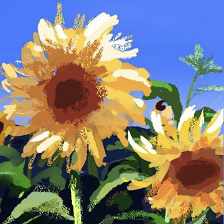

In [22]:
pic = Image.open('pic.jpg')
pic

In [23]:
pic=np.array(pic)
pic.shape

(224, 224, 3)

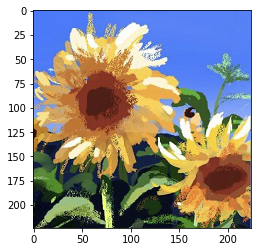

In [24]:
plt.imshow(pic)
if pic.shape[0]!=3:
    pic = pic.transpose(2,1 , 0)


In [25]:
conv1 = nn.Conv2d(3, 3, 3, bias=False)
sobel_kernel = torch.tensor([[-1, -1, -1], [-1, 8.2, -1], [-1, -1, -1]], dtype=torch.float32) # 定义轮廓检测算子
sobel_kernel = sobel_kernel.repeat((3, 3, 1, 1)) # 适配卷积的输入输出
conv1.weight.data = sobel_kernel 

In [26]:
a = torch.Tensor(pic).unsqueeze(0)
conv1(a).shape

torch.Size([1, 3, 222, 222])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(222, 222, 3)

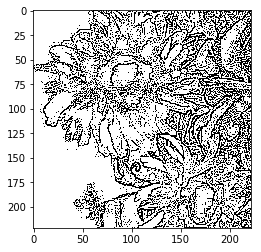

In [28]:
res = conv1(a).squeeze(0).detach().numpy().transpose(1,2,0)
plt.imshow(res)
res.shape

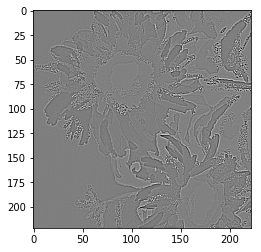

In [29]:
res[:,:,0].shape
plt.imshow(res[:,:,2],cmap='gray_r')

In [30]:
p = torch.Tensor(pic).unsqueeze(0)
p.shape

torch.Size([1, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 256, 56, 56])


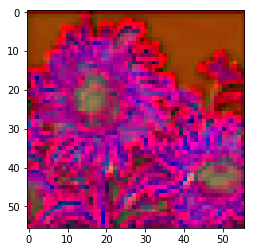

In [39]:
print(inter(p)['end'].shape)
plt.imshow(inter(p)['end'][0,194:197,:,:].transpose(2,0).detach().numpy(),cmap='gray')

In [40]:
%matplotlib 
max_len, embed_size=1000,512
pos_enc = torch.zeros(max_len,embed_size)
pos_i = torch.arange(0,max_len).unsqueeze(1)
pos_j = torch.arange(0,embed_size,2)
pos_enc[:,0::2]=torch.sin(pos_i/torch.pow(torch.tensor(1000),pos_j/embed_size))
pos_enc[:,1::2]=torch.cos(pos_i/torch.pow(torch.tensor(1000),pos_j/embed_size))

import seaborn as sns
sns.heatmap(pos_enc)

Using matplotlib backend: Qt5Agg


In [66]:
ebd = nn.Embedding(max_len,5)
ebd(torch.tensor([[2,3,4],[3,4,5]]))

tensor([[[-0.0114,  0.1643, -0.1841,  0.9152, -1.2445],
         [ 0.5824, -1.2208, -1.4685,  0.0257, -0.0488],
         [-1.4963,  0.5687, -0.1359,  1.0311,  0.4503]],

        [[ 0.5824, -1.2208, -1.4685,  0.0257, -0.0488],
         [-1.4963,  0.5687, -0.1359,  1.0311,  0.4503],
         [-0.9640, -1.1410, -0.1337,  0.8922, -0.0565]]],
       grad_fn=<EmbeddingBackward>)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.models as models
from torchvision.models._utils import IntermediateLayerGetter
import torch.nn as nn

In [51]:
class MLP_model(nn.Module):
    def __init__(self,in_dim,hidden_dim1,out_dim):
        super(MLP_model, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_dim, hidden_dim1),
                                   nn.GELU(),
                                   nn.BatchNorm1d(hidden_dim1),
                                   nn.Dropout(0.3))
        self.layer2 = nn.Sequential(nn.Linear(hidden_dim1, out_dim),
                                   nn.GELU())
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x
mlp_model = MLP_model(5,6,1)
print(mlp_model.named_parameters())
print('='*80)
print(mlp_model.named_parameters)
print('='*80)
for i in mlp_model.named_parameters():
    print(i)
print('='*80)
mark=True
for i in mlp_model.parameters():
    if mark:
        temp=i
        mark=False
    print(i)

<generator object Module.named_parameters at 0x000001998F296CA8>
<bound method Module.named_parameters of MLP_model(
  (layer1): Sequential(
    (0): Linear(in_features=5, out_features=6, bias=True)
    (1): GELU()
    (2): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
  )
  (layer2): Sequential(
    (0): Linear(in_features=6, out_features=1, bias=True)
    (1): GELU()
  )
)>
('layer1.0.weight', Parameter containing:
tensor([[-0.2872,  0.3671,  0.1932, -0.1158,  0.2248],
        [-0.3928, -0.3947,  0.2068,  0.2552, -0.2079],
        [ 0.0976,  0.0614, -0.1592,  0.1128,  0.1446],
        [-0.1040, -0.0252,  0.0658, -0.0715,  0.0261],
        [-0.4220, -0.0812,  0.1045,  0.1644,  0.0177],
        [-0.3761, -0.3353, -0.4035, -0.0589, -0.2671]], requires_grad=True))
('layer1.0.bias', Parameter containing:
tensor([-0.0541, -0.1656, -0.4223,  0.2653, -0.4298, -0.1516],
       requires_grad=True))
('layer1.2.weight', Para

In [55]:
nn.init.xavier_normal_(temp)
temp
import pycocotools